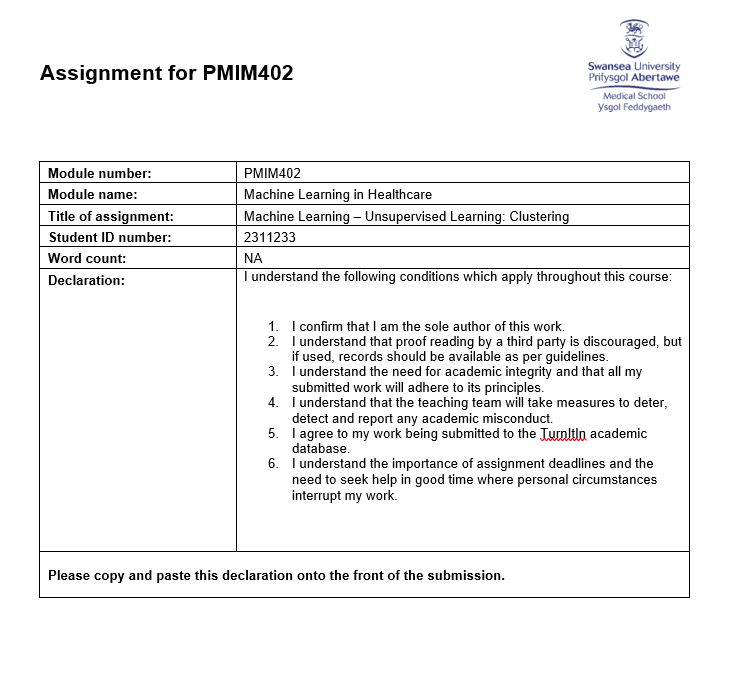

# Clustering Approach on Heart Disease Dataset

<h4>Table of Contents</h4><a class="anchor"  id="top"></a>

* [EDA](#eda)
    * [Visualization](#dp_viz)
    * [Encoding](#dp_enc)
    * [Feature Scaling](#kmeans_fs)
* [KMeans](#kmeans)
    * [Optimizing K clusters](#kmeans_k)
* [Hierarchial Clustering](#hclust)
    * [Optimizing K clusters](#hc_k)
* [Q&A](#qna)
* [Reference](#reference)

In [1]:
library(cluster)
library(tidyverse)
library(naniar)
library(mice)
library(fastDummies)
library(factoextra)
library(hopkins)
library(dendextend)
library(clValid)

Warning message:
"package 'cluster' was built under R version 4.3.2"
Warning message:
"package 'tidyverse' was built under R version 4.3.2"
Warning message:
"package 'ggplot2' was built under R version 4.3.2"
Warning message:
"package 'stringr' was built under R version 4.3.2"
── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
"package 'naniar' was built under R version 4.3.2"
Warning message:
"package 'mice' was built under R

In [2]:
options(repr.plot.width=20, repr.plot.height=10)
set.seed(45)

## EDA  <a class="anchor"  id="eda"></a>[↑](#top)

<hr />

In [3]:
dataset_path <- "data/heart-c.csv"   # declare the datasetpath
dataset <- read_csv(dataset_path)    # load the dataset

New names:
• `` -> `...1`
Rows: 303 Columns: 15
── Column specification ────────────────────────────────────────────────────────────────────────────────────────────────
Delimiter: ","
chr (7): sex, cp, restecg, exang, slope, thal, num
dbl (7): ...1, age, trestbps, chol, thalach, oldpeak, ca
lgl (1): fbs

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
head(dataset)

...1,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<lgl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
1,63,male,typ_angina,145,233,TRUE,left_vent_hyper,150,no,2.3,down,0,fixed_defect,<50
2,67,male,asympt,160,286,FALSE,left_vent_hyper,108,yes,1.5,flat,3,normal,>50_1
3,67,male,asympt,120,229,FALSE,left_vent_hyper,129,yes,2.6,flat,2,reversable_defect,>50_1
4,37,male,non_anginal,130,250,FALSE,normal,187,no,3.5,down,0,normal,<50
5,41,female,atyp_angina,130,204,FALSE,left_vent_hyper,172,no,1.4,up,0,normal,<50
6,56,male,atyp_angina,120,236,FALSE,normal,178,no,0.8,up,0,normal,<50


In [5]:
dim(dataset)

[1] 303  15

In [6]:
drop_columns <- c("...1")    #  declare the list of unwanted columns to drop
dataset_modified <- dataset %>%           #  drop columns 
    select(-one_of(drop_columns))
glimpse(dataset_modified)                 # view the glimpse of columns

Rows: 303
Columns: 14
$ age      <dbl> 63, 67, 67, 37, 41, 56, 62, 57, 63, 53, 57, 56, 56, 44, 52, 5…
$ sex      <chr> "male", "male", "male", "male", "female", "male", "female", "…
$ cp       <chr> "typ_angina", "asympt", "asympt", "non_anginal", "atyp_angina…
$ trestbps <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 1…
$ chol     <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 2…
$ fbs      <lgl> TRUE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE, FALSE,…
$ restecg  <chr> "left_vent_hyper", "left_vent_hyper", "left_vent_hyper", "nor…
$ thalach  <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 1…
$ exang    <chr> "no", "yes", "yes", "no", "no", "no", "no", "yes", "no", "yes…
$ oldpeak  <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, 0…
$ slope    <chr> "down", "flat", "flat", "down", "up", "up", "down", "up", "fl…
$ ca       <dbl> 0, 3, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0…
$ thal     <chr> "

In [7]:
# target column
target_column <- "num"

# numeric columns
numeric_columns <- c("age", "trestbps", "chol", "thalach", "oldpeak", "ca")
continuous_columns <- c("age", "trestbps", "chol", "oldpeak")

# categoric columns
categorical_columns <- c("sex", "cp", "fbs", "exang", "thal", "restecg", "slope", "thal")
to_encode_columns <- c("sex", "cp", "fbs", "restecg", "exang", "slope", "thal")

Warning message:
"The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead."


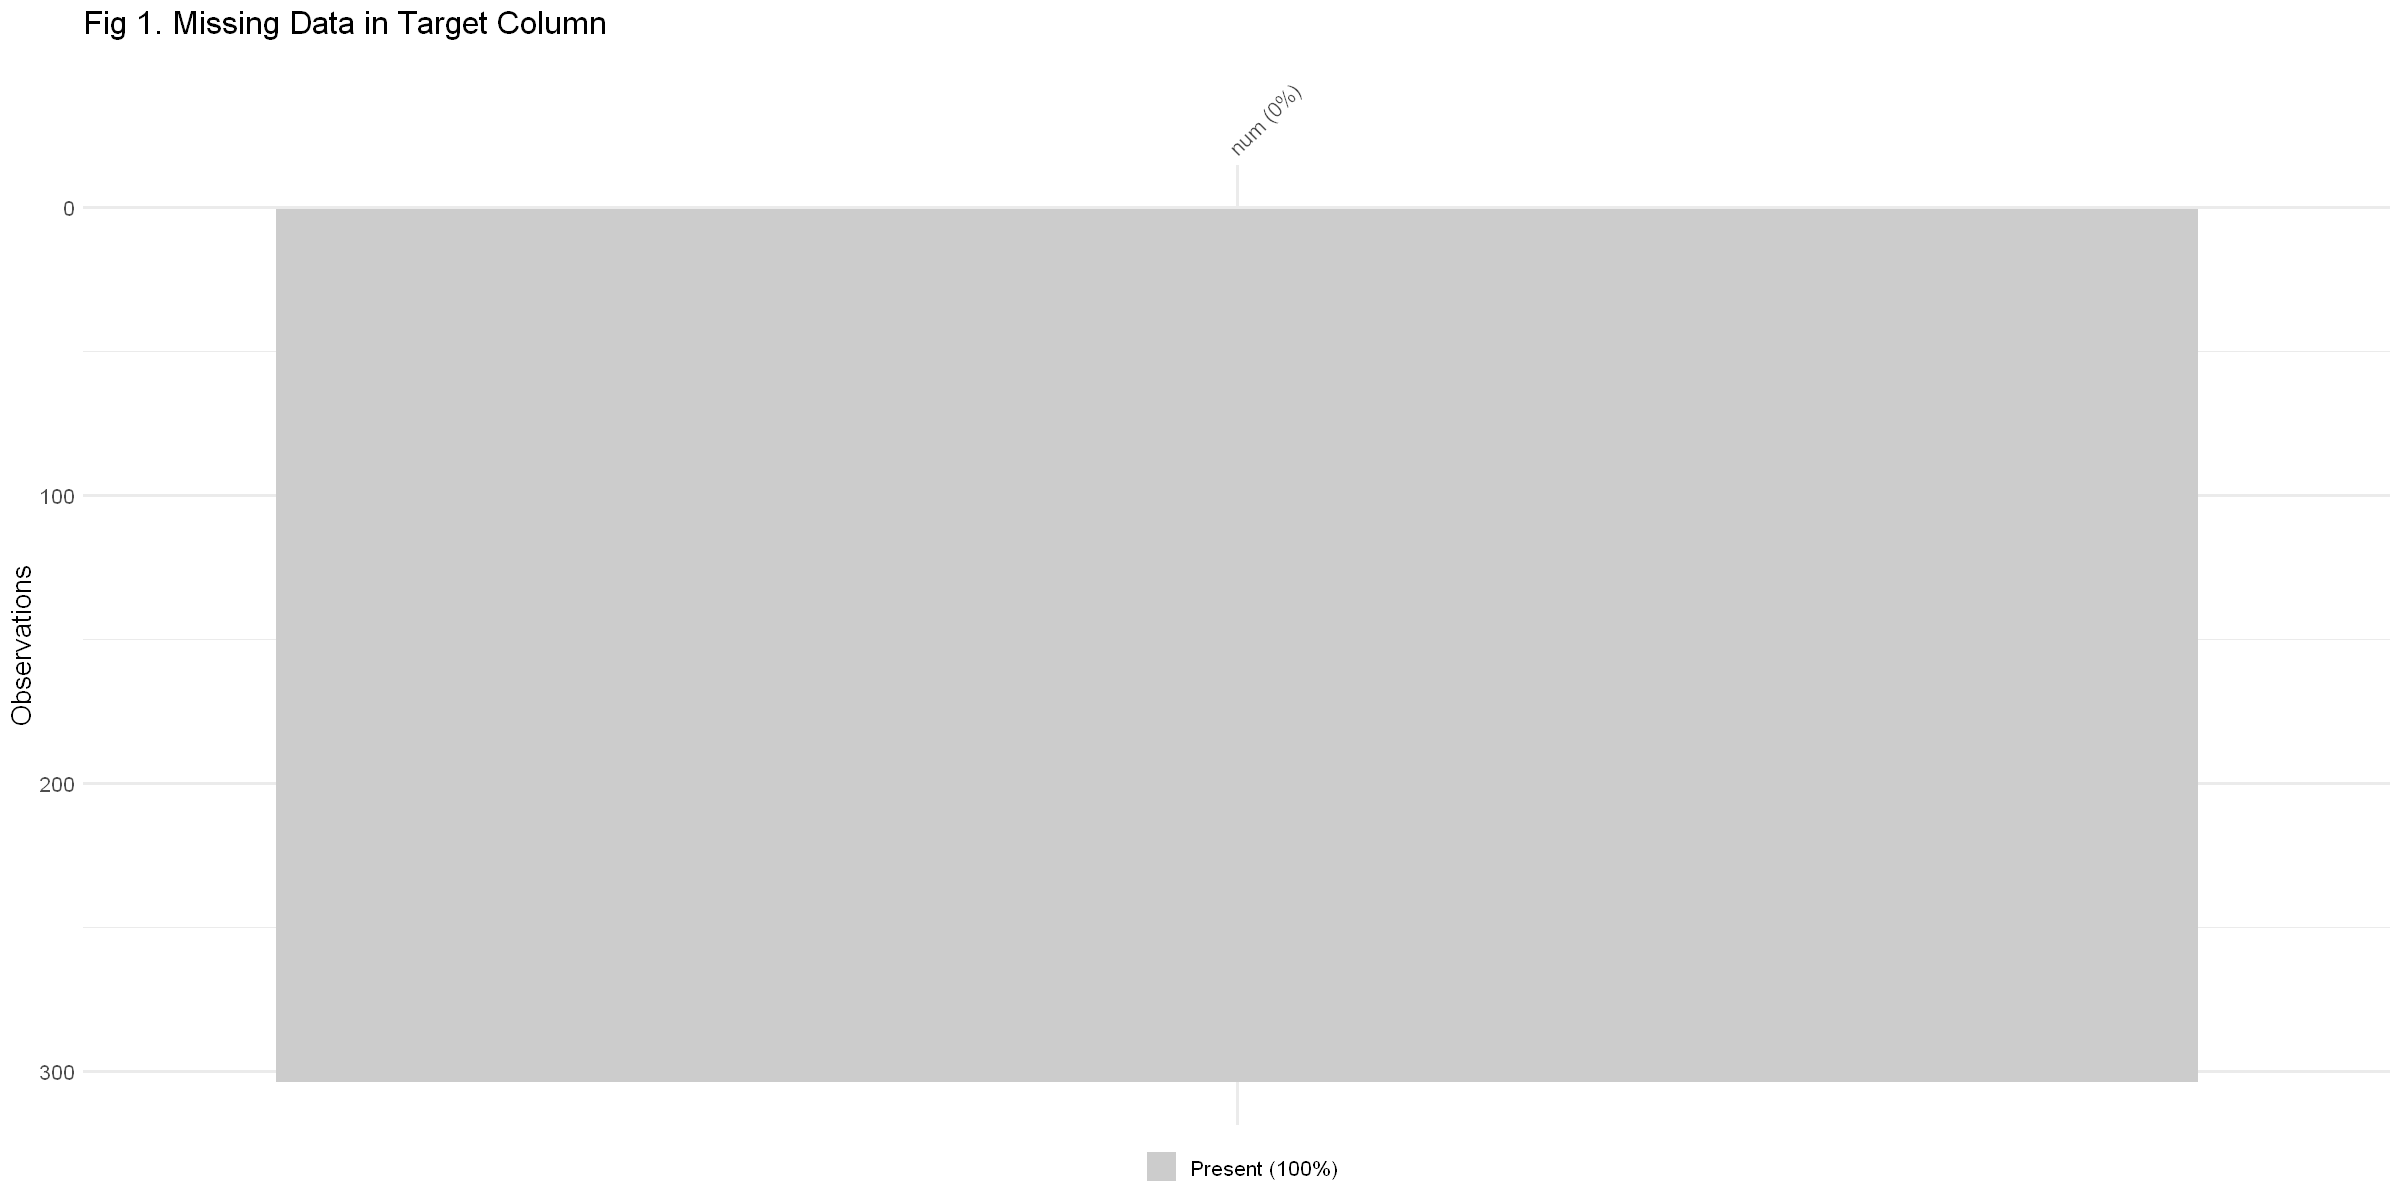

In [8]:
dataset_modified %>%                   # identify the missing values in the dataset for target column
    select(all_of(target_column)) %>%
    vis_miss() +                         # Result: no missing data found
    labs(title="Fig 1. Missing Data in Target Column") +
    theme(text = element_text(size = 16), element_line(size = 1))

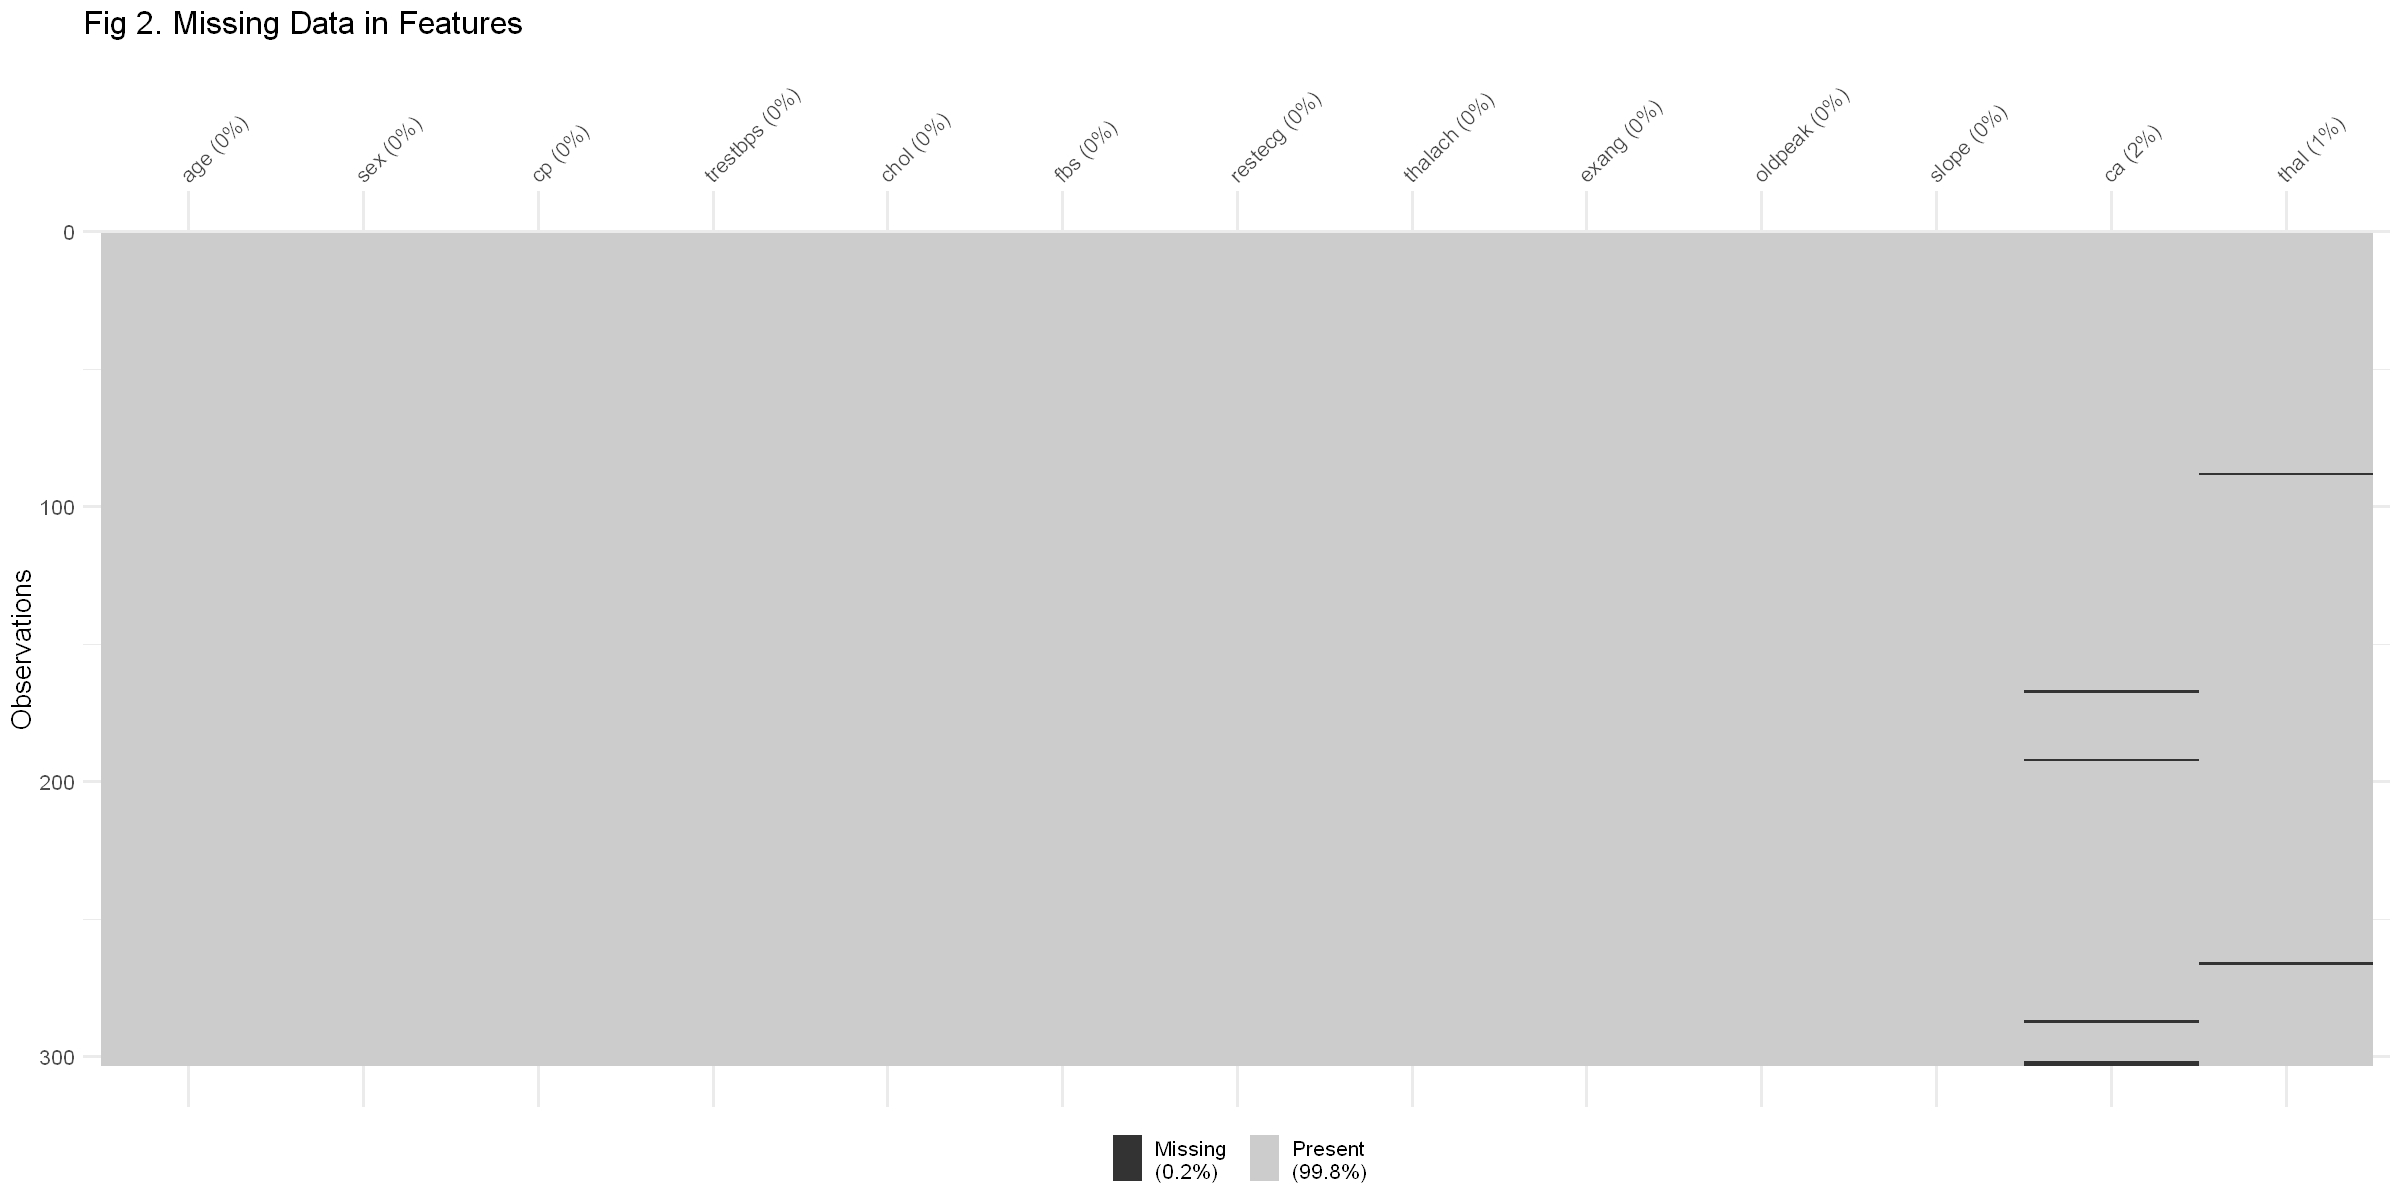

In [9]:
dataset_modified %>%                   # identify the missing values in the dataset for all columns
    select(-one_of(target_column)) %>%
    vis_miss() +                        # Result: missing data found in thal and CA, need to be imputed after encoding
    labs(title="Fig 2. Missing Data in Features") +
    theme(text = element_text(size = 16), element_line(size = 1))

> - There are missing values in the `ca` and `thal` columns. These will be treated after inspecting the data distribution, outlier treatment and encoding.

### Visualization  <a class="anchor"  id="dp_viz"></a> [↑](#top)

> - Check the data distribution of continuous columns for abnormalities.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


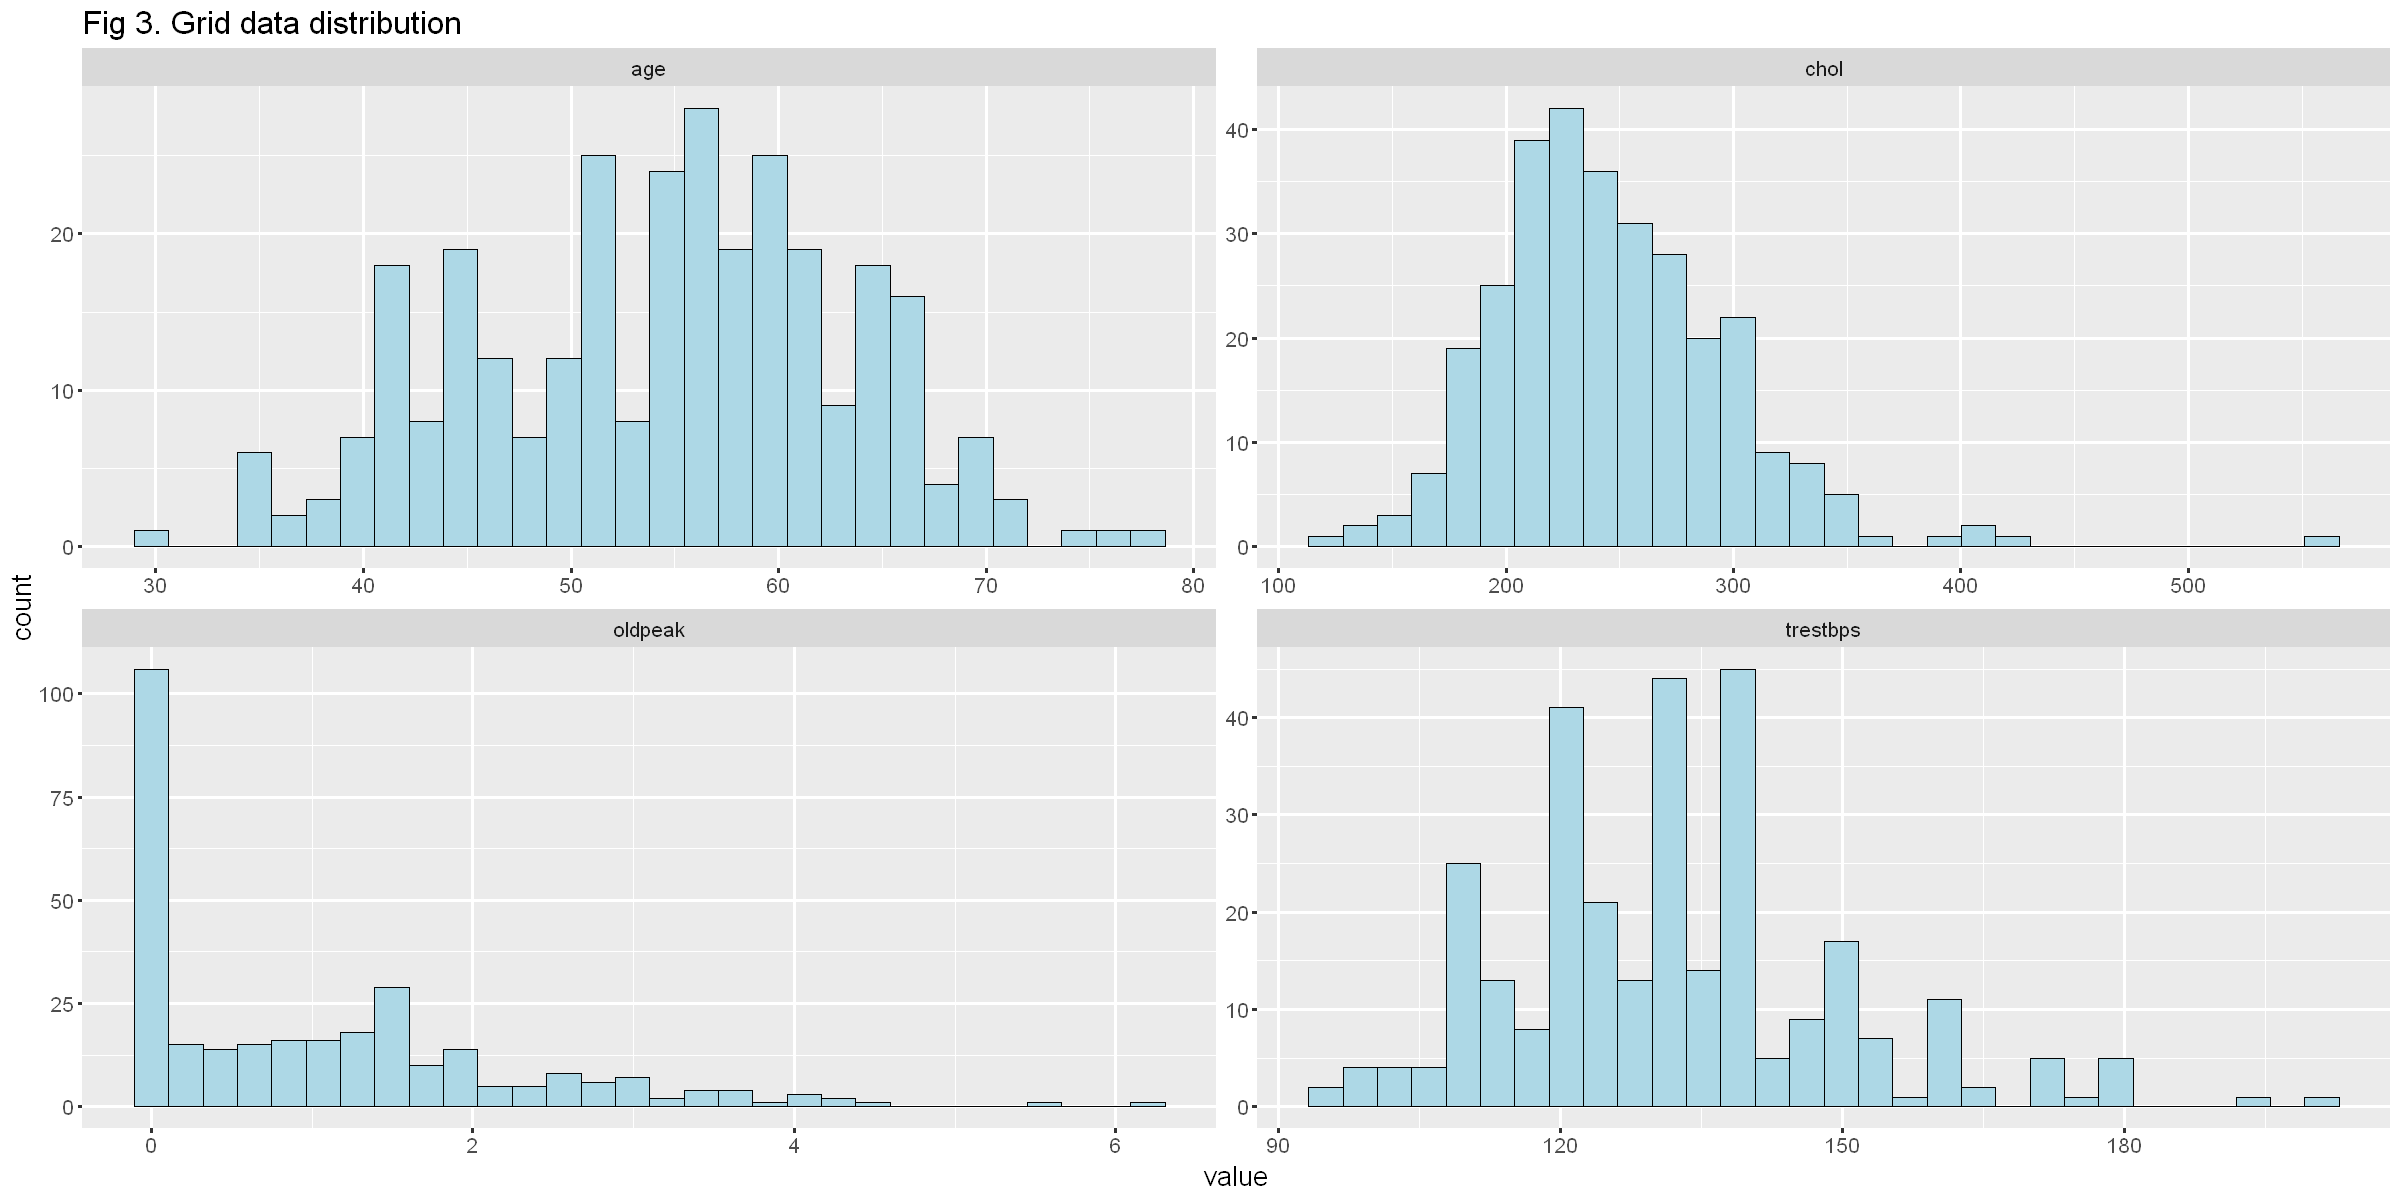

In [10]:
# data distribution for continous numeric columns
dataset_dist <- dataset_modified %>% 
    select(all_of(continuous_columns))
    
dataset_dist <- dataset_dist %>% 
    gather(attributes, value, 1:ncol(dataset_dist))

ggplot(data=dataset_dist, aes(x=value)) +
   geom_histogram(stat="bin", fill="lightblue", color="black") +
   labs(title="Fig 3. Grid data distribution") +
   facet_wrap(~attributes, scales="free") +
   theme(text = element_text(size = 16), element_line(size = 1))

> - There seems to be a outliers in the above `chol` , `oldpeak` and `trestbps` column.
> - These needs to be treated as presence of outliers would affect the clustering algorithm by `shifting the data centers` towards them.

**Handling Chol** column

> - There are values `> 500` that seems to be an outlier
> - `Winsorization` process will be used for `outlier treatment`. [(1)](#reference)

In [11]:
treat_outlier <- function(x){
    #' @description 
    #' A function to perform outlier treatment
    #' 
    #' 
    #' @param x vector to be treated
    #' 
    #' 
    #' @example 
    #'  x <- treat_outlier(x)
    #' 
    #' 
    #' @return x, outlier treated vector
    
    qnt <- quantile(x, probs=c(.25, .75), na.rm = T)    # calculate the 25th and 75th quantile
    caps <- quantile(x, probs=c(.05, .95), na.rm = T)   # calculate the 5% and 95% probability intervals
    H <- 1.5 * IQR(x, na.rm = T)                        # calculate the inter-quartile rang
    x[x < (qnt[1] - H)] <- caps[1]                      # cap the values and replace it with 5% interval value for the 25th quantile
    x[x > (qnt[2] + H)] <- caps[2]                      # cap the values and replace it with 5% interval value for the 75th quantile
    return(x)
}

In [12]:
dataset_modified <- dataset_modified %>%
    mutate(chol=treat_outlier(chol))

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


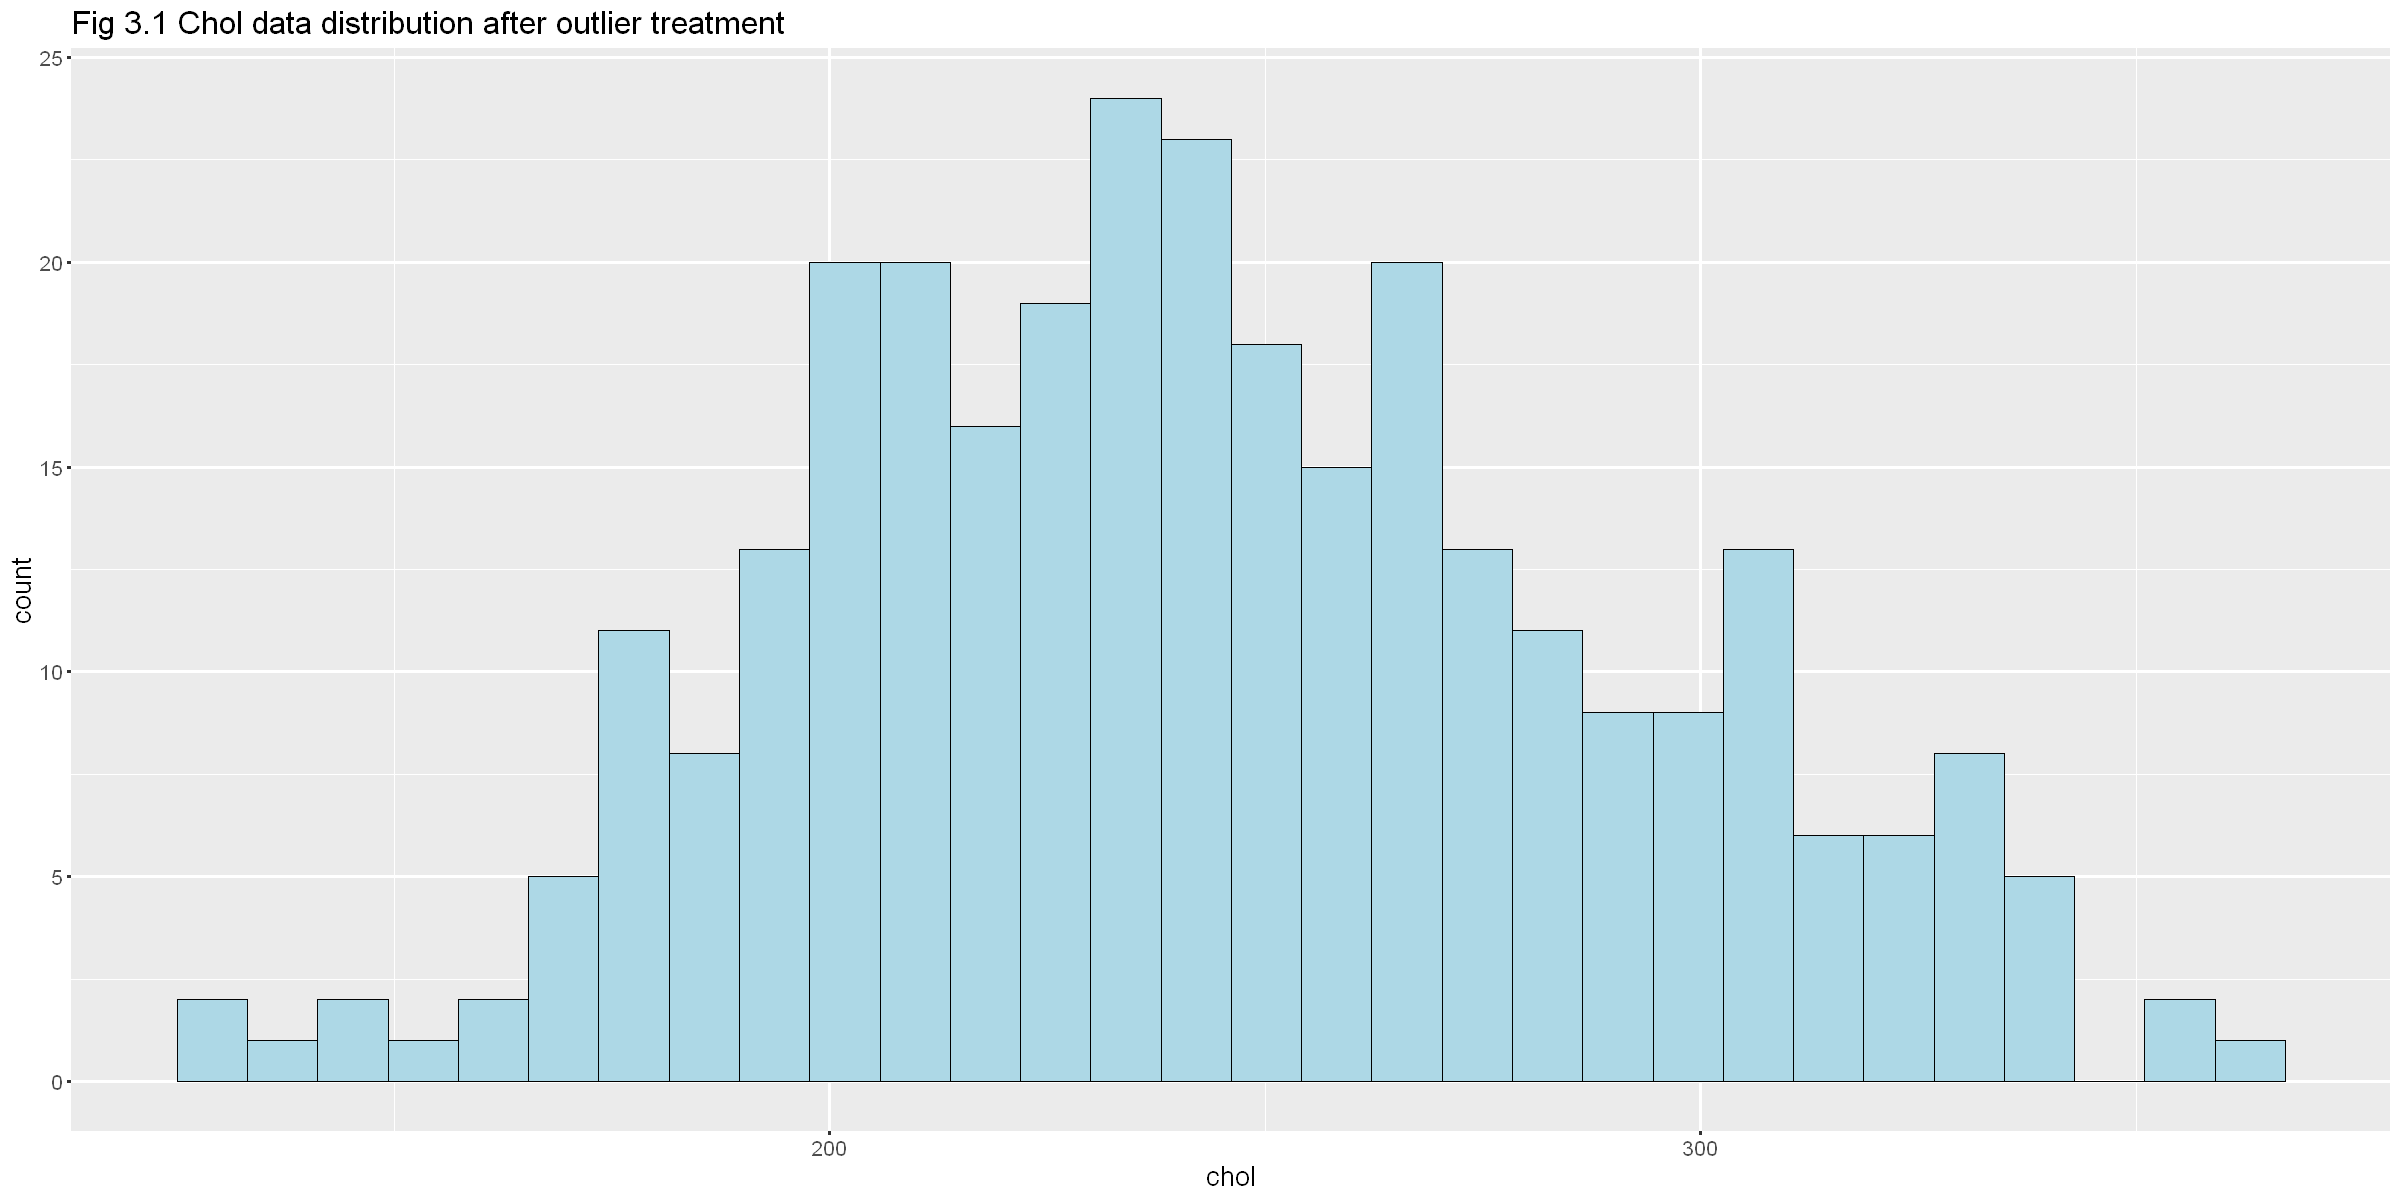

In [13]:
dataset_modified %>%
    select(chol) %>%
    ggplot(aes(x=chol)) +
       geom_histogram(stat="bin", fill="lightblue", color="black") +
       labs(title="Fig 3.1 Chol data distribution after outlier treatment") +
       theme(text = element_text(size = 16), element_line(size = 1))

**Handling Oldpeak** column

> - There are values `> 5` as per Fig 3, that looks like an outlier
> - `Winsorization` process is used for outlier treatment

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


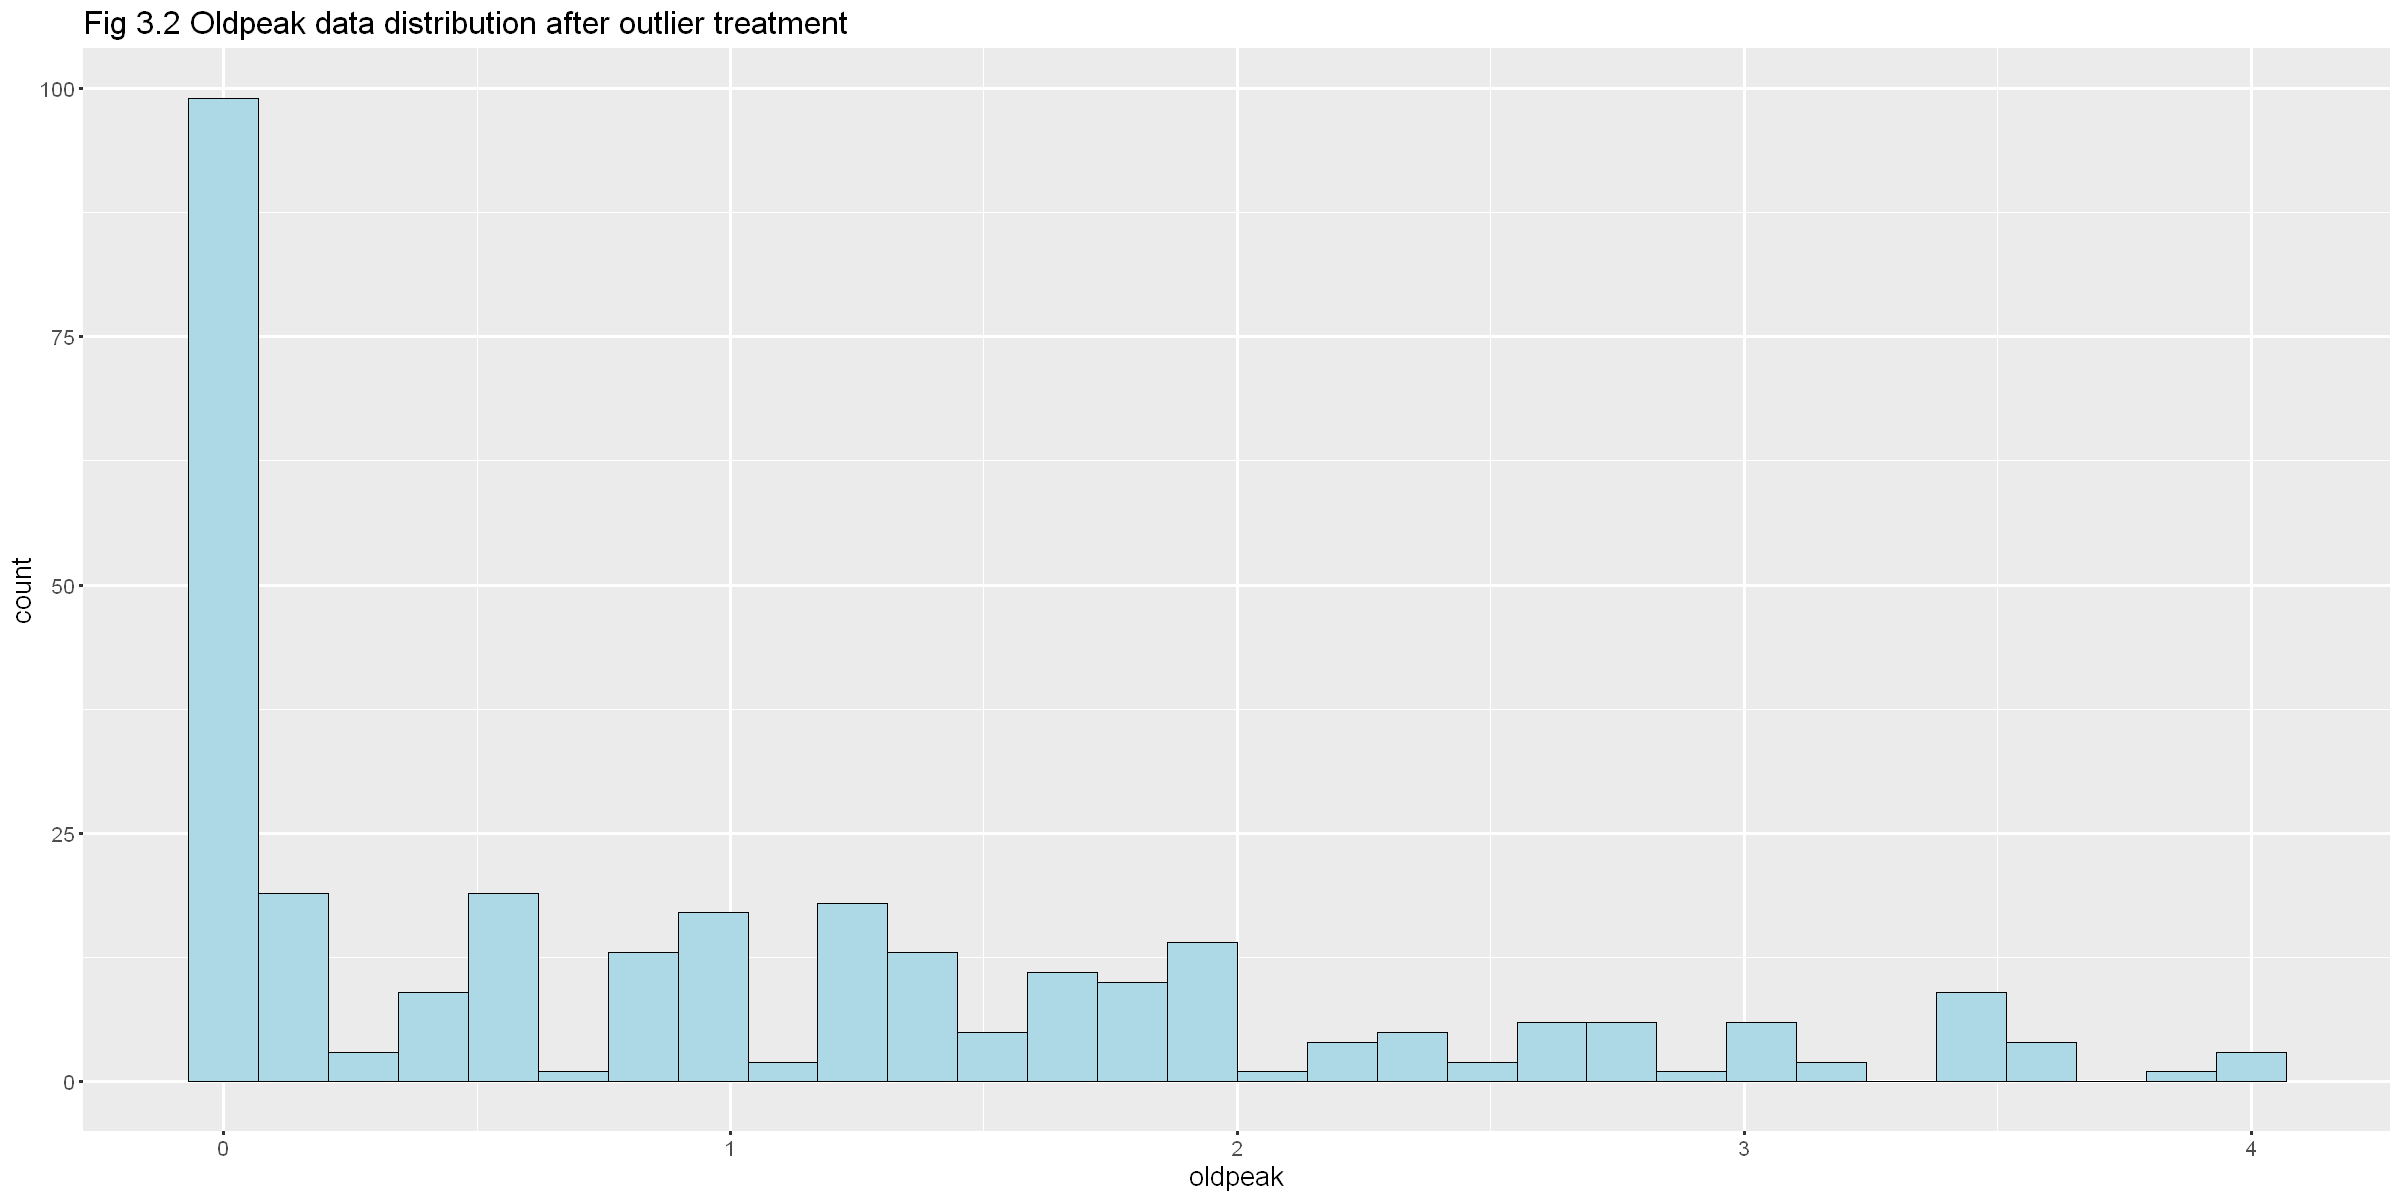

In [14]:
dataset_modified <- dataset_modified %>%
    mutate(oldpeak=treat_outlier(oldpeak))

dataset_modified %>%
    select(oldpeak) %>%
    ggplot(aes(x=oldpeak)) +
       geom_histogram(stat="bin", fill="lightblue", color="black") +
       labs(title="Fig 3.2 Oldpeak data distribution after outlier treatment") +
       theme(text = element_text(size = 16), element_line(size = 1))

**Hanlind Trestbps** column

> - There are values `> 180` as per Fig 3 that looks like outlier
> - `Winsorization` process is used for `outlier treatment`

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


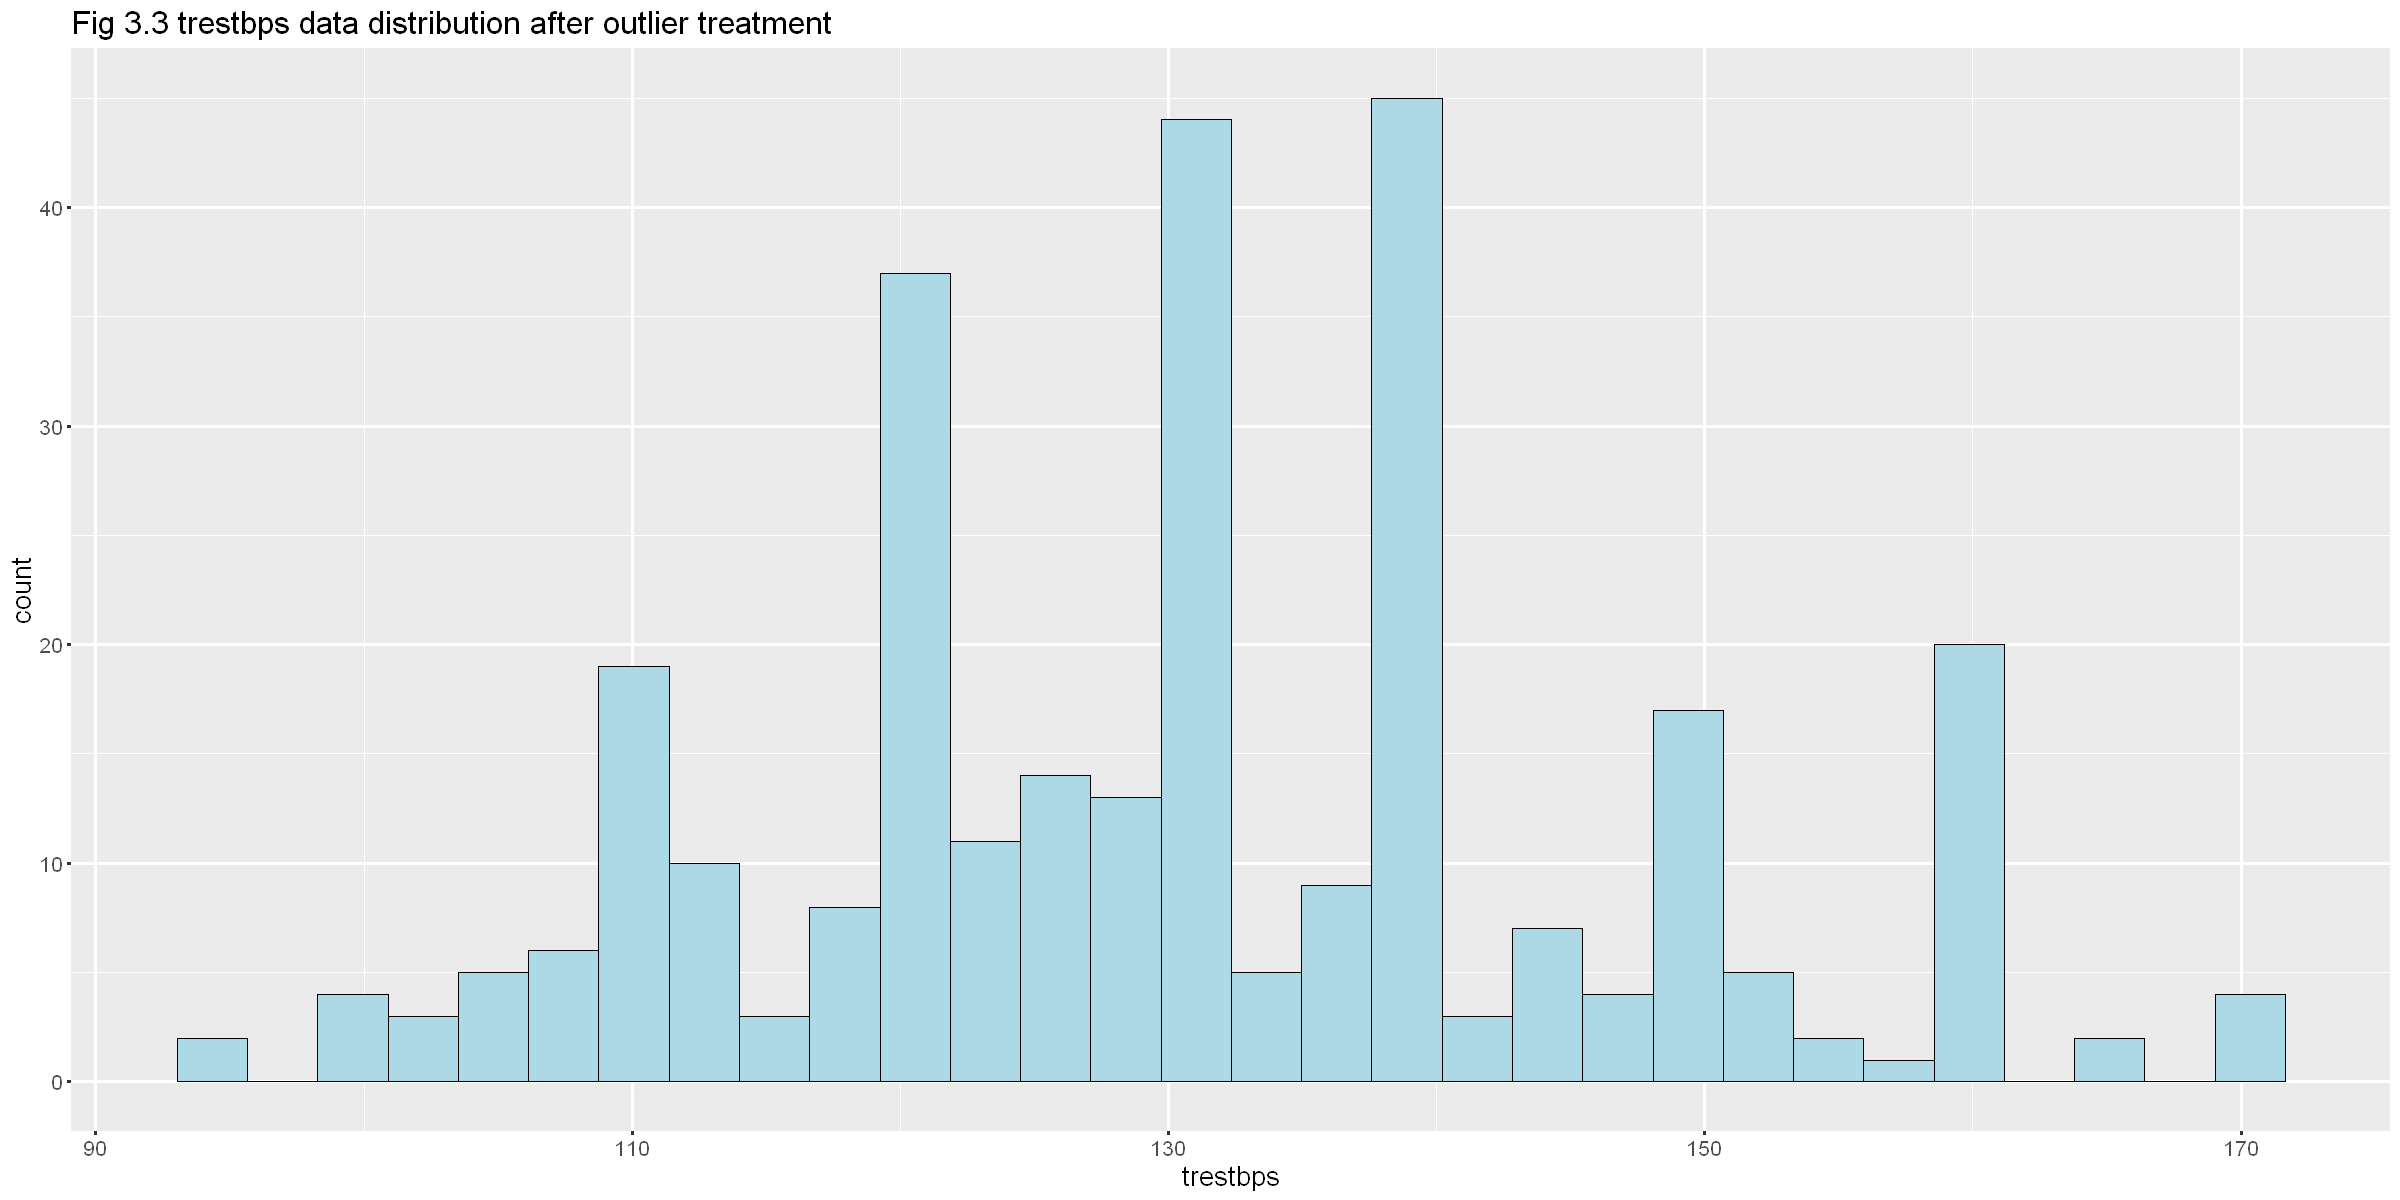

In [15]:
dataset_modified <- dataset_modified %>%
    mutate(trestbps=treat_outlier(trestbps))

dataset_modified %>%
    select(trestbps) %>%
    ggplot(aes(x=trestbps)) +
       geom_histogram(stat="bin", fill="lightblue", color="black") +
       labs(title="Fig 3.3 trestbps data distribution after outlier treatment") +
       theme(text = element_text(size = 16), element_line(size = 1))

> - Check the distribution of discrete columns for abnormalities

Warning message in geom_histogram(stat = "count", fill = "lightblue", color = "black"):
"Ignoring unknown parameters: `binwidth`, `bins`, and `pad`"


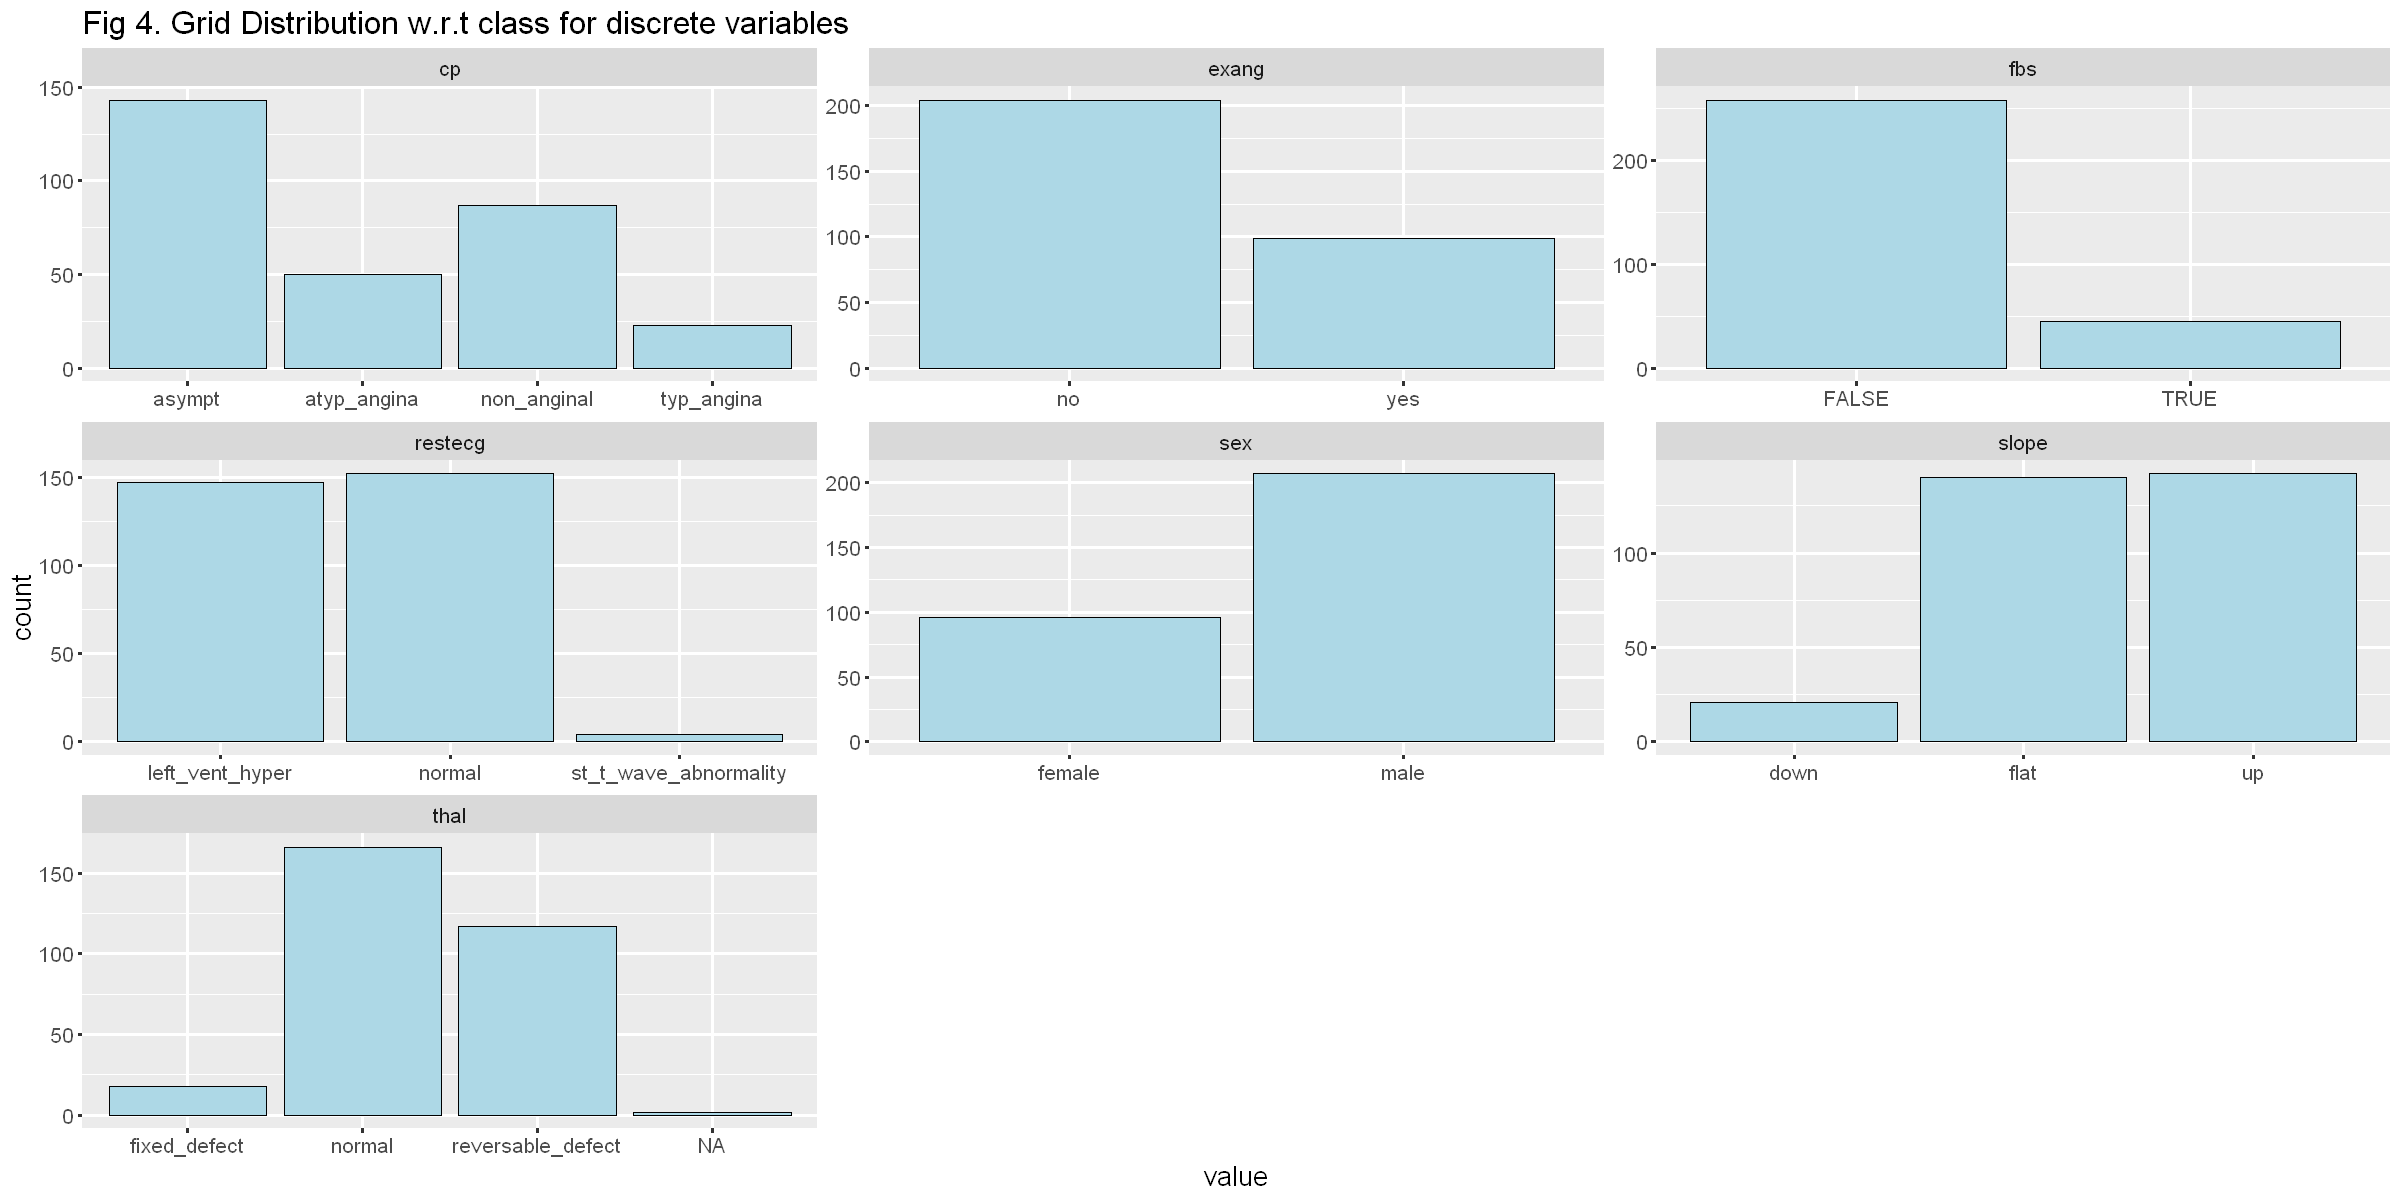

In [16]:
# data distribution for discretet numeric columns
dataset_dist <- dataset_modified %>% 
    select(all_of(categorical_columns))

dataset_dist <- dataset_dist %>%
    gather(attributes, value, 1:ncol(dataset_dist))

ggplot(data=dataset_dist, aes(x=value)) +
    geom_histogram(stat="count", fill="lightblue", color="black") +
    labs(title="Fig 4. Grid Distribution w.r.t class for discrete variables") +
    facet_wrap(~attributes, scales="free") +
    theme(text = element_text(size = 16), element_line(size = 1))

> - No specific abnormality observed

### Encoding  <a class="anchor"  id="dp_enc"></a>[↑](#top)

**Handling Age** column

> - Age column is continuous and to make more logical perspective like, `the age-group of people associated with heart disease` the column could be binned

In [17]:
bin_age_feature <- function(data){
    #' @description 
    #' A function to bin the age into groups
    #' 
    #' @param data, data to work on
    #'
    #' @example 
    #'  data <- bin_age_feature(data)
    #' 
    #' 
    #' @return split_data, named list containing the train and test dataset
    # binning age to groups
    data <- data %>% 
        mutate(agegroup = case_when(age < 18 ~ '<18',
                                    age >= 18 & age < 25 ~ '18-25',
                                    age >= 25  & age < 35 ~ '25-35',
                                    age >= 35  & age < 45 ~ '35-45',
                                    age >= 45  & age < 55 ~ '45-55',
                                    age >= 55  & age < 65 ~ '55-65',
                                    age >= 65  & age < 75 ~ '65-75',
                                    age >= 75 ~ '>75',
                                   ))
    data <- data %>%
        select(-age)
    return(data)
}

In [18]:
dataset_modified <- bin_age_feature(dataset_modified)

**Handling Categorical** columns

> - Clustering majorly uses distance between points along with the data centers to determine if a sample belongs to a cluster or not. The distance between the points are minimized.
> - Categorical variables cannot be used as is for calculating the distance metric.
> - Thus, they are encoded to numeric representations and the representations are converted to one hot encoded dummy variables.

[(2-3)](#reference)

In [19]:
dataset_modified <- dataset_modified %>%
    mutate(sex=recode(sex, "male"=1, "female"=0)) %>%
    mutate(cp=recode(cp, "typ_angina"=1, "asympt"=2, "non_anginal"=3, "atyp_angina"=4)) %>%
    mutate(fbs=ifelse(fbs == TRUE, 1, 0)) %>%
    mutate(restecg=recode(restecg, "left_vent_hyper"=1, "normal"=2, "st_t_wave_abnormality"=3)) %>%
    mutate(exang=recode(exang, "no"=0, "yes"=1)) %>%
    mutate(slope=recode(slope, "down"=1, "flat"=2, "up"=3)) %>%
    mutate(thal=recode(thal, "fixed_defect"=1, "normal"=2, "reversable_defect"=3)) %>%
    mutate(agegroup=recode(agegroup, "<18" = 1, "18-25" = 2, "25-35" = 3, "35-45" = 4, "45-55" = 5, "55-65"=6, "65-75"=7, ">75"=8))

# fill the NA using imputation
head(dataset_modified)

sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,agegroup
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1,145,233,1,1,150,0,2.3,1,0,1,<50,6
1,2,160,286,0,1,108,1,1.5,2,3,2,>50_1,7
1,2,120,229,0,1,129,1,2.6,2,2,3,>50_1,7
1,3,130,250,0,2,187,0,3.5,1,0,2,<50,4
0,4,130,204,0,1,172,0,1.4,3,0,2,<50,4
1,4,120,236,0,2,178,0,0.8,3,0,2,<50,6


In [20]:
glimpse(dataset_modified)

Rows: 303
Columns: 14
$ sex      <dbl> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1…
$ cp       <dbl> 1, 2, 2, 3, 4, 4, 2, 2, 2, 2, 2, 4, 3, 4, 3, 3, 4, 2, 3, 4, 1…
$ trestbps <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 1…
$ chol     <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 2…
$ fbs      <dbl> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0…
$ restecg  <dbl> 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1…
$ thalach  <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 1…
$ exang    <dbl> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1…
$ oldpeak  <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, 0…
$ slope    <dbl> 1, 2, 2, 1, 3, 3, 1, 3, 2, 1, 2, 2, 2, 3, 3, 3, 1, 3, 3, 3, 2…
$ ca       <dbl> 0, 3, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0…
$ thal     <dbl> 1, 2, 3, 2, 2, 2, 2, 2, 3, 3, 1, 2, 1, 3, 3, 2, 3, 2, 2, 2, 2…
$ num      <chr> "

> - All categorical columns need to be converted to factors

In [21]:
for(col in categorical_columns){
    dataset_modified[[col]] <- as.factor(dataset_modified[[col]])
}

glimpse(dataset_modified)                                                          

Rows: 303
Columns: 14
$ sex      <fct> 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1…
$ cp       <fct> 1, 2, 2, 3, 4, 4, 2, 2, 2, 2, 2, 4, 3, 4, 3, 3, 4, 2, 3, 4, 1…
$ trestbps <dbl> 145, 160, 120, 130, 130, 120, 140, 120, 130, 140, 140, 140, 1…
$ chol     <dbl> 233, 286, 229, 250, 204, 236, 268, 354, 254, 203, 192, 294, 2…
$ fbs      <fct> 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0…
$ restecg  <fct> 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1…
$ thalach  <dbl> 150, 108, 129, 187, 172, 178, 160, 163, 147, 155, 148, 153, 1…
$ exang    <fct> 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1…
$ oldpeak  <dbl> 2.3, 1.5, 2.6, 3.5, 1.4, 0.8, 3.6, 0.6, 1.4, 3.1, 0.4, 1.3, 0…
$ slope    <fct> 1, 2, 2, 1, 3, 3, 1, 3, 2, 1, 2, 2, 2, 3, 3, 3, 1, 3, 3, 3, 2…
$ ca       <dbl> 0, 3, 2, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0…
$ thal     <fct> 1, 2, 3, 2, 2, 2, 2, 2, 3, 3, 1, 2, 1, 3, 3, 2, 3, 2, 2, 2, 2…
$ num      <chr> "

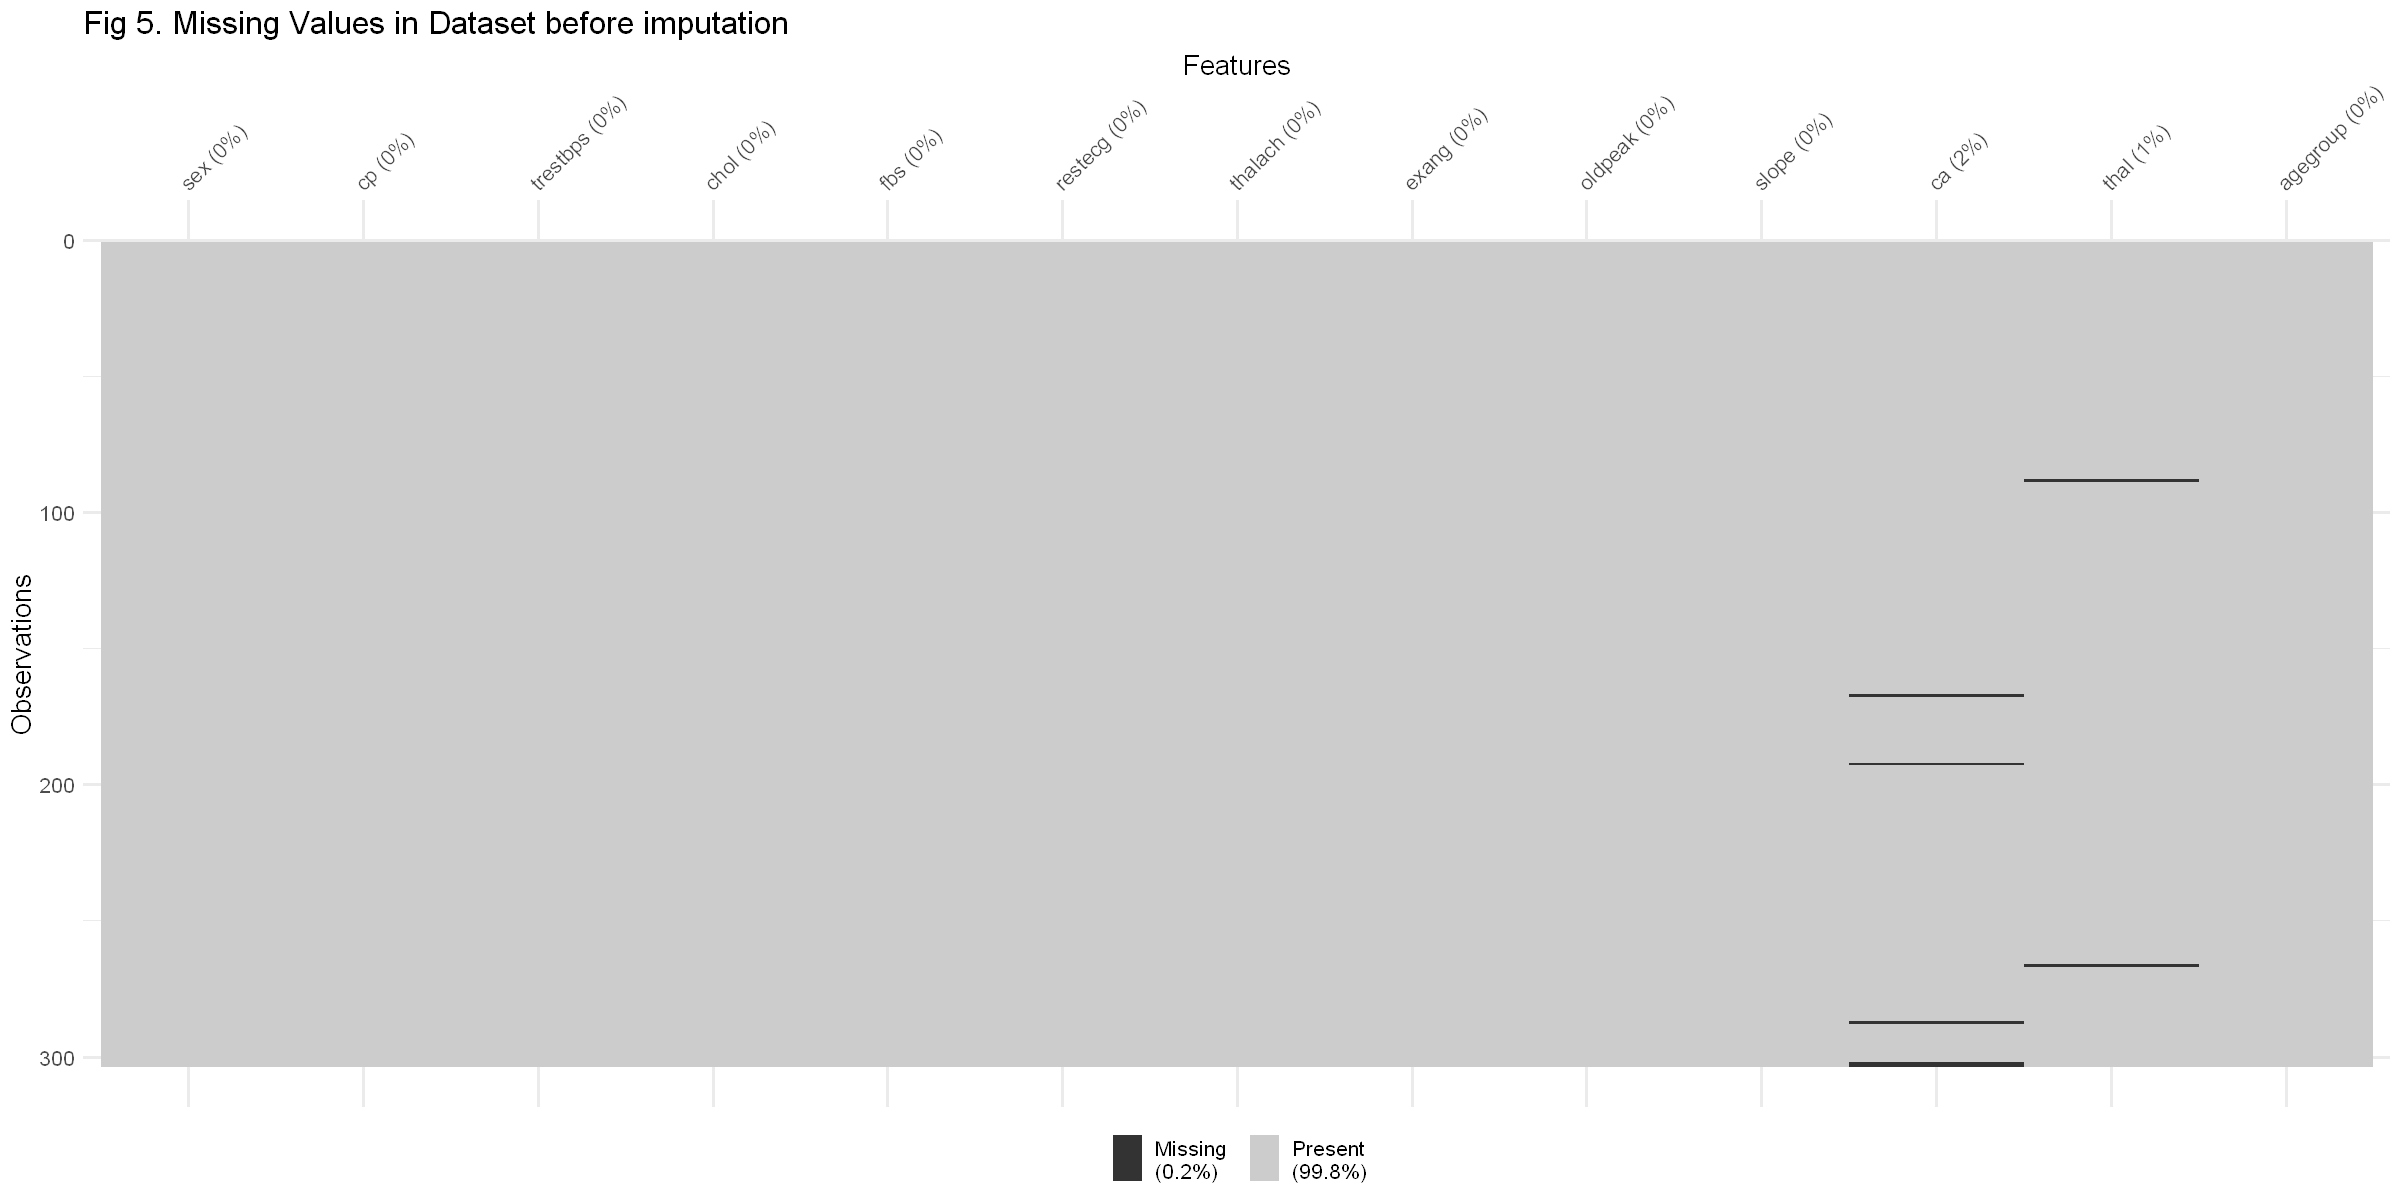

In [22]:
dataset_modified %>%                   # identify the missing values in the dataset for all columns
    select(-one_of(target_column)) %>%
    vis_miss()  +                      # Result: missing data found in thal and CA, need to be imputed after encoding
    labs(y="Observations", x="Features", title="Fig 5. Missing Values in Dataset before imputation") + 
    theme(text = element_text(size = 16), element_line(size = 1))

> - Imputation is performed on the `ca` and `thal` column.
> - Default method is used for imputation. Since `ca` and `thal` columns are categorical in nature, the `logreg` and `polyreg` default methods from the mice package will be used for imputation

In [23]:
dataset_imputed <- mice(dataset_modified)
dataset_imputed <- complete(dataset_imputed)


 iter imp variable
  1   1  ca  thal
  1   2  ca  thal
  1   3  ca  thal
  1   4  ca  thal
  1   5  ca  thal
  2   1  ca  thal
  2   2  ca  thal
  2   3  ca  thal
  2   4  ca  thal
  2   5  ca  thal
  3   1  ca  thal
  3   2  ca  thal
  3   3  ca  thal
  3   4  ca  thal
  3   5  ca  thal
  4   1  ca  thal
  4   2  ca  thal
  4   3  ca  thal
  4   4  ca  thal
  4   5  ca  thal
  5   1  ca  thal
  5   2  ca  thal
  5   3  ca  thal
  5   4  ca  thal
  5   5  ca  thal


Warning message:
"Number of logged events: 1"


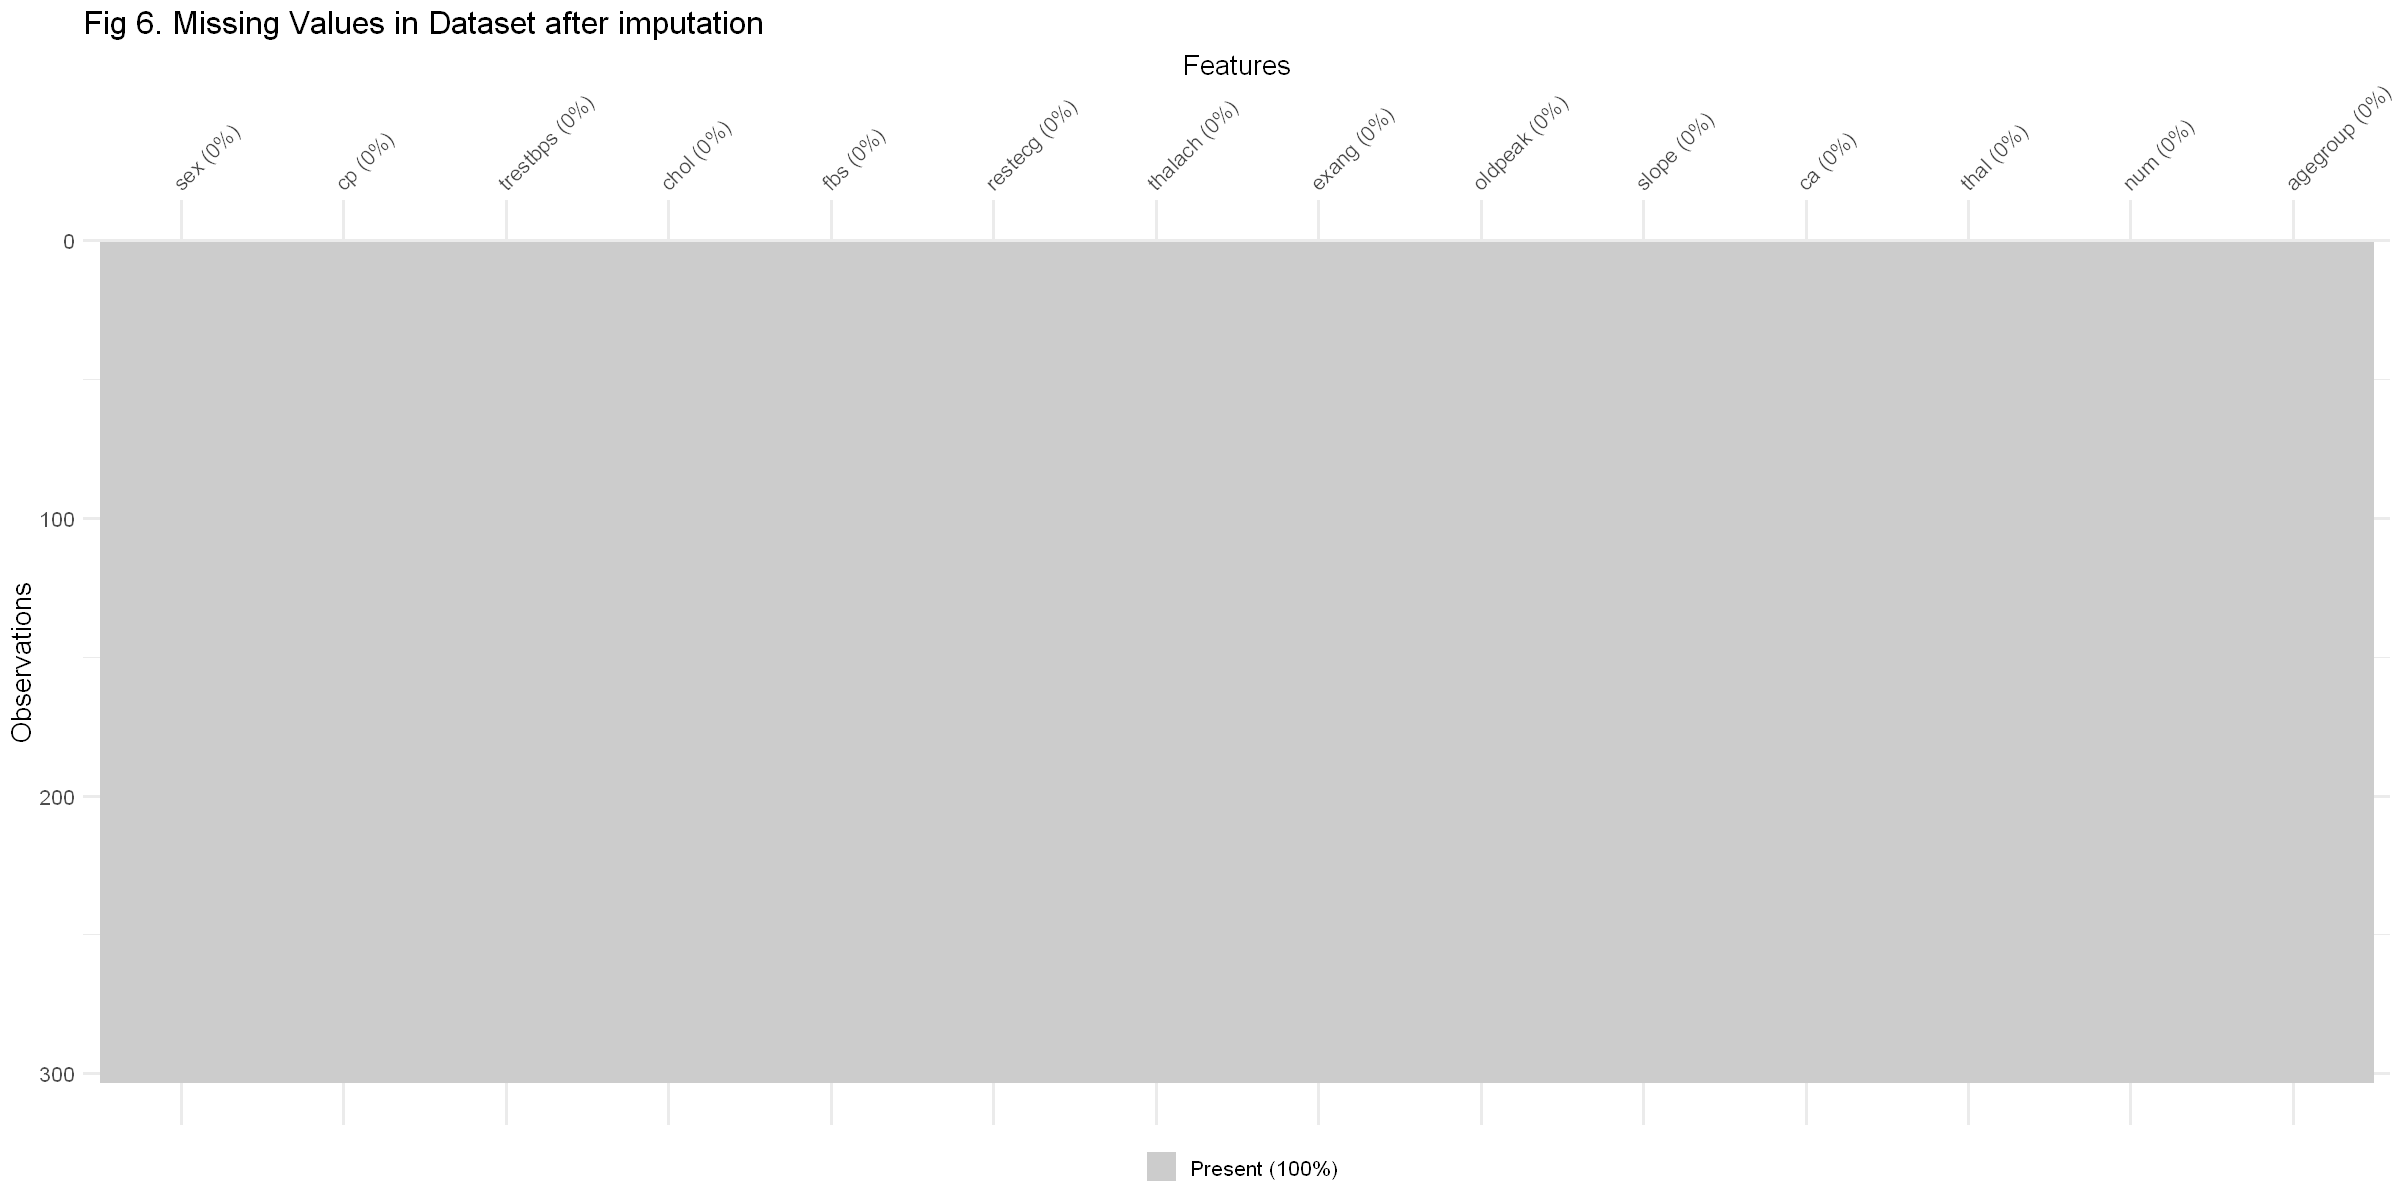

In [24]:
dataset_imputed %>%
    vis_miss() +
    labs(y="Observations", x="Features", title="Fig 6. Missing Values in Dataset after imputation") + 
    theme(text = element_text(size = 16), element_line(size = 1))

> - Dummy encoding for converting categorical features. The distance algorithm cannot consider factor values / levels in the kmeans.
> - However, this makes the algorithm susceptible to dominance by the encoded values, to resolve  that `feature scaling` will be conducted.

In [25]:
columns_to_select <- c(categorical_columns, "agegroup")
columns_to_select

[1] "sex"      "cp"       "fbs"      "exang"    "thal"     "restecg"  "slope"   
[8] "thal"     "agegroup"

In [26]:
dummy_encoded_data <- fastDummies::dummy_cols(
    dataset_imputed, select_columns=columns_to_select, remove_first_dummy=TRUE, remove_selected_columns=TRUE)

head(dummy_encoded_data)

,trestbps,chol,thalach,oldpeak,ca,num,sex_1,cp_2,cp_3,cp_4,⋯,thal_3,restecg_2,restecg_3,slope_2,slope_3,agegroup_4,agegroup_5,agegroup_6,agegroup_7,agegroup_8
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,145,233,150,2.3,0,<50,1,0,0,0,⋯,0,0,0,0,0,0,0,1,0,0
2,160,286,108,1.5,3,>50_1,1,1,0,0,⋯,0,0,0,1,0,0,0,0,1,0
3,120,229,129,2.6,2,>50_1,1,1,0,0,⋯,1,0,0,1,0,0,0,0,1,0
4,130,250,187,3.5,0,<50,1,0,1,0,⋯,0,1,0,0,0,1,0,0,0,0
5,130,204,172,1.4,0,<50,0,0,0,1,⋯,0,0,0,0,1,1,0,0,0,0
6,120,236,178,0.8,0,<50,1,0,0,1,⋯,0,1,0,0,1,0,0,1,0,0


In [27]:
cluster_data <- dummy_encoded_data %>%
    select(-one_of('num'))

In [28]:
dim(cluster_data)

[1] 303  22

### Feature Scaling  <a class="anchor"  id="kmeans_fs"></a>[↑](#top)

> - `Clustering` require the features to be scaled so that their impact is not due to being on different scales.
> - `Gower's distance` is used to feature scale as the dataset contains mixed data types. the distance is calculated as the mean of the column over the difference of the columns.

[(2-3)](#reference)

In [29]:
feature_scaled <- daisy(cluster_data, metric="gower")

Warning message in daisy(cluster_data, metric = "gower"):
"binary variable(s) 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22 treated as interval scaled"


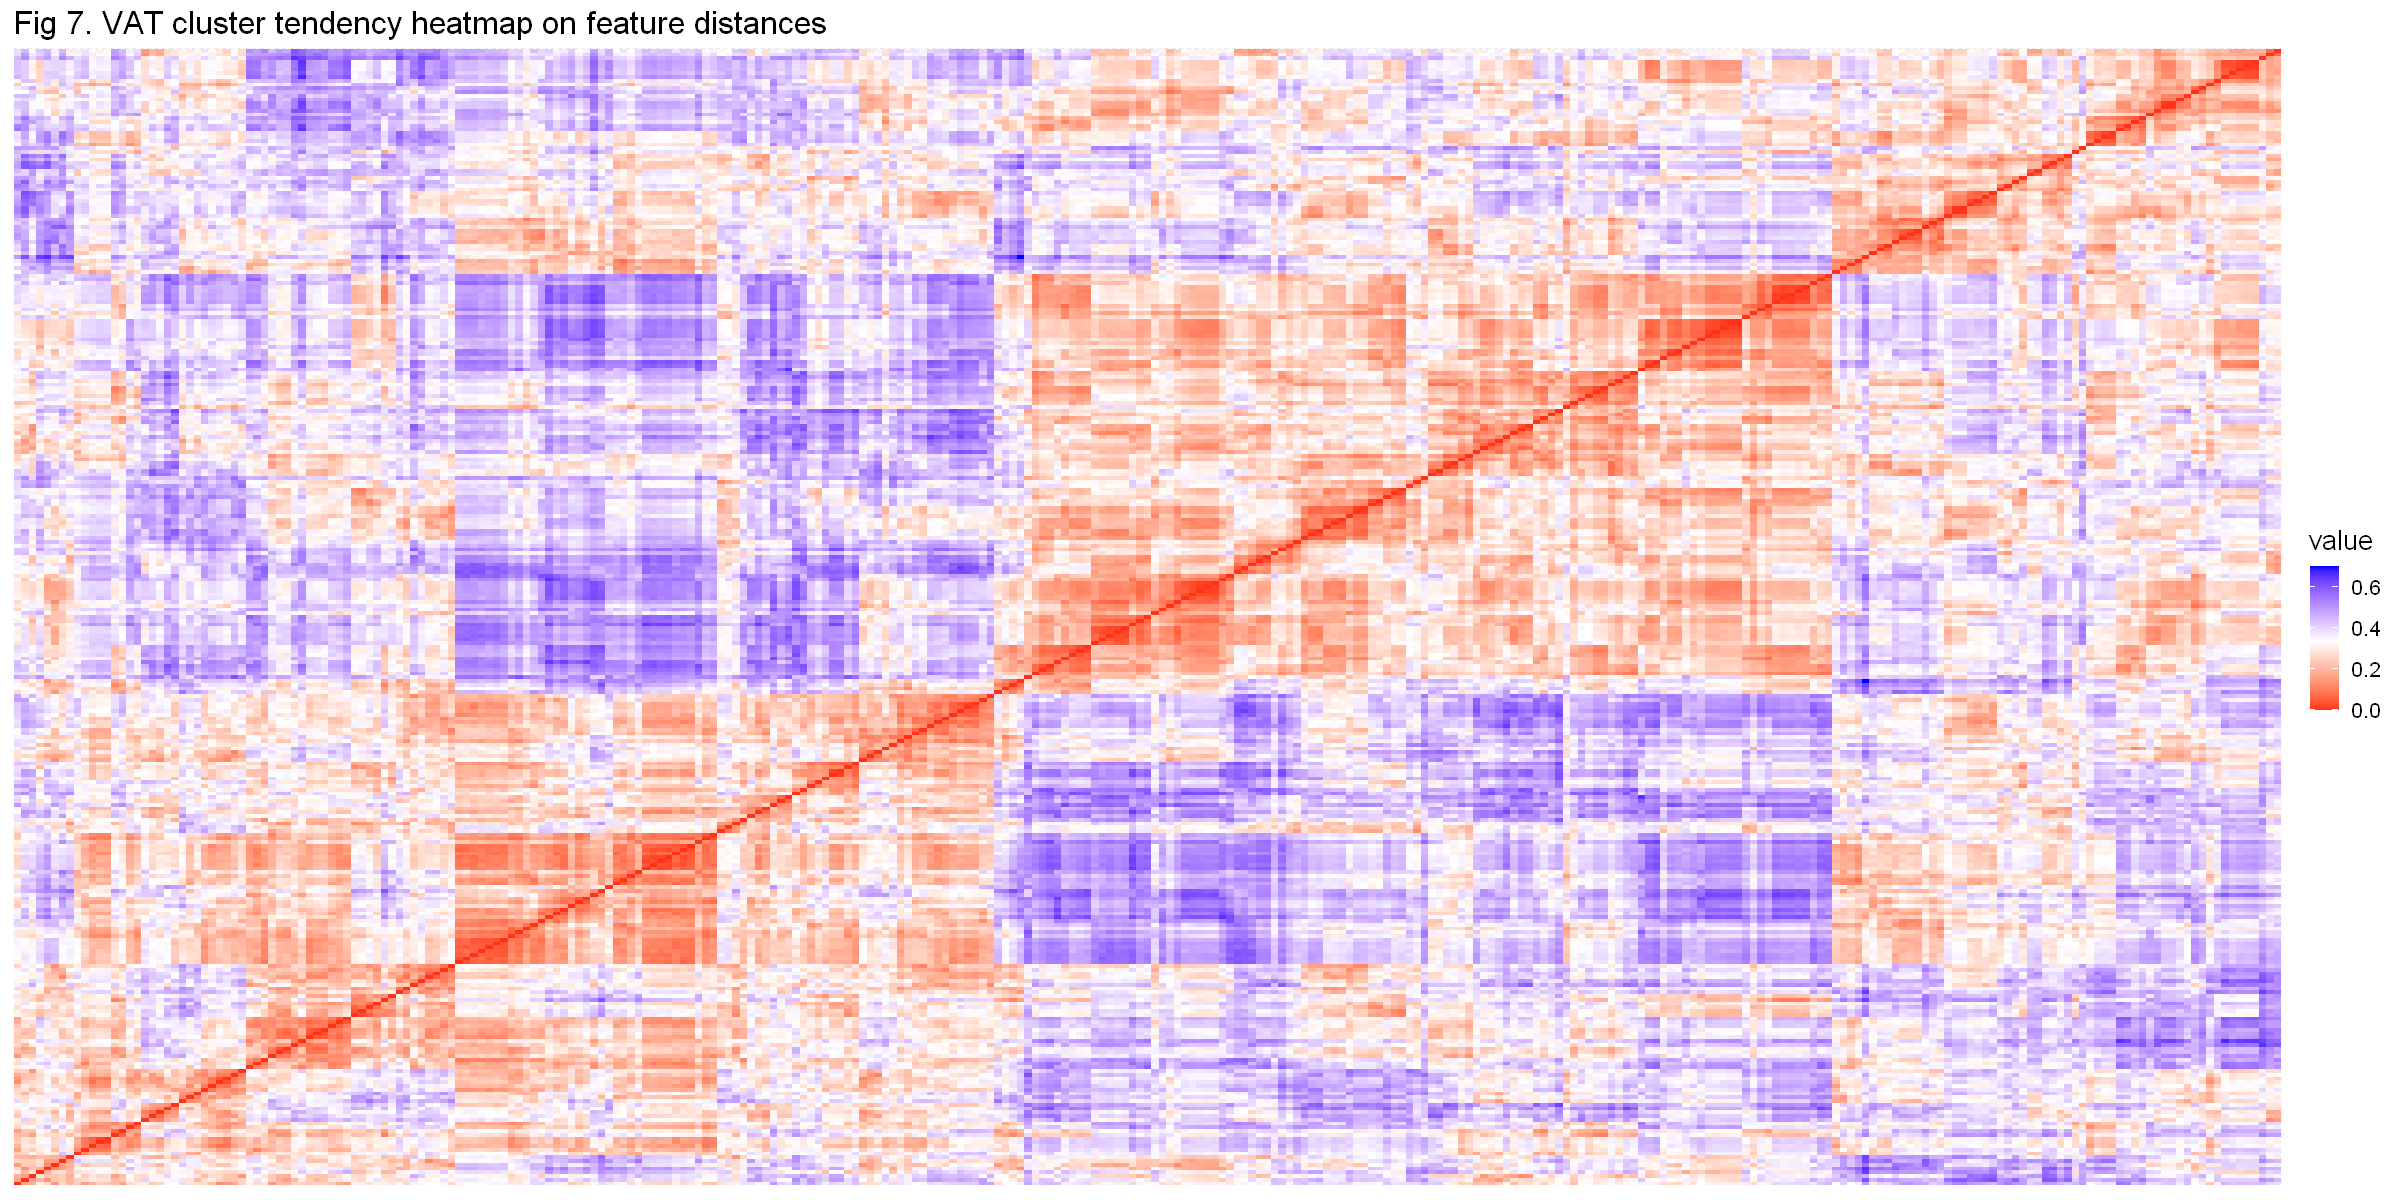

In [30]:
fviz_dist(feature_scaled, show_labels=FALSE) +
    labs(x="Observations", y="features", title="Fig 7. VAT cluster tendency heatmap on feature distances") + 
    theme(text = element_text(size = 16), element_line(size = 1))

> - `Fig 7` indicate that the dataset is `not highly clusterable`, as the cluster regions blue / red are dissipiated and scarcely form clusters.
> - The colored `blue`  regions indicate `low similarity` (high dissimilarity) in the clusters and `red` box densities indicate `high similarity` (low dissimilarity) of the samples.
> - `Dissimilarity` is the measured used to merge the clusters in the `Hierarchial Clustering` implementing the `Agglomerative Clustering`.


[(7)](#reference)

## KMEANS <a class="anchor"  id="kmeans"></a>[↑](#top)

<hr />

> - Kmeans is a `partition` type of clustering, where each cluster is formed with respect to the means of the data acting as the data centers / cluster means / cluster centroids. The K value i.e the number of clusters to be formed is provided by the user. Thus the name K-means.
> - Kmeans forms cluster such that the `total intra-cluster variation is minimized`.
> - Kmeans is an heuristic algorithm that relies on distance between the points to form clusters. Thus it is a good practice to have `nstart = 100` to ensure that algorithm is initialized at 100 random start point. This gives a better chance to form good clusters.
> - `centers = 2` is selected as the dataset intends to segregate the samples into two known groups `With Heart Disease` and `Without Heart Disease`. Further optimization of K will be conducted.
> - `Kmeans is sensitive to the outliers`.

[(4-5)](#reference)

In [31]:
km_cluster <- kmeans(feature_scaled, centers=2, nstart=100)

In [32]:
km_cluster$size

[1] 157 146

In [33]:
dummy_encoded_data <- dummy_encoded_data %>%
    mutate(num=ifelse(num == ">50_1", 1, 0))
total_1 <- sum(dummy_encoded_data$num)
total_0 <- dim(dummy_encoded_data)[1] - total_1

sprintf("%s %s", total_1, total_0)

[1] "138 165"

> - `Cluster size` shows that the cluster formed are closely balanced and only few points that are incorrectly clustered.
> - The distribution is not too off from the actual distribution of the samples

[1] 641.8771

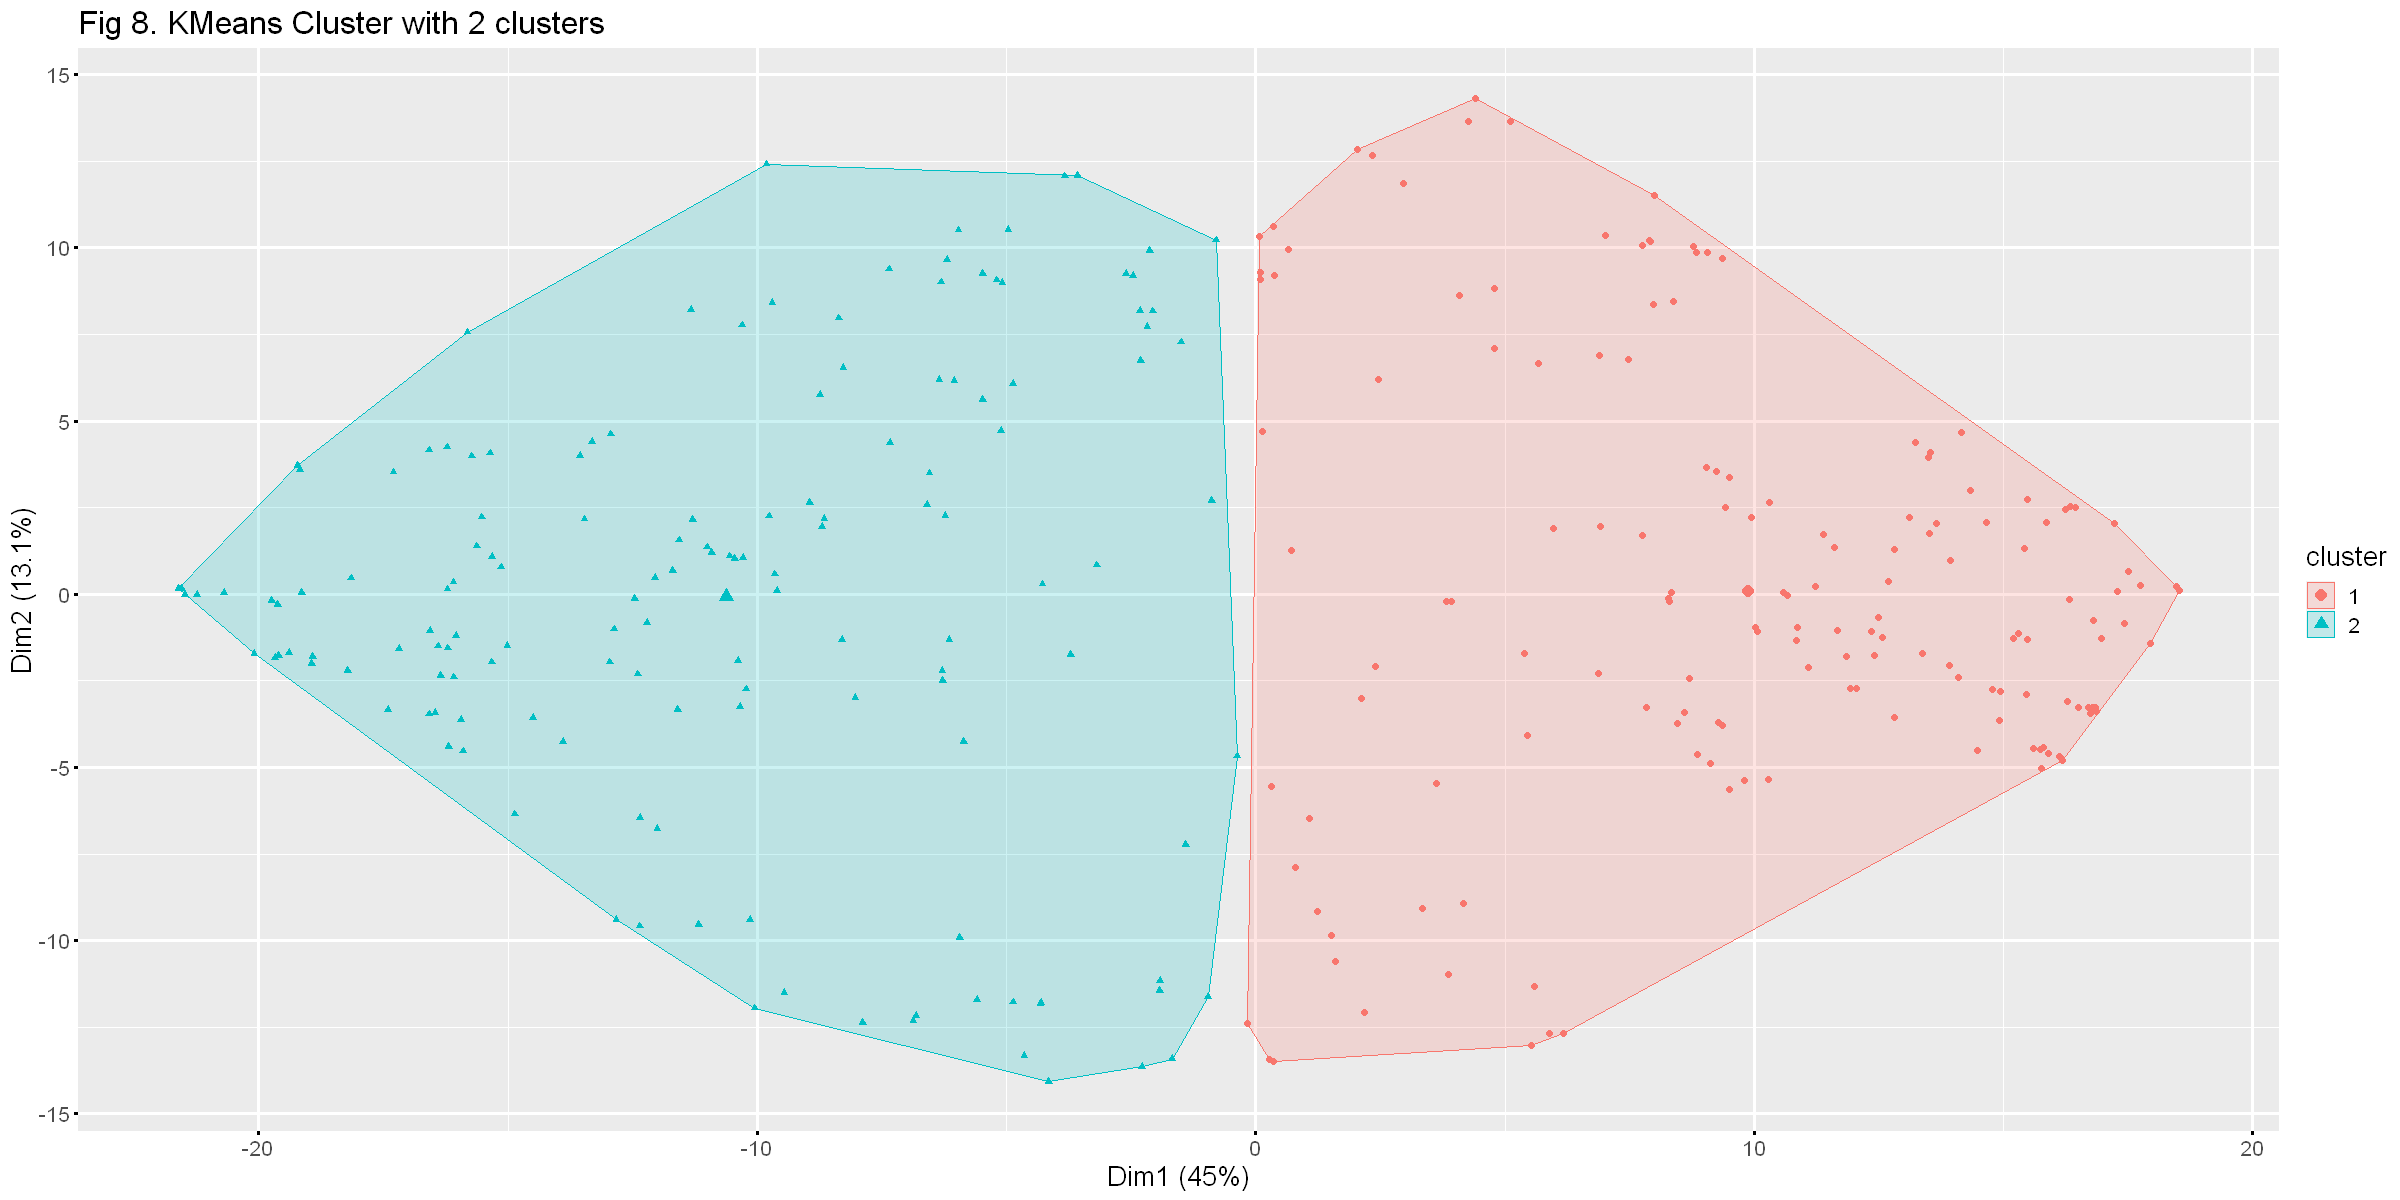

In [34]:
fviz_cluster(km_cluster, geom="point", data=feature_scaled) +
     labs(title="Fig 8. KMeans Cluster with 2 clusters") +
     theme(text = element_text(size = 16), element_line(size = 1))

km_cluster$tot.withinss

>  Check the quality of the clusters on the feature level, by exploring and visually inspecting the cluster profiles on the features.

In [35]:
dim(as.data.frame(feature_scaled))

[1] 45753     1

In [36]:
cluster_data$cluster_label <- km_cluster$cluster
cluster_data[["cluster_label"]] <- as.factor(cluster_data[["cluster_label"]])

In [37]:
head(cluster_data)

,trestbps,chol,thalach,oldpeak,ca,sex_1,cp_2,cp_3,cp_4,fbs_1,⋯,restecg_2,restecg_3,slope_2,slope_3,agegroup_4,agegroup_5,agegroup_6,agegroup_7,agegroup_8,cluster_label
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,145,233,150,2.3,0,1,0,0,0,1,⋯,0,0,0,0,0,0,1,0,0,2
2,160,286,108,1.5,3,1,1,0,0,0,⋯,0,0,1,0,0,0,0,1,0,2
3,120,229,129,2.6,2,1,1,0,0,0,⋯,0,0,1,0,0,0,0,1,0,2
4,130,250,187,3.5,0,1,0,1,0,0,⋯,1,0,0,0,1,0,0,0,0,1
5,130,204,172,1.4,0,0,0,0,1,0,⋯,0,0,0,1,1,0,0,0,0,1
6,120,236,178,0.8,0,1,0,0,1,0,⋯,1,0,0,1,0,0,1,0,0,1


In [38]:
cols_to_select <- c("trestbps", "chol", "thalach", "oldpeak", "cluster_label")

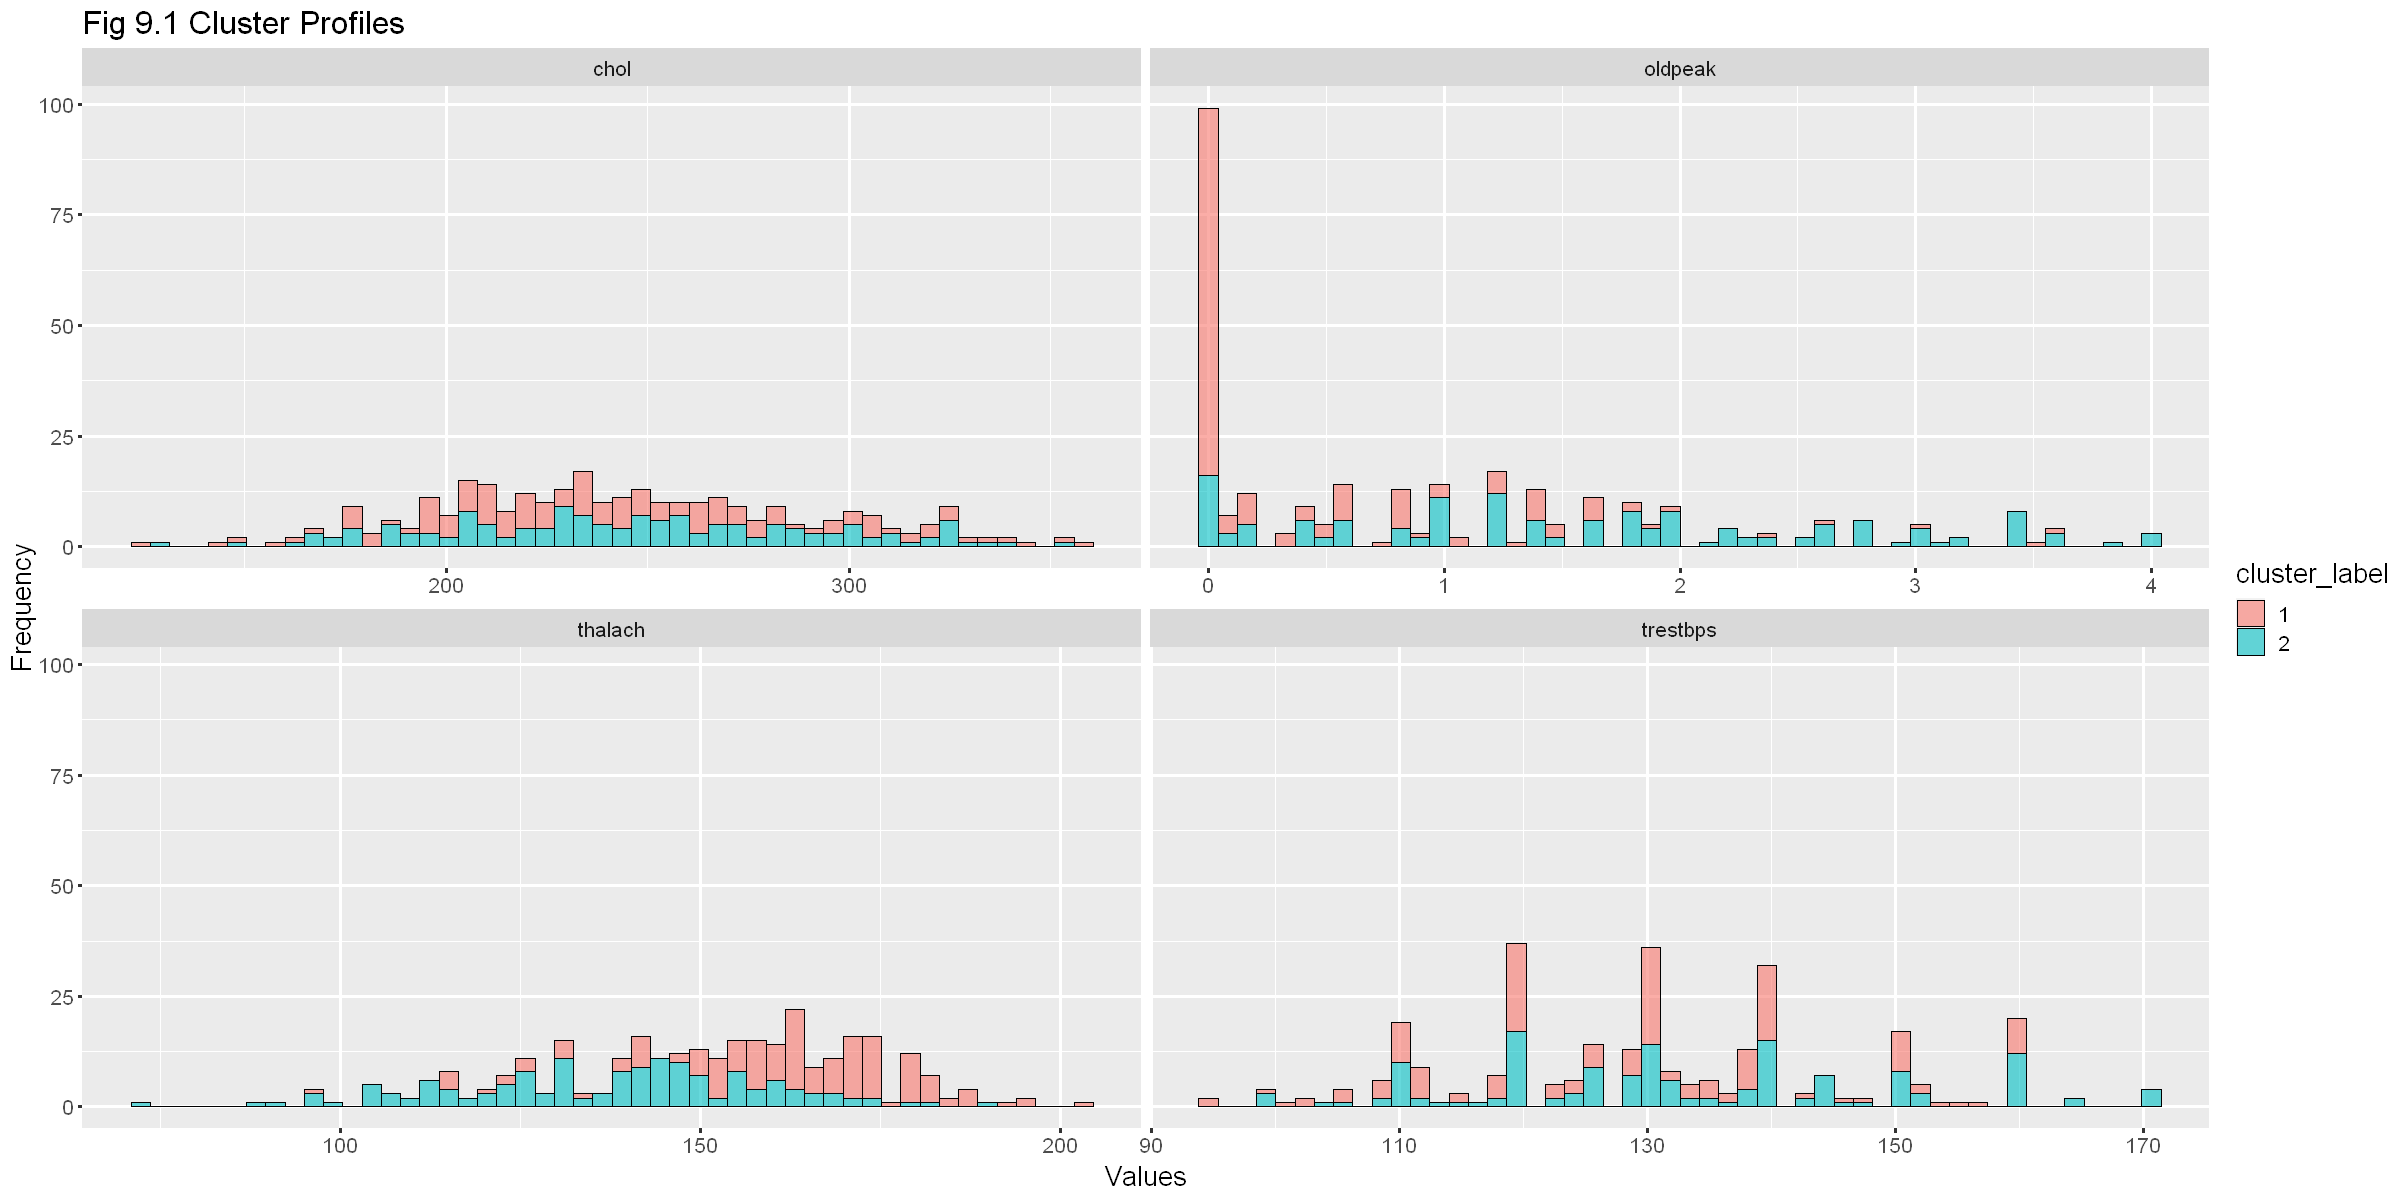

In [39]:
cluster_data %>% 
    select(all_of(cols_to_select)) %>%
    gather(attributes, value, 1:4) %>%
    ggplot(aes(x=value, fill=cluster_label, group=cluster_label)) +
        geom_histogram(alpha=0.6, bins=50, color="black") +
        facet_wrap(~attributes, scales="free_x") +
        labs(title="Fig 9.1 Cluster Profiles", x="Values", y="Frequency") +
        theme(text = element_text(size = 16), element_line(size = 1))

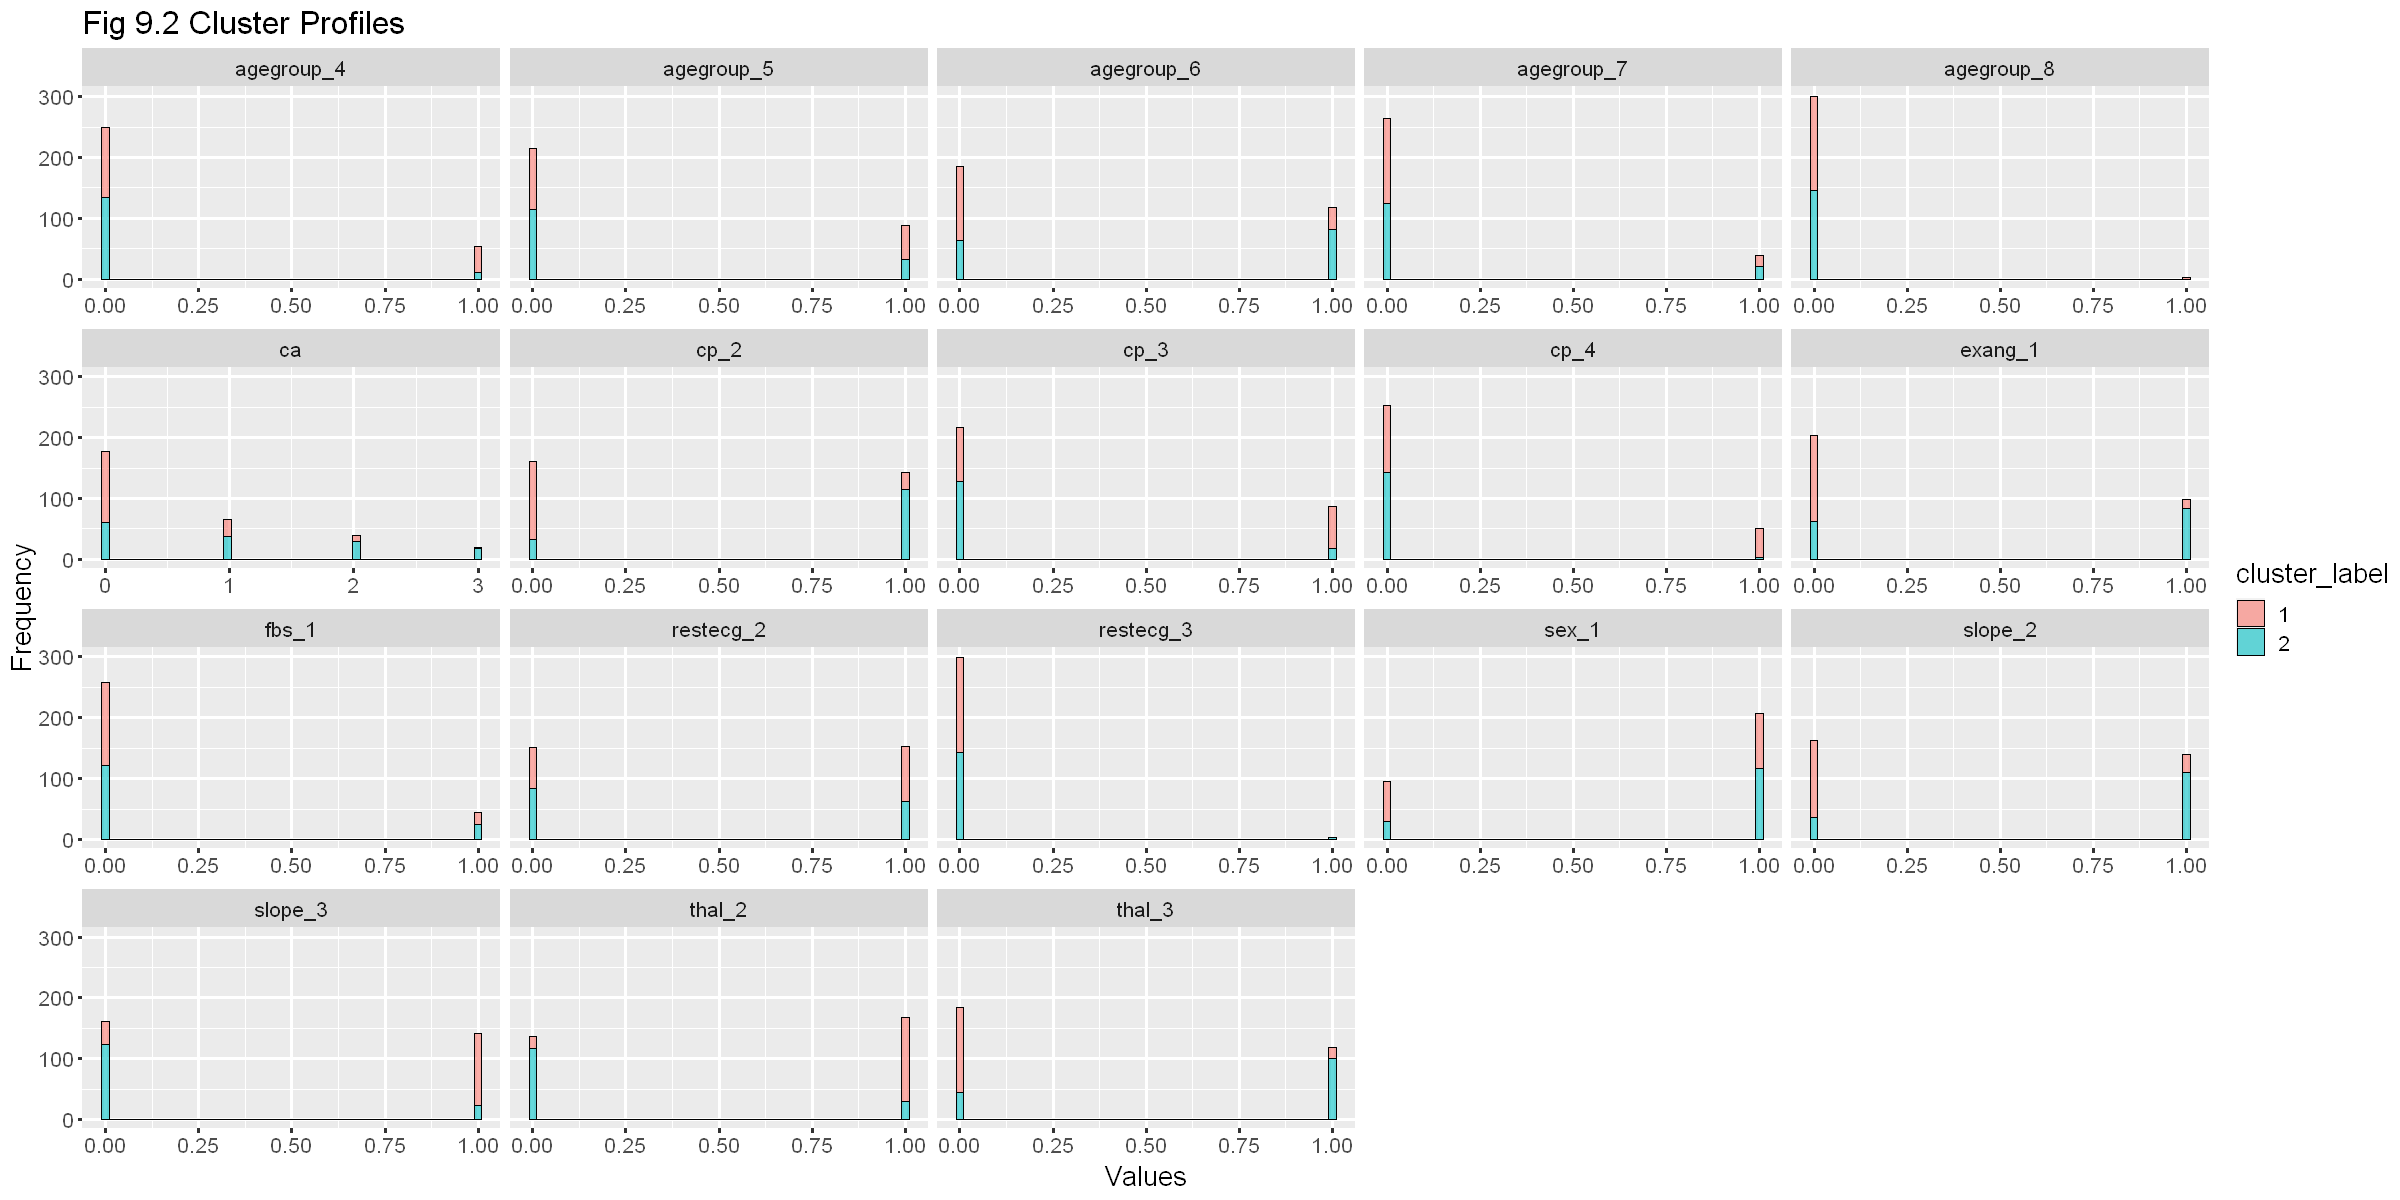

In [40]:
cluster_data %>% 
    select(-all_of(cols_to_select[1:4])) %>%
    gather(attributes, value, 1:18) %>%
    ggplot(aes(x=value, fill=cluster_label, group=cluster_label)) +
        geom_histogram(alpha=0.6, bins=50, color="black") +
        facet_wrap(~attributes, scales="free_x") +
        labs(title="Fig 9.2 Cluster Profiles", x="Values", y="Frequency") +
        theme(text = element_text(size = 16), element_line(size = 1))

> - `Fig 9.1` and `Fig 9.2` shows that the clusters are overlapping with the values without the clear indication of the specific range of values completely belonging to a cluster.
> - This is can be improved if the number of the clusters to form are increased.

### Optimizing K Clusters  <a class="anchor"  id="kmeans_k"></a>[↑](#top)

> Three methods are used for finding out the optimal K value
    > - `Elbow Method`
        > Within Sum of squares for each value of K is calculated and plotted. An elbow bent / knee like shape occurence is seeked for determining the K value. 
    > - `Silhouette Method`
        > This method calculates the silhouette value for each value of K and the K value that has the maximum average silhouette is selected as optimal 
    > - `Gap Statistic Method`
        > Total intra-cluster variation for K values are computed and compared against null reference data distribution. K value with the largest gap statistic will be considered as optimal.
>       
> Majority from the output of the 3 methods is selected as K value.

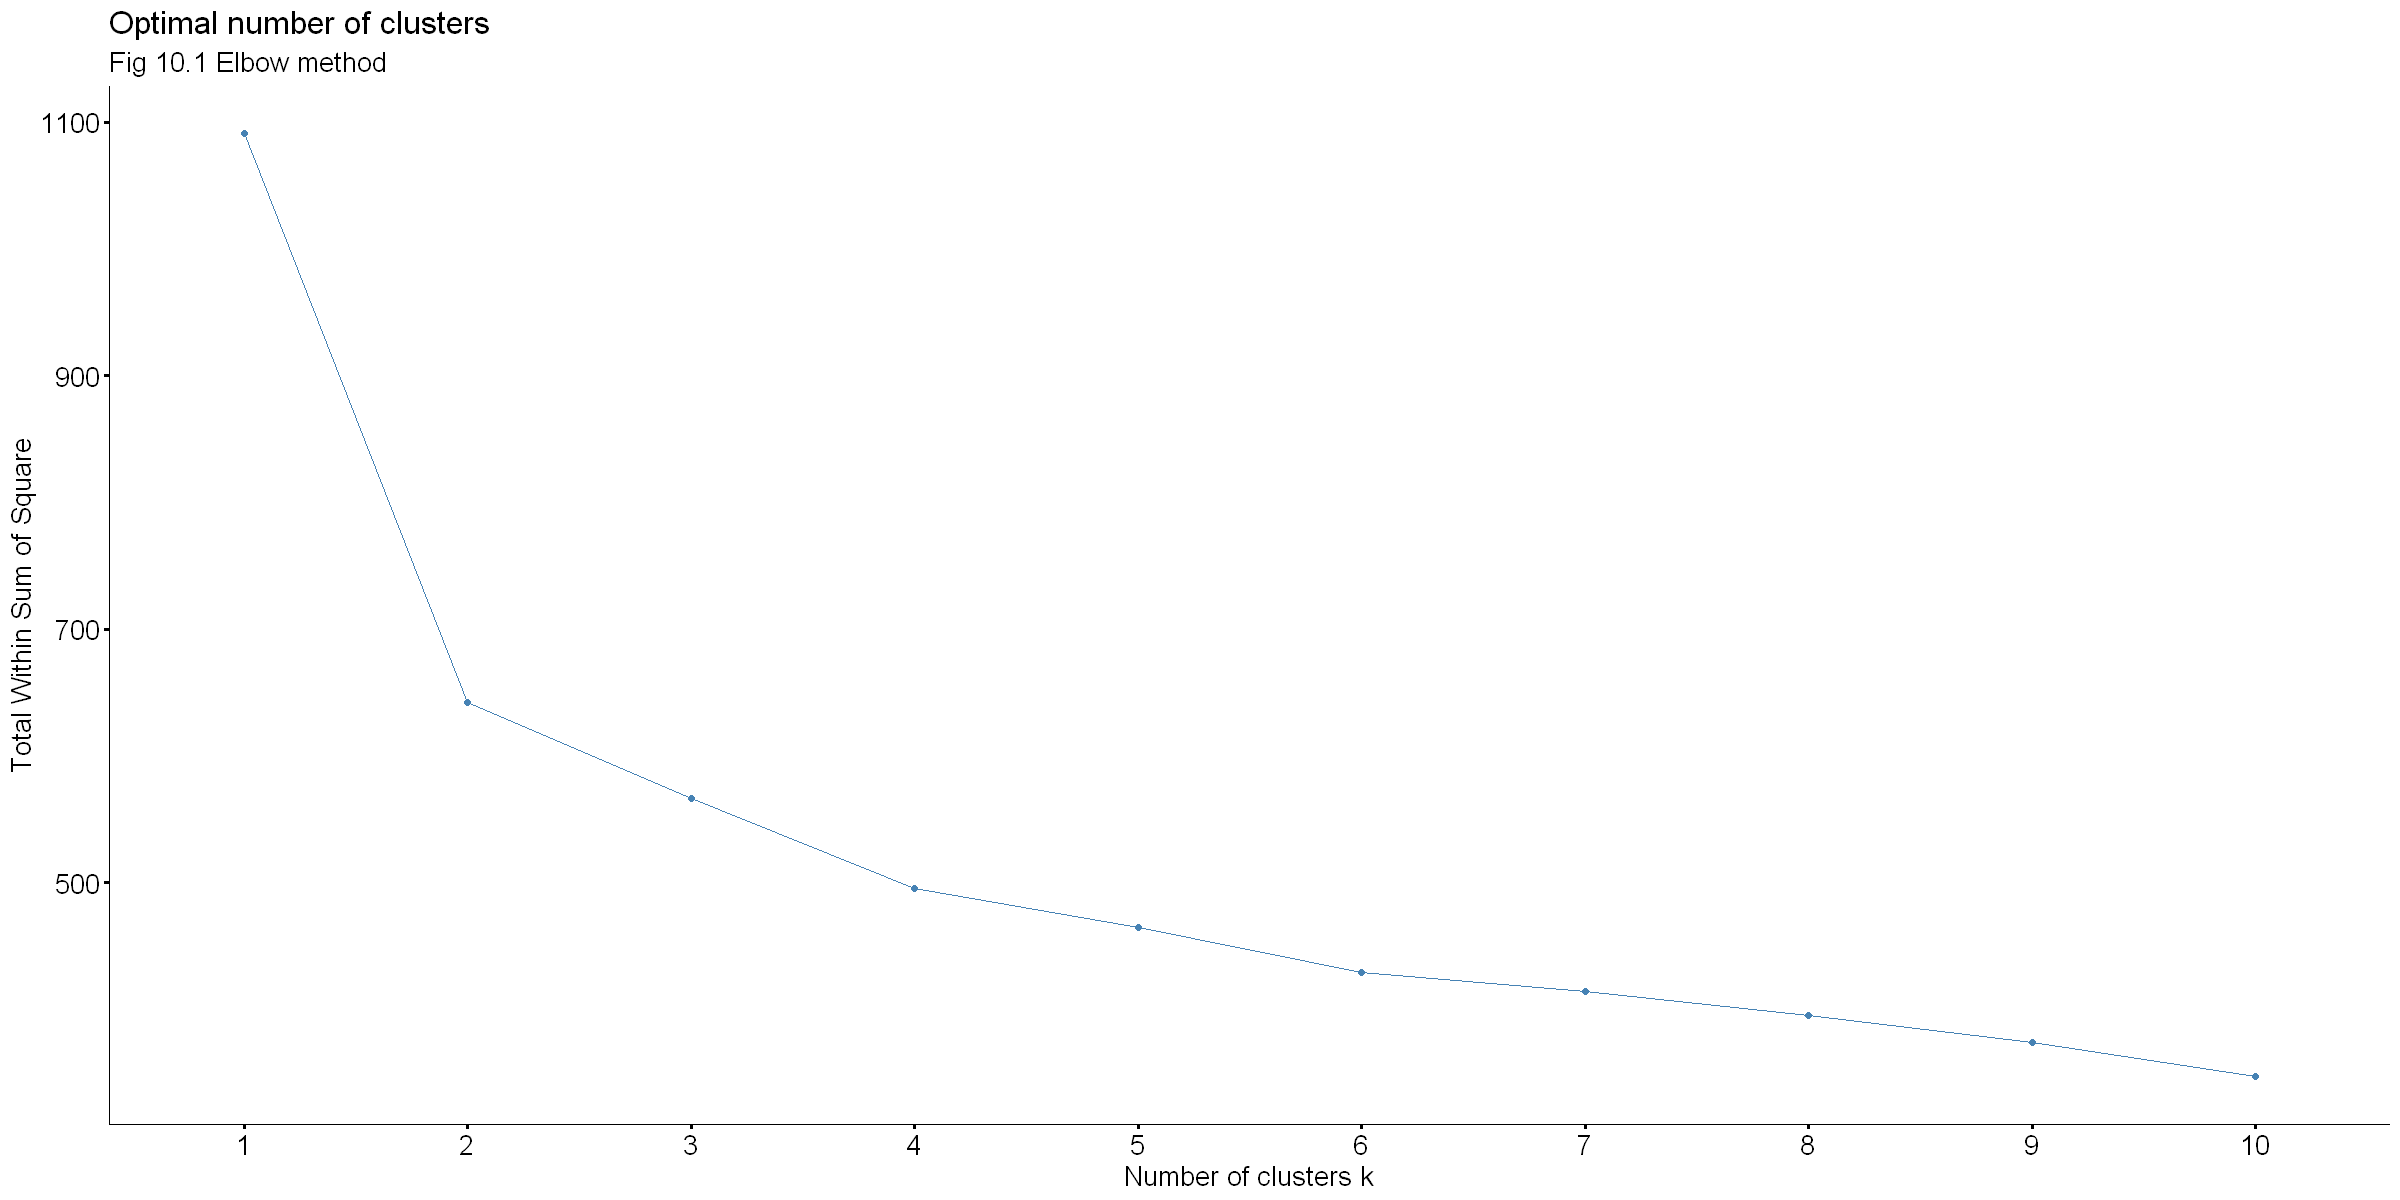

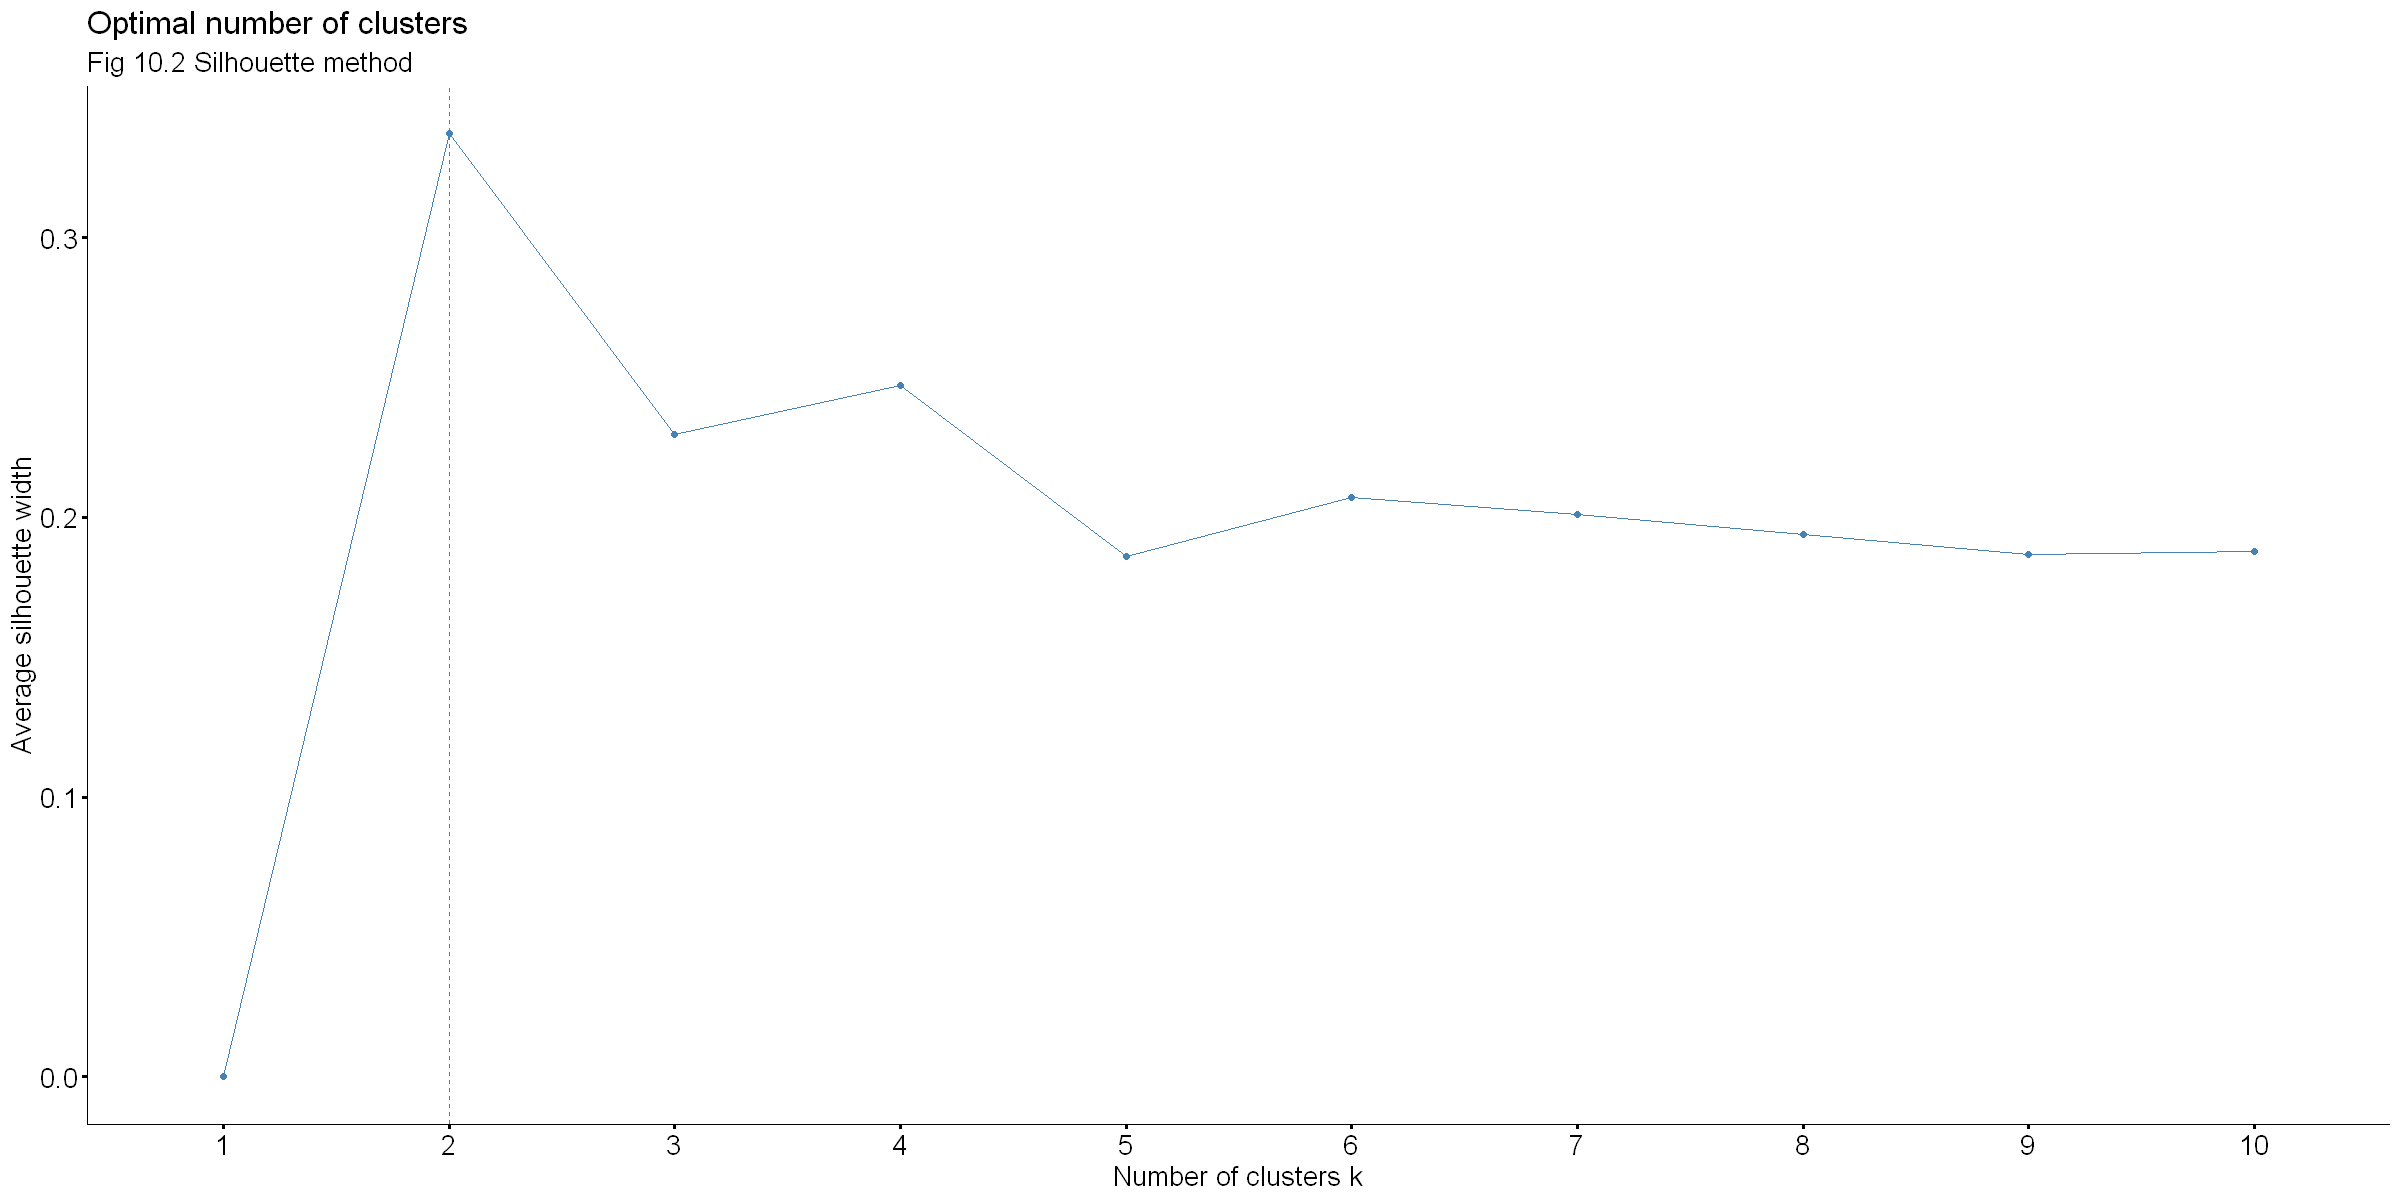

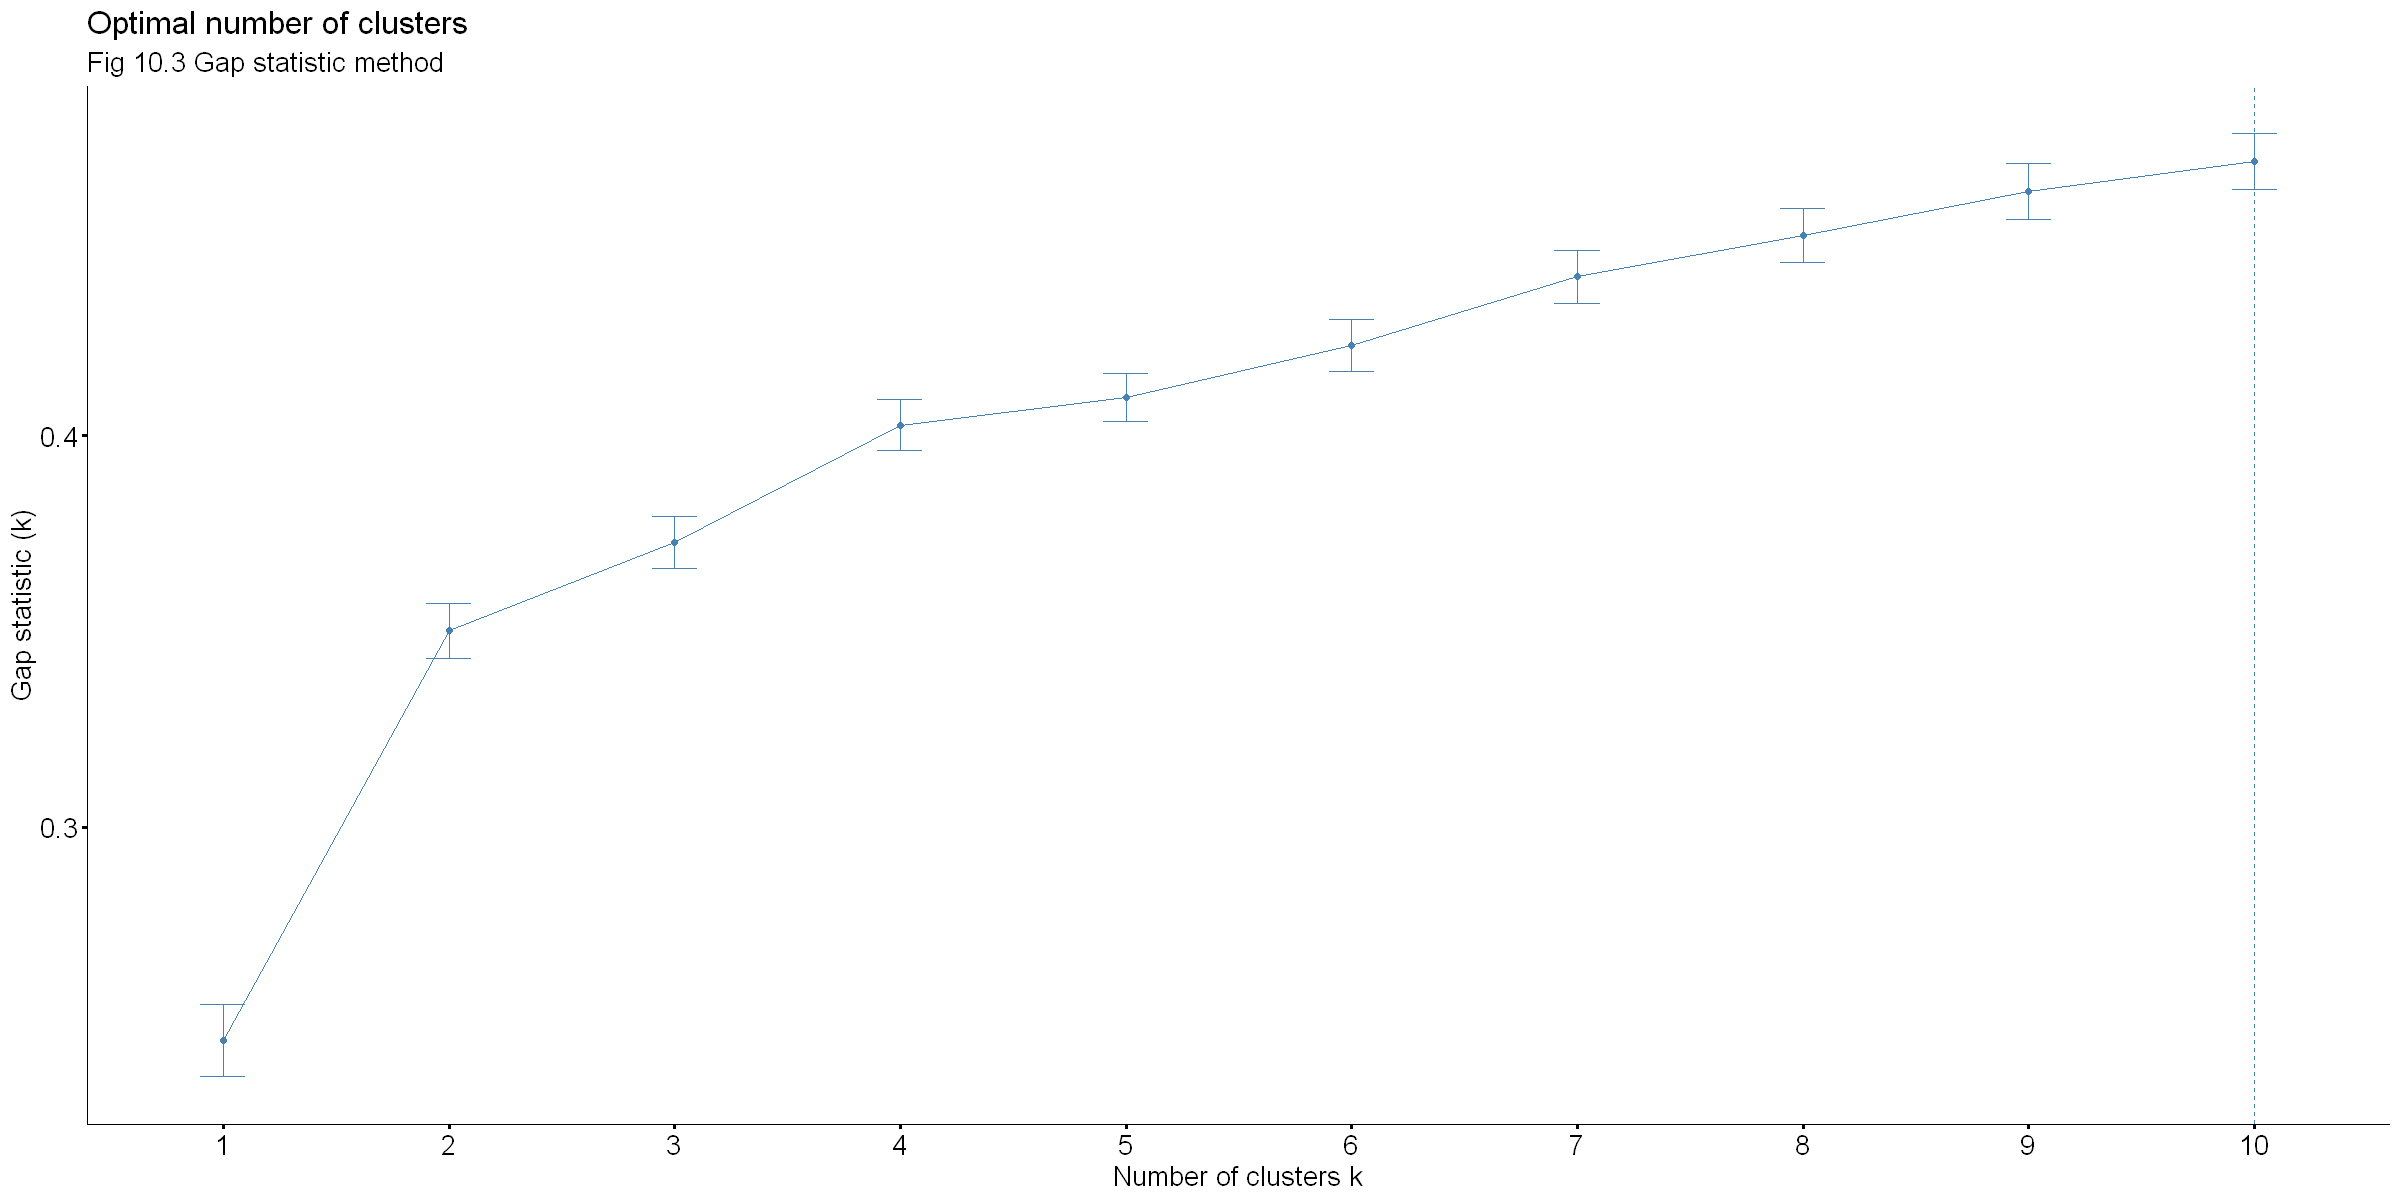

In [41]:
# Elbow method
fviz_nbclust(as.matrix(feature_scaled), kmeans, method = "wss") +
    labs(subtitle = "Fig 10.1 Elbow method") +
    theme(text = element_text(size = 16), element_line(size = 1))

# Silhouette method
fviz_nbclust(as.matrix(feature_scaled), kmeans, method = "silhouette")+
    labs(subtitle = "Fig 10.2 Silhouette method") +
    theme(text = element_text(size = 16), element_line(size = 1))

# Gap statistic
fviz_nbclust(as.matrix(feature_scaled), kmeans, nstart = 25, method = "gap_stat", nboot = 50)+
    labs(subtitle = "Fig 10.3 Gap statistic method") +
    theme(text = element_text(size = 16), element_line(size = 1))

> From `Fig 10[1-3]` suggests that,
    > - `Elbow Method` says `K = 2`,
    > -  `Silhoutte Method` says `K = 2`,
    > -  `Gap Statistic Method` says `K = 10`
>  
> as optimal K for the clustering. `K = 2` is selected, as per majority rule

**Disadvantages of KMeans**


> - KMeans forms clusters differently every time its run, as the `initial centers are selected randomly`. Thus, The final results are sensitive to initial selection of centers.
> - Kmeans are `sensitive` to outliers.
> - `Prior knowledge` of data is necessary to obtain better cluster results.
> - `Shuffling and rearranging` of the data produces different results

[(2-5)](#reference)

## Hierarchial Clustering  <a class="anchor"  id="hclust"></a>[↑](#top)

<hr />

> - `Hierarchial Clustering` is an alternative to `partitioning` algorithm, where clusters are formed based on the `cluster similarity`.
> - There are two types of HC, `Agglomerative` and `Divisive` clustering
> - `Agglomerative` clustering is where the groups / clusters are formed based on similarity. `Linkage` function is responsible for linking the clusters based on the similarity on the calculated distances between the points. `AGNES` (Agglomerative Nesting) is an example.
> - `Divisive` clustering is the inverse of agglomerative where the clusters are split from one root into groups based on its heterogenosity. `DIANA` (Divisive Analysis) is an example.

[(2-5)](#reference)

In [42]:
hcl_complete <- hclust(feature_scaled, method="complete")
hcl_average <- hclust(feature_scaled, method="average")
hcl_ward <- hclust(feature_scaled, method="ward.D2")

> - `Linkage method: complete` is selected to achieve complete and compact clusters. It computes the maximum pairwise distances between two clusters.
> - `Linkage method: average` is selected to achieve more generalized clusters. It considers the distance between two clusters by computing the average distance between points of the two clusters
> - `Linkage method: ward.D2` is selected to achieve less variant clusters, as it minimizes the within cluster variation.

> - Inorder to select best `linkage method`, correlation between the formed tree and the distance metric is checked. The `higher the correlation, the better the given linkage method is able to represent the data in tree form`.

In [43]:
sprintf("Correlation using complete linkage %s", cor(feature_scaled, cophenetic(hcl_complete)))
sprintf("Correlation using average linkage %s", cor(feature_scaled, cophenetic(hcl_average)))
sprintf("Correlation using ward linkage %s", cor(feature_scaled, cophenetic(hcl_ward)))

[1] "Correlation using complete linkage 0.525833379988176"

[1] "Correlation using average linkage 0.645686635387481"

[1] "Correlation using ward linkage 0.596899378362641"

> - `Average` linkage method has the highest correlation and thus it is selected

### Optimizing K Clusters  <a class="anchor"  id="hc_k"></a>[↑](#top)

> Three methods are used for finding out the optimal K value
    > - `Elbow Method`
        > Within Sum of squares for each value of K is calculated and plotted. An elbow bent / knee like shape occurence is seeked for determining the K value. 
    > - `Silhouette Method`
        > This method calculates the silhouette value for each value of K and the K value that has the maximum average silhouette is selected as optimal 
    > - `Gap Statistic Method`
        > Total intra-cluster variation for K values are computed and compared against null reference data distribution. K value with the largest gap statistic will be considered as optimal.
    > - `Dunns Index` calculate the intra-cluster ratio of minimum separation and maximum diameter. Optimal Value of K should be selected for maximum Dunns index
>       
> Majority from the output of the 3 methods is selected as K value.

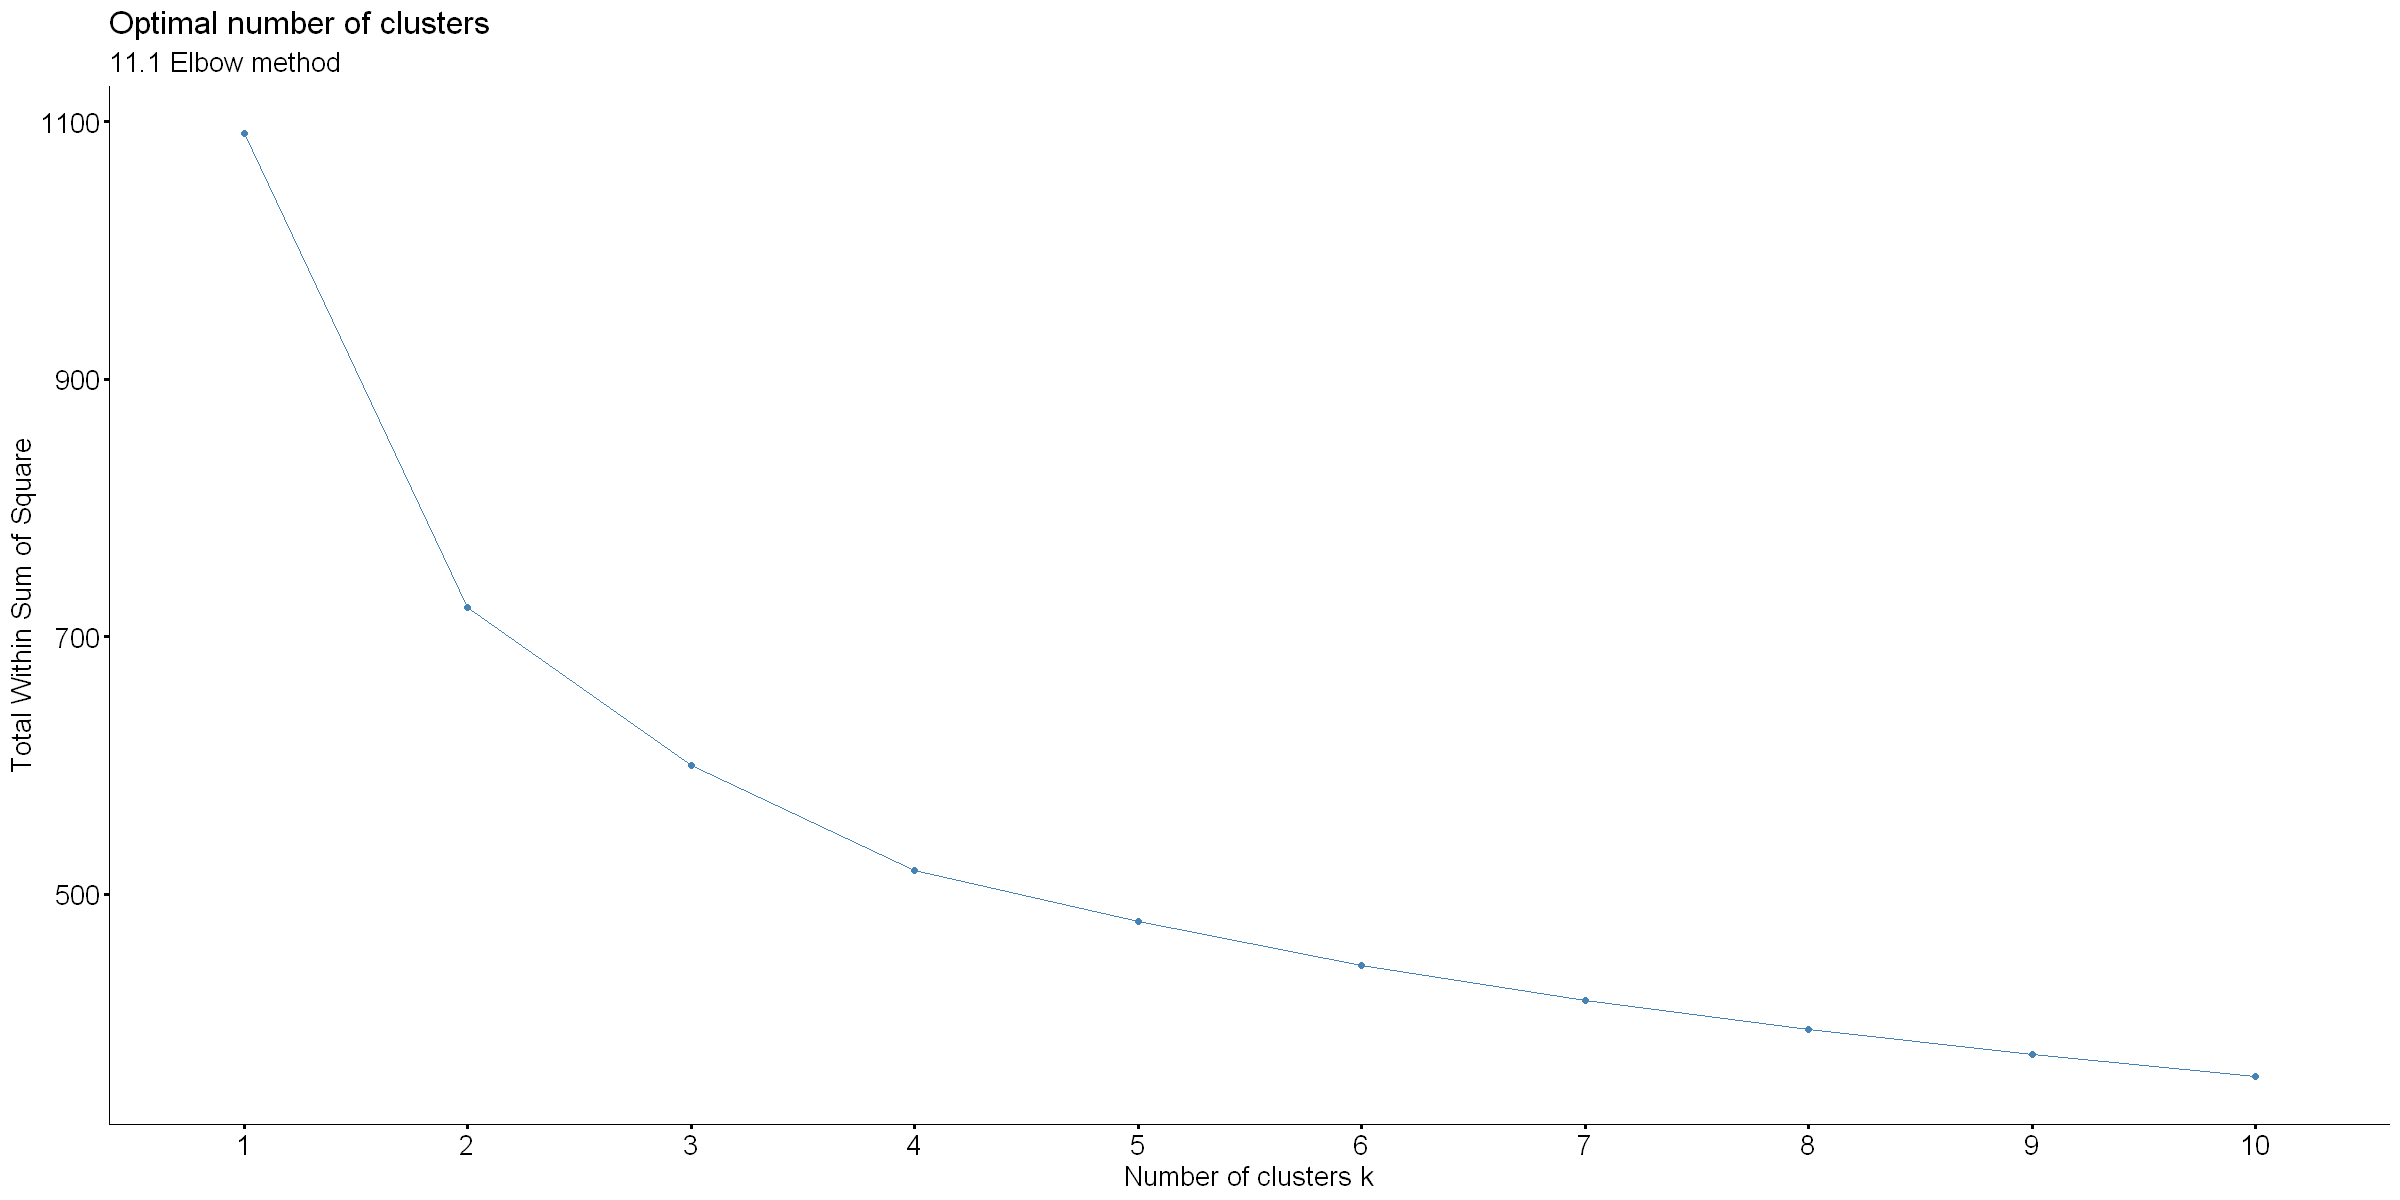

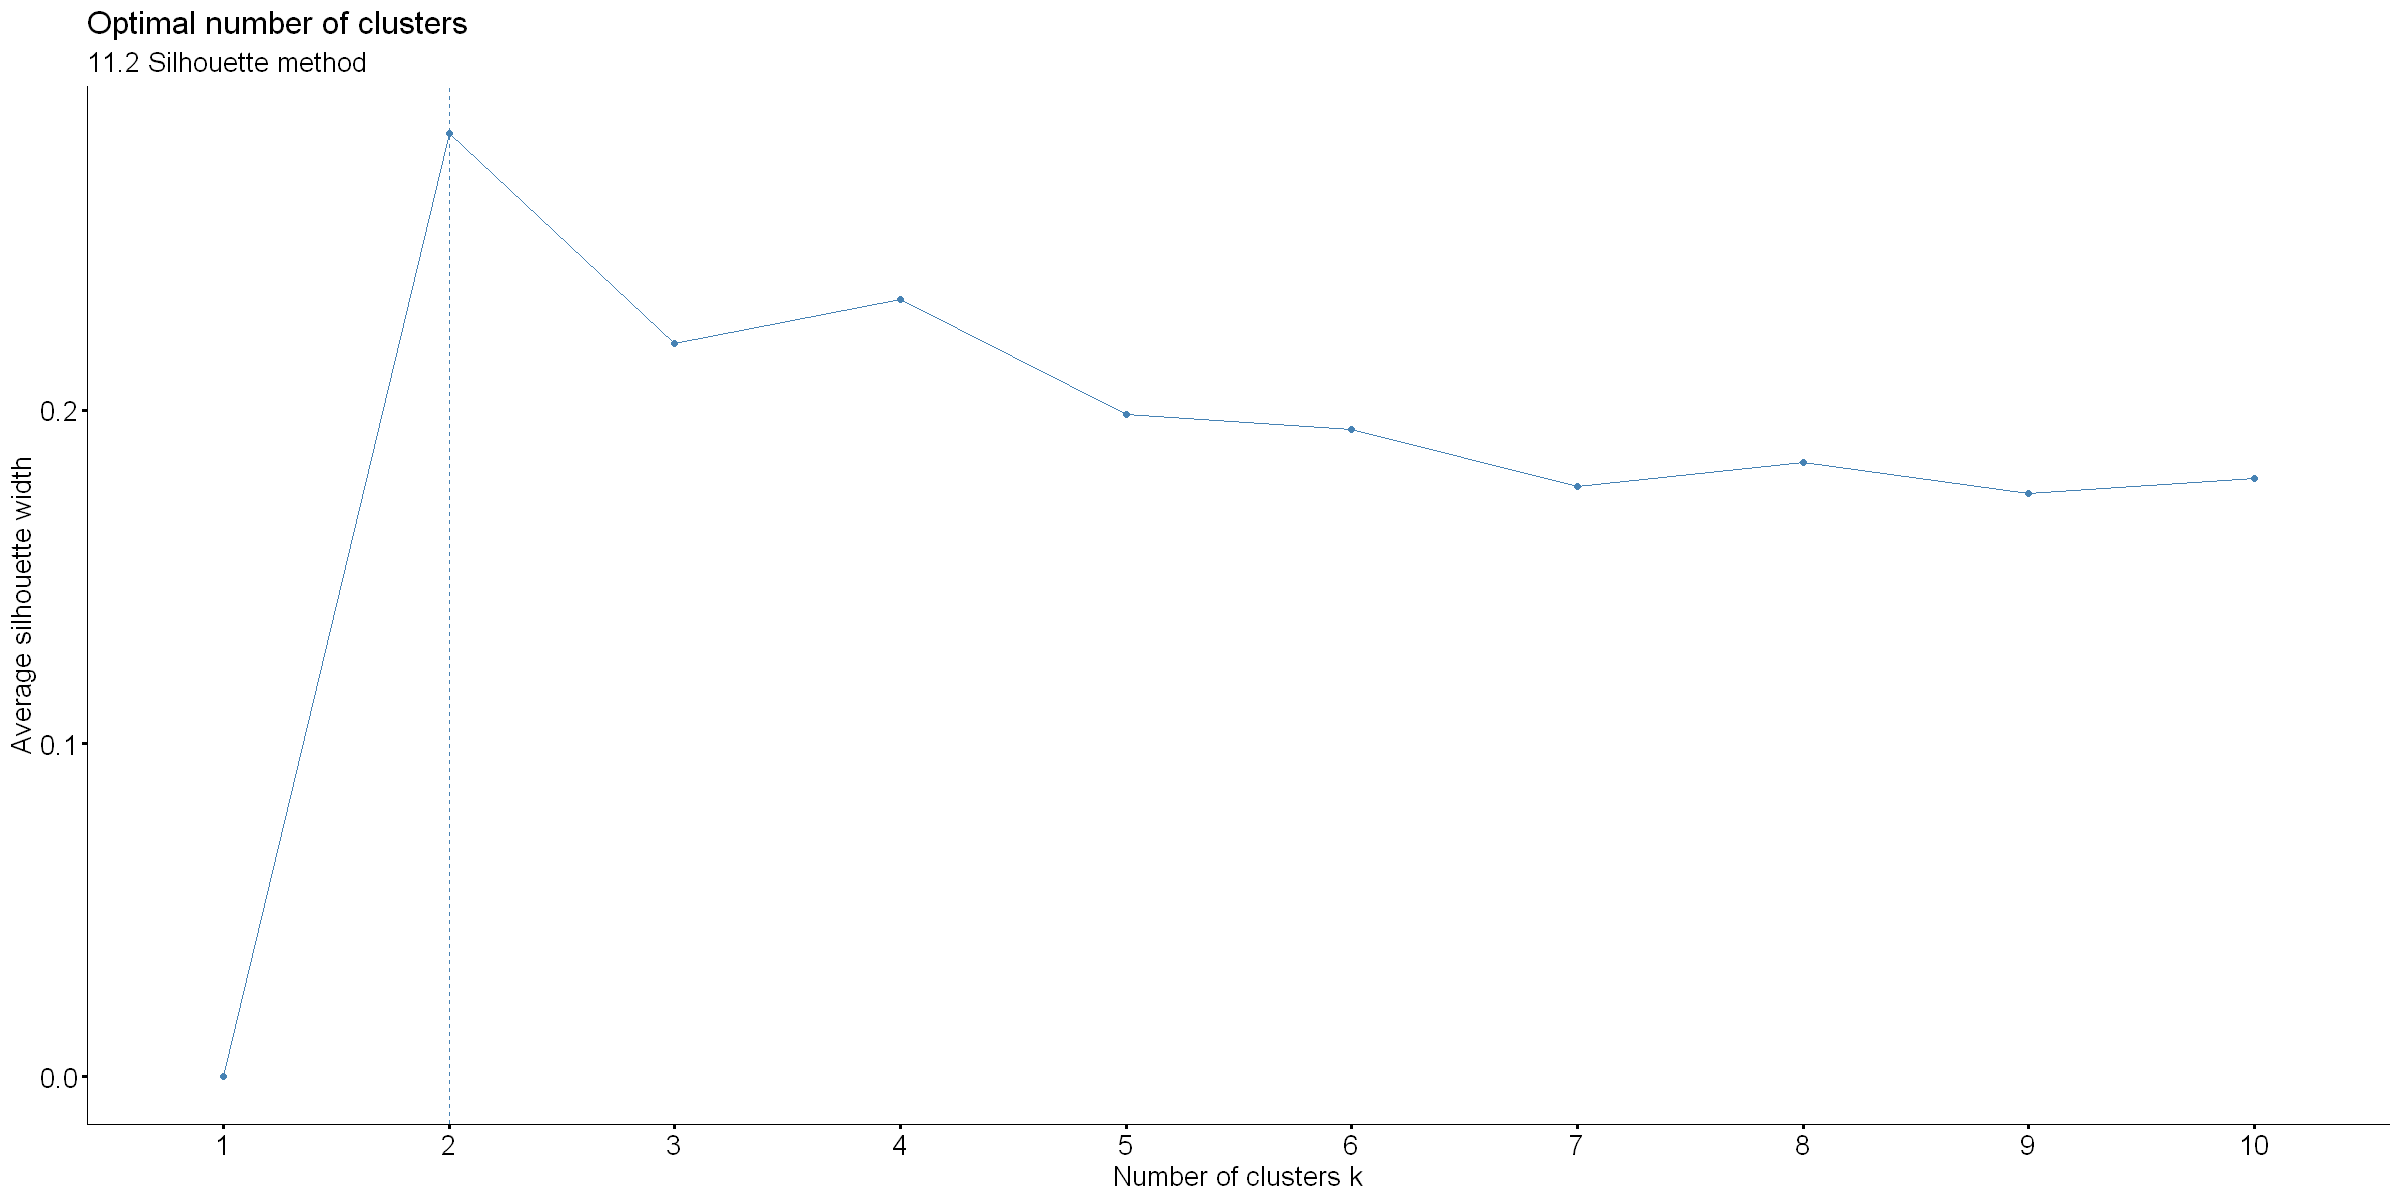

Warning message in min(interClust, na.rm = TRUE):
"no non-missing arguments to min; returning Inf"


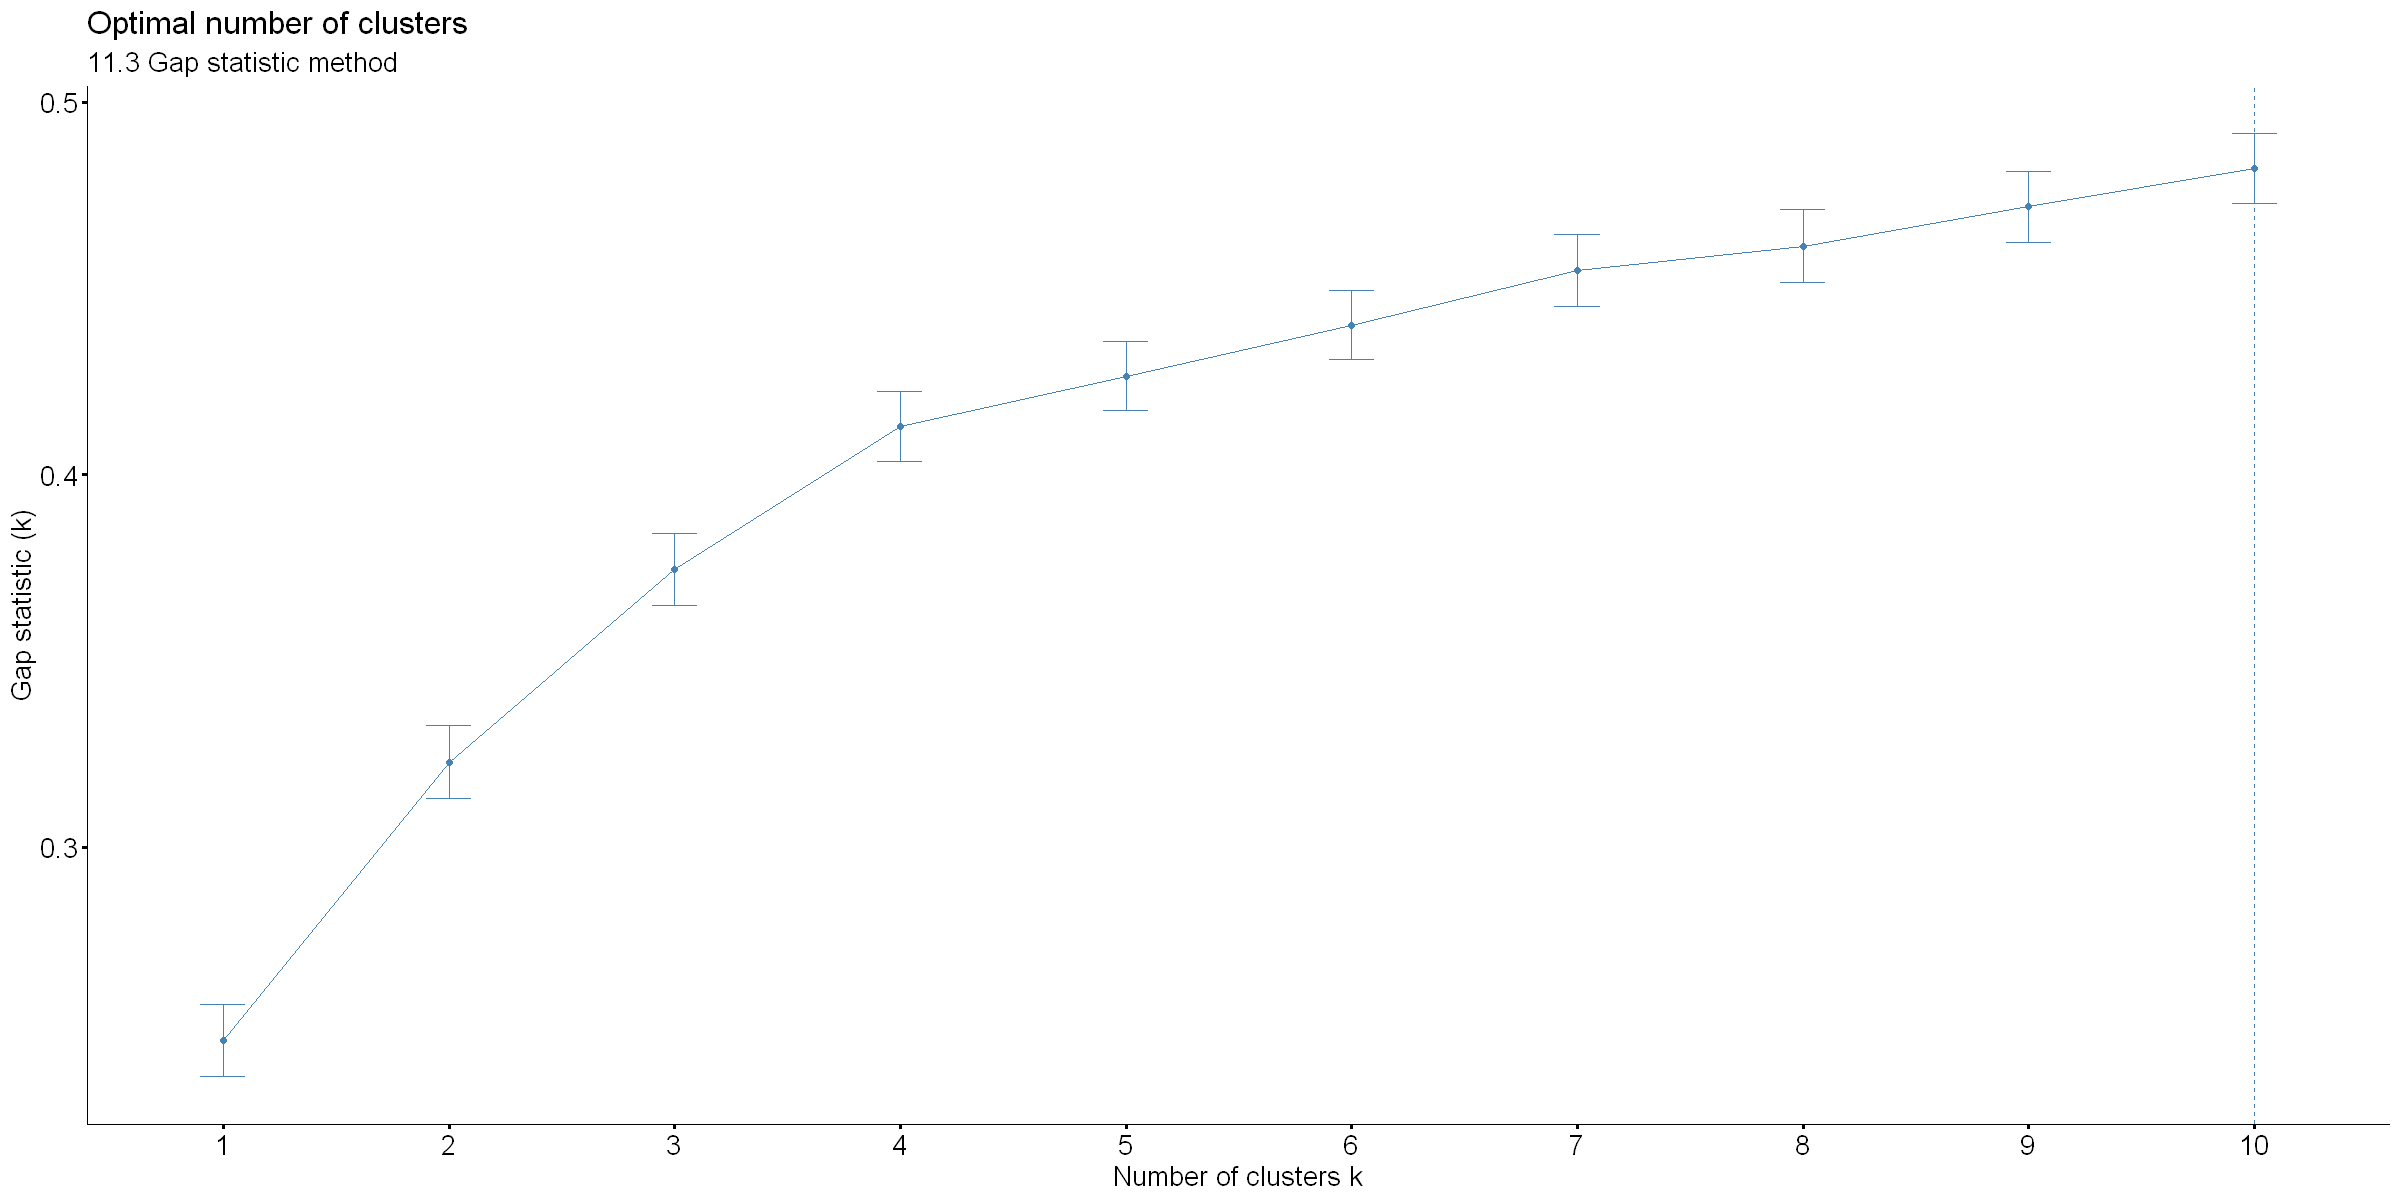

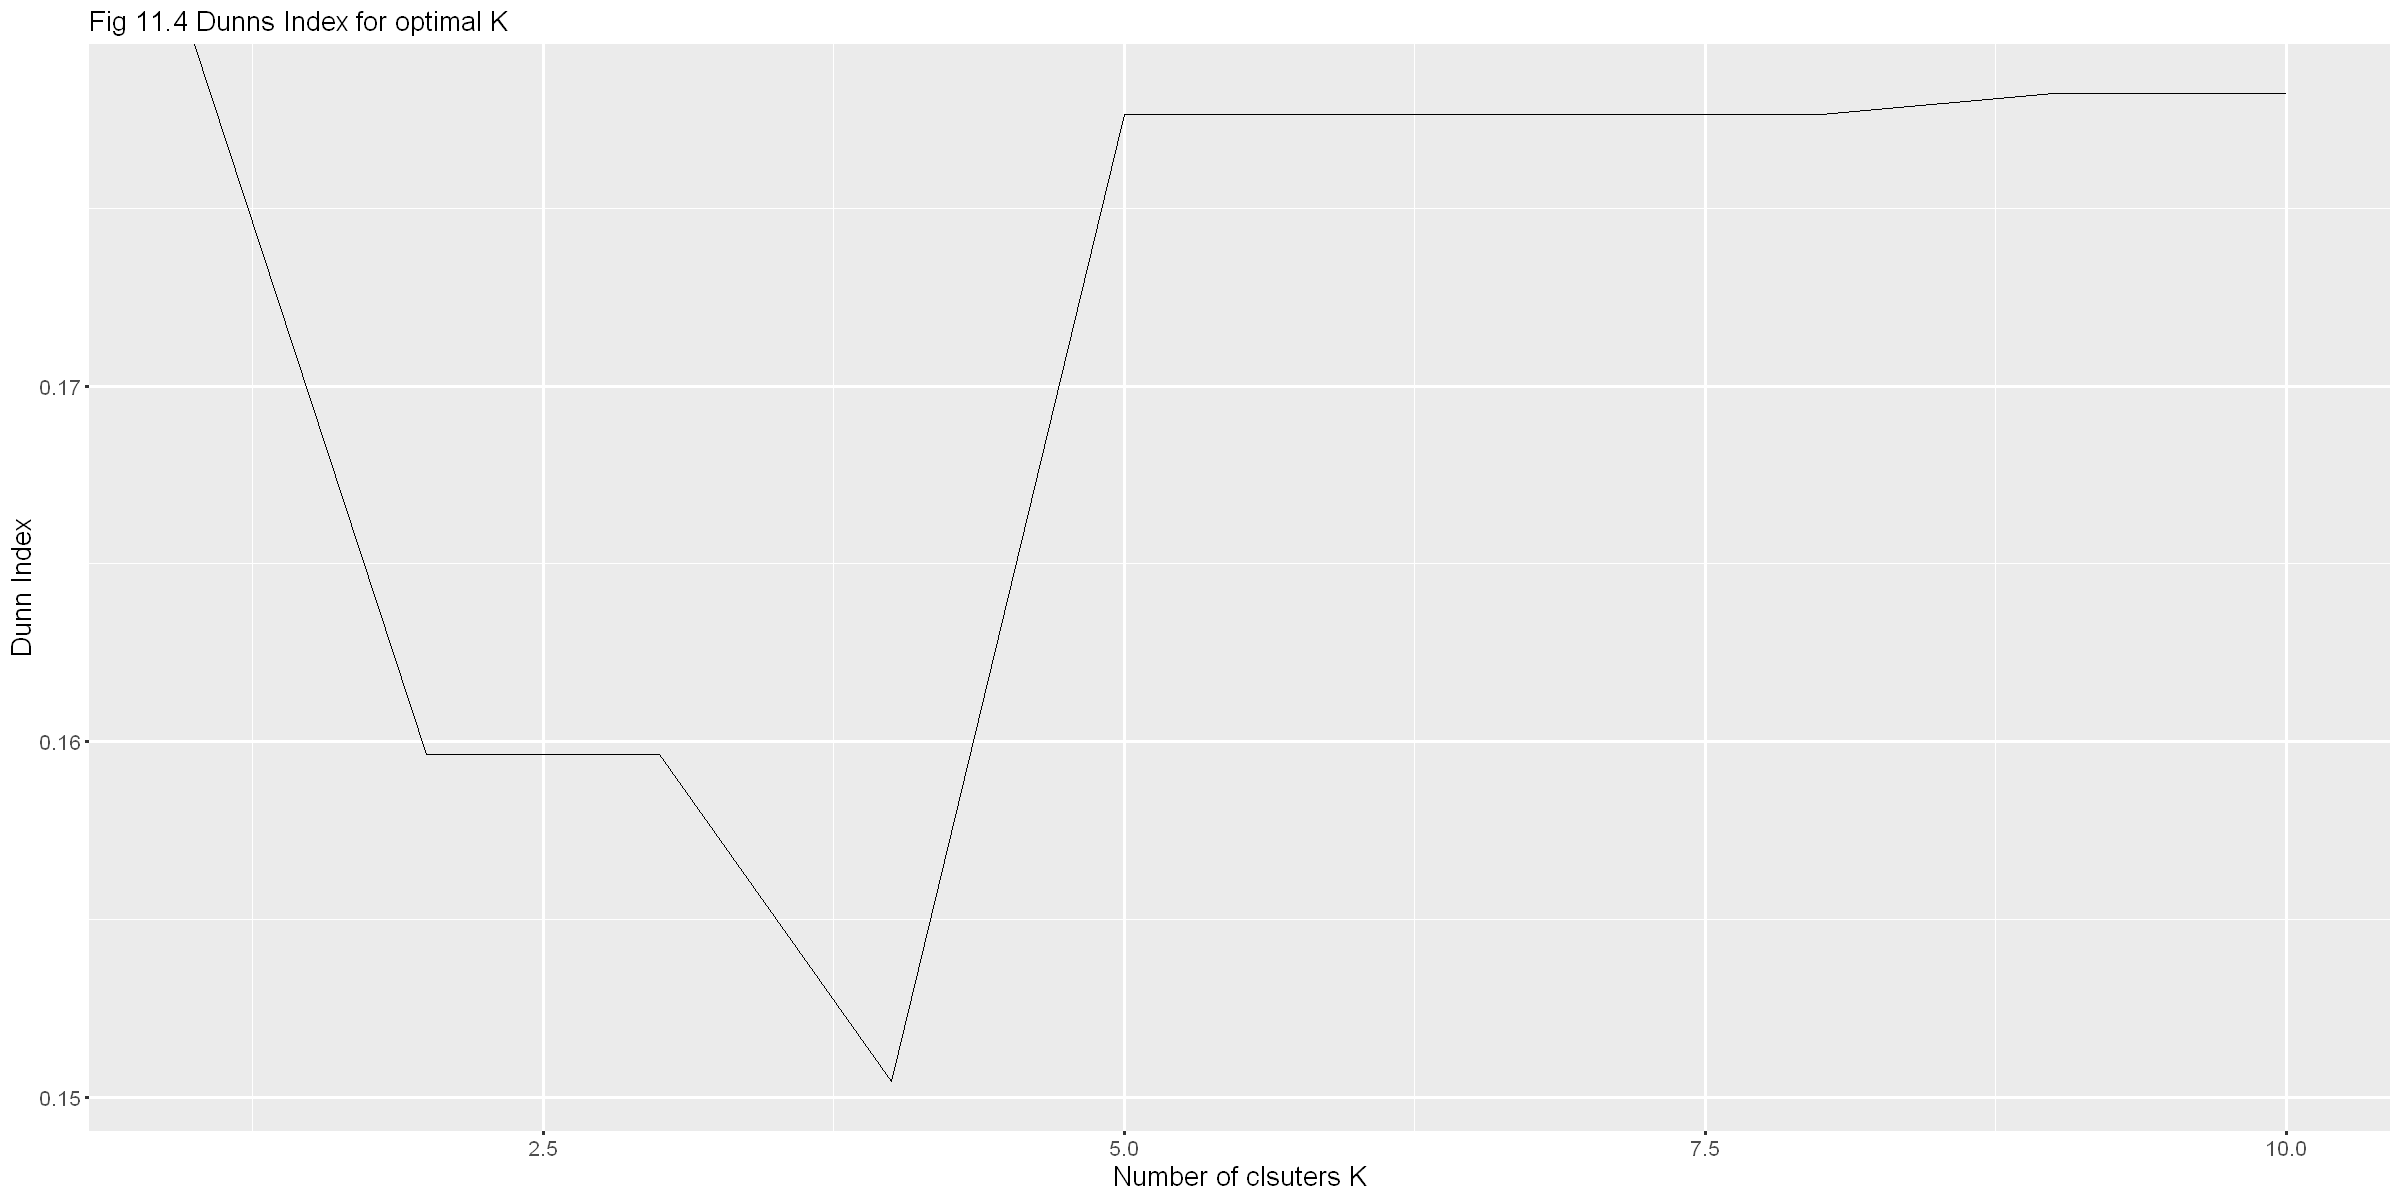

In [44]:
# Elbow method
fviz_nbclust(as.matrix(feature_scaled), hcut, method = "wss") +
    labs(subtitle = "11.1 Elbow method") +
    theme(text = element_text(size = 16), element_line(size = 1))

# Silhouette method
fviz_nbclust(as.matrix(feature_scaled), hcut, method = "silhouette")+
    labs(subtitle = "11.2 Silhouette method") +
    theme(text = element_text(size = 16), element_line(size = 1))

# Gap statistic
fviz_nbclust(as.matrix(feature_scaled), hcut, nstart = 25, method = "gap_stat", nboot = 50)+
    labs(subtitle = "11.3 Gap statistic method") +
    theme(text = element_text(size = 16), element_line(size = 1))

# Dunn index
dunns_idx <- data.frame()
for(k in 1:10){
    tmp <- as.data.frame(list(k=k, dunn_index=clValid::dunn(feature_scaled, cutree(hcl_average, k))))

    dunns_idx <- rbind(dunns_idx, tmp)
}

ggplot(data=dunns_idx, aes(x=k, y=dunn_index)) +
    geom_line() +
    labs(subtitle="Fig 11.4 Dunns Index for optimal K", x="Number of clsuters K", y="Dunn Index") +
    theme(text = element_text(size = 16), element_line(size = 1))

> From `Fig 11[1-4]` suggests that,
    > - `Elbow Method` says `K = 2`,
    > -  `Silhoutte Method` says `K = 2`,
    > -  `Gap Statistic Method` says `K = 10`
    > -  `Dunn Index Method` says `K < 2`
>  
> as optimal K for the clustering. `K = 2` is selected, as per majority rule

Warning message:
"The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as of ggplot2 3.3.4.
ℹ The deprecated feature was likely used in the factoextra package.
  Please report the issue at <https://github.com/kassambara/factoextra/issues>."


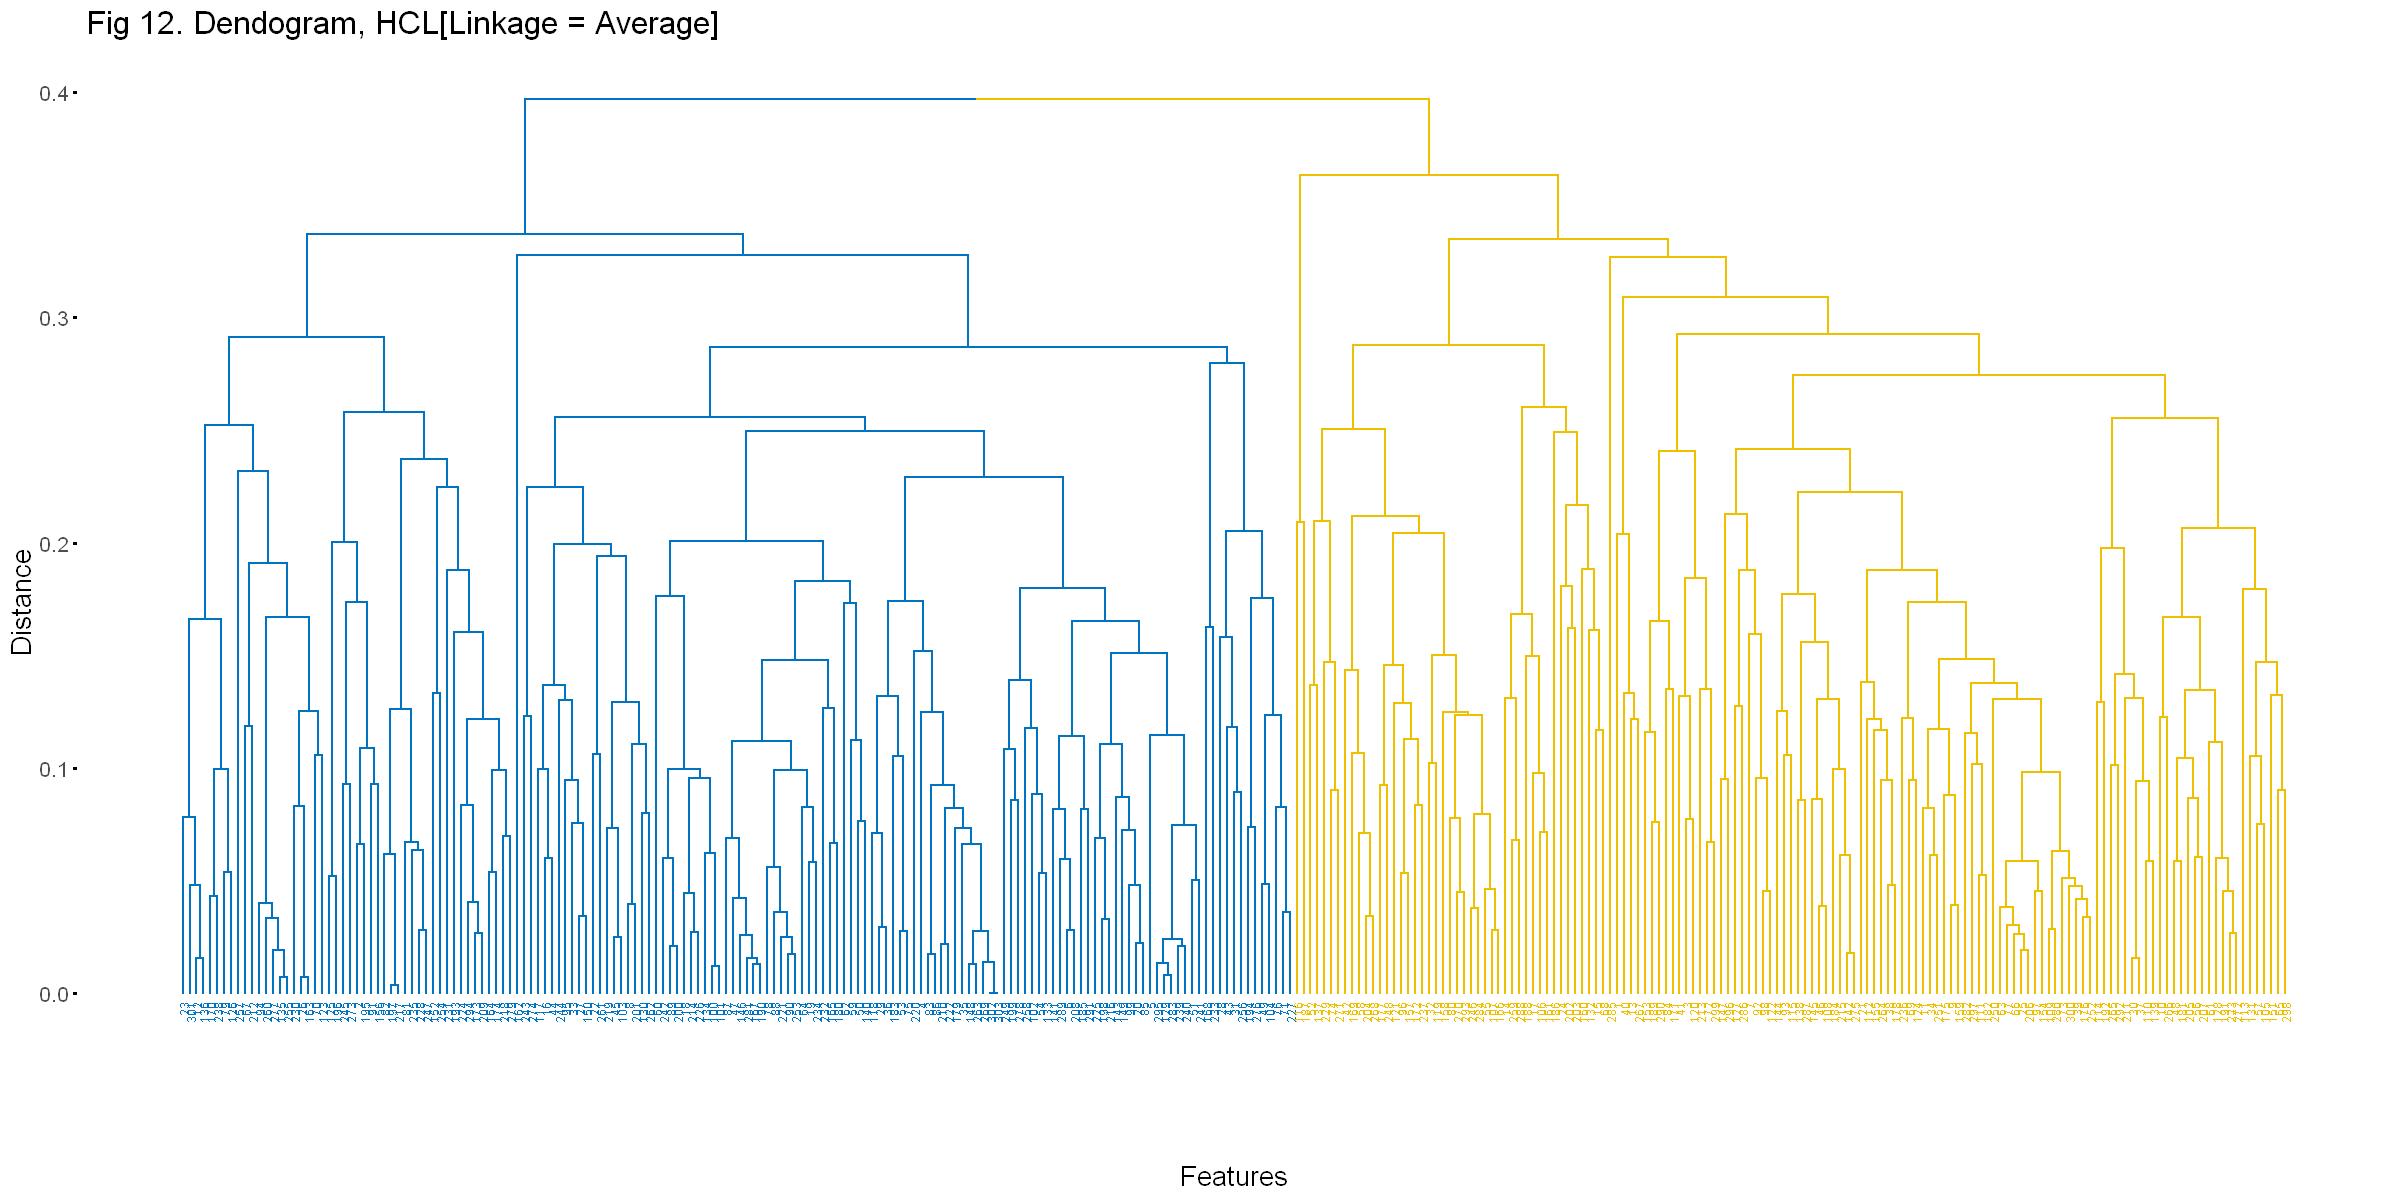

In [45]:
fviz_dend(hcl_average, cex = 0.5, k = 2,
          main = " Fig 12. Dendogram, HCL[Linkage = Average]",
          xlab = "Features", ylab = "Distance", sub = "", k_colors = "jco") +
     theme(text = element_text(size = 16), element_line(size = 1))

**Measuring Cluster Tendency**

> - It is important to check if the dataset has any meaningful clusters in them. To check that `Cluster Tendency` is measured.
> - `Hopkins statistic` is used to measure the cluster tendency.
> - `Visual inspection` is performed to check for real clusters.

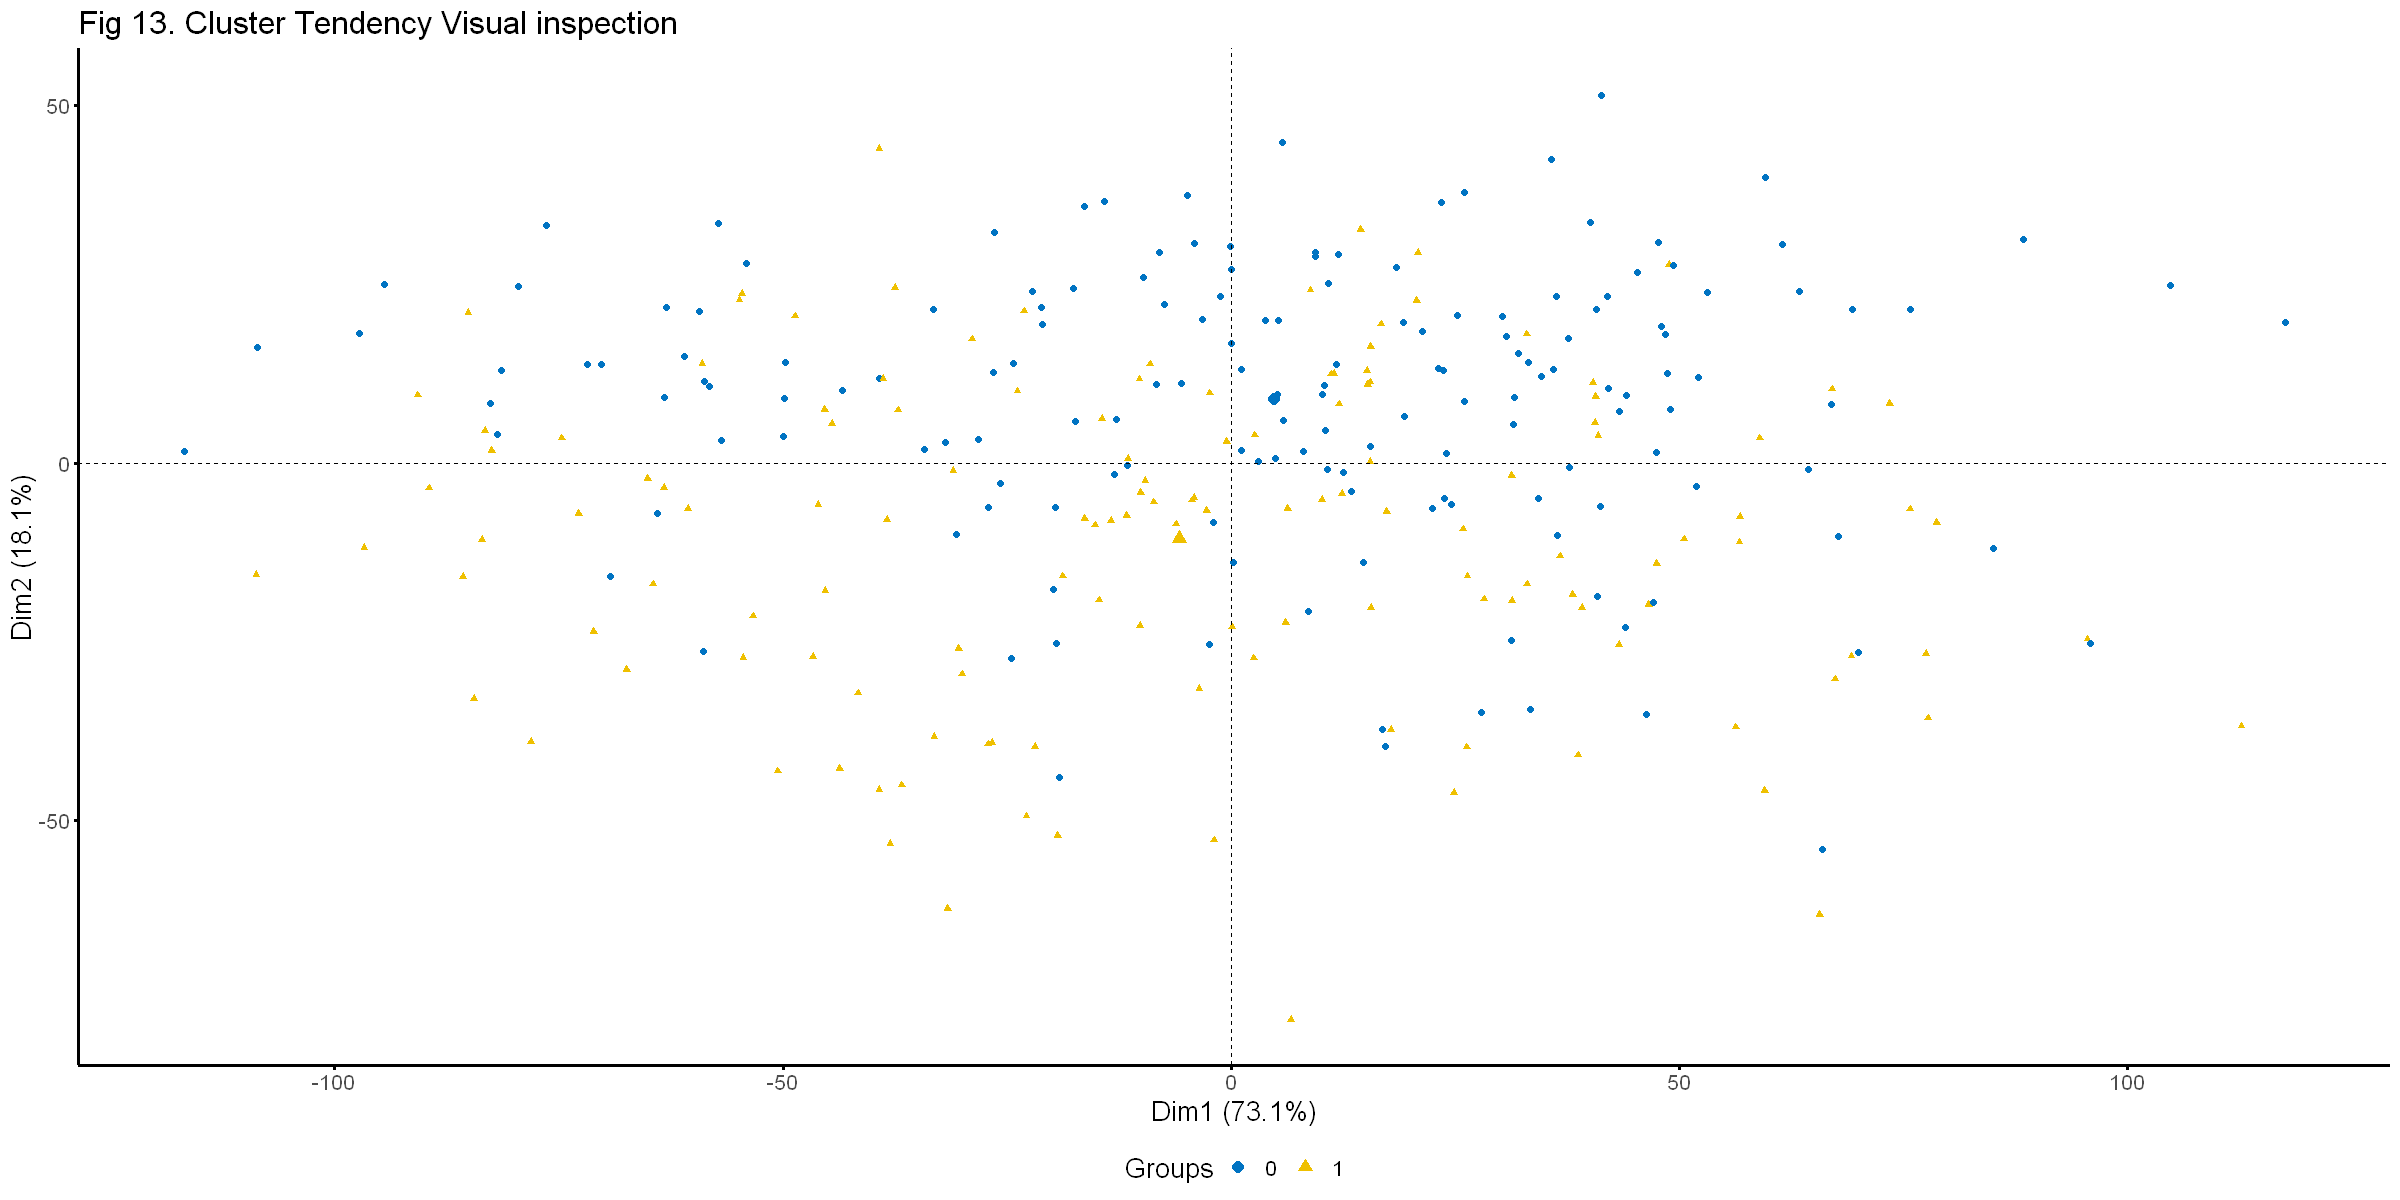

In [46]:
fviz_pca_ind(prcomp(dummy_encoded_data), title = "Fig 13. Cluster Tendency Visual inspection",
             habillage = dummy_encoded_data$num, palette = "jco",
             geom = "point", ggtheme = theme_classic(),
             legend = "bottom") +
    theme(text = element_text(size = 16), element_line(size = 1))

> - `Fig 13` shows that in the dataset there are only 2 clusters in real
> - The dataset has overlapping clusters

**Hopkins Statistic**

> - Hopkins Statistic $H$, states that, if the value of $H$ is closer to zero, the given dataset $D$ is significantly clusterable dataset.
> - Given dataset, if $H \approx 0.5$ then the data is uniformly distributed.

[(6)](#reference)

In [47]:
hopkins(as.matrix(feature_scaled), m = nrow(as.matrix(feature_scaled))-1)

[1] 1

> - $H$ statistic value is > 0.5 threshold, indicating that there is `no clusterable data` in the dataset.

**VAT**

> - `Fig 7` Provides the visual for VAT

## Q&A  <a class="anchor"  id="qna"></a>[↑](#top)

<hr />

#### Question 1

**Run K-means clustering on the above heart disease dataset and answer the following questions**

**1. Why should the attribute “class” in heart-c.csv (“num”) not be included for clustering?**
  > - Clustering is an unsupervised type of machine learning.
  > - The outcome of clustering are homogenous groups or cluster.
  > - The purpose is to simulate an unsupervised setting where the assumption is label for the dataset is not available.
  > - `class` column in the dataset is optional, using it will not make any influence / difference as clustering meaures the distance between points and other heuristic techniques to group / form clusters.
  

**2. Run the K-means algorithm and provide reasoning for the optimum value of K.**
  > - Optimal value of `K = 2`
  > - The optimal value of K was selected by comparing 3 different optimal solution search methods `Elbow`, `Silhouette`, `Gap Statistic`. The majority agreement rule was applied on the results of these methods

**3. Which features would you expect to be less useful when using K-means and why?**
  > - All the `categorical` features in the dataset are expected to be less useful in kmeans.
  > - Kmeans algorithm is `best suited for numerical data`. When the euclidean distances are calculated between the points it has no meaning when computed over a space of dummy one hot encoded variables.
  > - Such variables adds noise to the clustering algorithm and increases the complexity.Thus, `KModes` algorithm is preferred for categorical data. Using `Kmodes` will change the workflow of clustering and will be different from above implementation.

[(9)](#reference)

#### Question 2

**Run the hierarchical clustering on above heart disease dataset, and answer the following questions**

**1. Show the clustering results in a tree structure and provide reasoning for the optimal number of clusters**
  > - `Fig 13` shows the clustering results in a tree.
  > - Optimal value of `K = 2`
  > - The optimal value of K was selected by comparing 3 different optimal solution search methods `Elbow`, `Silhouette`, `Gap Statistic`. The majority agreement rule was applied on the results of these methods


**2. Describe the link method you used.**
  > - Initially `Complete`, `Average`, `Ward D2` all there methods were selected to compute the clusters.
  > - The `correlation`  between `cluster trees` and the `distance matrix` was calculated.
  > - The `linkage method` with the `highest correlation` is selected.
  > - In this case `Average` Linkage method is selected that had  the highest correlation.
>
> **Average Linkage Method**
    > - Average Linkage Method is `midway` between `Compelete-Link` method and `Single-Link` method.
    > - The distance between the clusters is computed as the average distance of pair of points between the clusters.
    > - The clusters which have the smallest avarage distance between them are linked and combined to form one cluster.
    > - This method is also called as `Unweighted Pair Group Mean Averaging` as it looks at the distances between all the pairs and  then averages it as well.
    > -  Average Link Method computes distance between two clusers as $d_{12}  = {1 \over {kl}} \sum_{i=1}^{k} \sum_{j=1}^{l} d(X_{i}, Y_{j})$ , where $X_{1}, X_{2}, ... X_{k}$ are from cluster 1 and $Y_{1}, Y_{2}, ..., Y_{l}$ are from cluster 2, d(x, y) is the distance calculated between the points.


[(2-8)](#reference)

**3. What are the strengths and limitations of this link method in hierarchical clustering?**
   >  **Strengths**
       > - Performs better than single linkage method.
       > - Capable of finding small clusters.
       > - Capable of finding clusters of different types of geometric shapes.
       > - Simple in implementation and understanding.

   >  **Limitations**
       > - Biased and sensitive towards extreme values like outliers.
       > - Performs subpar with complete-linkage method, when it comes to finding complete compact clusters.

[(2-8, 10-11)](#reference)

## Reference  <a class="anchor"  id="reference"></a>[↑](#top)

1.   Aguinis H, Gottfredson RK, Joo H. Best-Practice Recommendations for Defining, Identifying, and Handling Outliers. Organ Res Methods. 2013 Apr 1;16(2):270–301.
2.   Bruce P, Bruce A. Practical Statistics for Data Scientists: 50 Essential Concepts [Internet]. O’Reilly Media; 2017. Available from: https://books.google.co.uk/books?id=JtPTDgAAQBAJ
3.   r-cluster-book.pdf [Internet]. [cited 2024 Feb 24]. Available from: https://xsliulab.github.io/Workshop/2021/week10/r-cluster-book.pdf
4.   McQueen, J. (1967) Some Methods for Classification and Analysis of Multivariate Observations. Computer and Chemistry, 4, 257-272.
5.   Algorithm AS 136: A K-Means Clustering Algorithm J. A. Hartigan, M. A. Wong Journal of the Royal Statistical Society. Series C (Applied Statistics), Vol. 28, No. 1 (1979), pp. 100-108
6.   Lawson RG, Jurs PC. New index for clustering tendency and its application to chemical problems. J Chem Inf Comput Sci. 1990 Feb 1;30(1):36–41.
7.   Bezdek J, Hathaway RJ. VAT: A tool for visual assessment of (cluster) tendency. In: Proceedings of the International Joint Conference on Neural Networks. 2002. p. 2225–30
8.   14.4 - Agglomerative Hierarchical Clustering | STAT 505 [Internet]. [cited 2024 Feb 24]. Available from: https://online.stat.psu.edu/stat505/lesson/14/14.4
9.   Huang Z. Extensions to the k-Means Algorithm for Clustering Large Data Sets with Categorical Values. Data Min Knowl Discov. 1998
10.   Single-Link, Complete-Link & Average-Link Clustering [Internet]. [cited 2024 Feb 25]. Available from: https://nlp.stanford.edu/IR-book/completelink.html
11.   Podani, János. “New Combinatorial Clustering Methods.” Vegetatio, vol. 81, no. 1/2, 1989, pp. 61–77. JSTOR, http://www.jstor.org/stable/20038438.